# Codigo Aplicado para el proyecto de DATA MINING

#Fuente de los datos: 
- Medio: Kaggle 
- user: Pralabh Poudel ·
- URL: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
- Tema: World Energy Consumption
- link_diccionario: https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv

In [86]:
#cargamos las librerías necesarias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#estándarizadores
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#colocar predeterminado los resultados numéricos en 2 decimales 
pd.set_option('display.float_format','{:.2f}'.format)
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [87]:
#cargado de datos
df=pd.read_excel('World Energy Consumption.xlsx', sheet_name='World Energy Consumption')
df

country  year iso_code  population            gdp  \
0      ASEAN (Ember)  2000      NaN         NaN            NaN   
1      ASEAN (Ember)  2001      NaN         NaN            NaN   
2      ASEAN (Ember)  2002      NaN         NaN            NaN   
3      ASEAN (Ember)  2003      NaN         NaN            NaN   
4      ASEAN (Ember)  2004      NaN         NaN            NaN   
...              ...   ...      ...         ...            ...   
22007       Zimbabwe  2018      ZWE 15052191.00 22715353088.00   
22008       Zimbabwe  2019      ZWE 15354606.00            NaN   
22009       Zimbabwe  2020      ZWE 15669663.00            NaN   
22010       Zimbabwe  2021      ZWE 15993525.00            NaN   
22011       Zimbabwe  2022      ZWE 16320539.00            NaN   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
22007                      NaN                      NaN   
22008                      NaN                      NaN   
22009                      NaN                      NaN   
22010                      NaN                      NaN   
22011                      NaN                      NaN   

       biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
0                          NaN                  NaN                      NaN   
1                          NaN                  NaN                      NaN   
2                          NaN                  NaN                      NaN   
3                          NaN                  NaN                      NaN   
4                          NaN                  NaN                      NaN   
...                        ...                  ...                      ...   
22007                      NaN                  NaN                    25.91   
22008                      NaN                  NaN                    24.75   
22009                      NaN                  NaN                    22.34   
22010                      NaN                  NaN                    23.76   
22011                      NaN                  NaN                      NaN   

       ...  solar_share_elec  solar_share_energy  wind_cons_change_pct  \
0      ...              0.00                 NaN                   NaN   
1      ...              0.00                 NaN                   NaN   
2      ...              0.00                 NaN                   NaN   
3      ...              0.00                 NaN                   NaN   
4      ...              0.00                 NaN                   NaN   
...    ...               ...                 ...                   ...   
22007  ...              0.22                 NaN                   NaN   
22008  ...              0.36                 NaN                   NaN   
22009  ...              0.40                 NaN                   NaN   
22010  ...              0.50                 NaN                   NaN   
22011  ...               NaN                 NaN                   NaN   

       wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
0                       NaN               NaN                   NaN   
1                       NaN               NaN                   NaN   
2                       NaN               NaN                   NaN   
3                       NaN               NaN                   NaN   
4                       NaN               NaN                   NaN   
...                     ...               ...                   ...   
22007                   NaN               NaN                  0.00   
22008                   NaN               NaN                  0.00   
22009                 

In [88]:
# tamaño de la data
print(f'número de filas iniciales: {df.shape[0]}')
print(f'número de filas iniciales: {df.shape[1]}')

número de filas iniciales: 22012
número de filas iniciales: 129


In [89]:
#columnas de la data
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [90]:
#tipos de dato de la data World Energy Consumption
print(df.dtypes)

print(f'\n cantidad de columnas categoricas {df.select_dtypes(include='object').shape[1]}')
print(f'\n cantidad de columnas numéricas {df.select_dtypes(include='number').shape[1]}')

country                    object
year                       object
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object

 cantidad de columnas categoricas 3

 cantidad de columnas numéricas 126


In [91]:
#Estadisticas principales:

df.describe()

population                gdp  biofuel_cons_change_pct  \
count      18165.00           11113.00                  1747.00   
mean   105066129.38    358511408959.19                    46.09   
std    463536833.18   2411179450271.07                   274.62   
min         1833.00       164206000.00                  -100.00   
25%      1674942.00     13658978304.00                    -0.62   
50%      6953975.00     41674108928.00                     8.18   
75%     25501944.00    174429519872.00                    26.51   
max   7975105024.00 113630171365376.00                  5659.33   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count                  2687.00                  2302.00              2767.00   
mean                      2.72                   133.56                38.07   
std                      10.06                   264.71               111.62   
min                     -50.84                     0.00                 0.00   
25%                       0.00                     0.00                 0.00   
50%                       0.00                    15.48                 0.67   
75%                       0.86                   165.27                13.63   
max                     141.13                  2588.51              1199.21   

       biofuel_elec_per_capita  biofuel_electricity  biofuel_share_elec  \
count                  5275.00              5527.00             5492.00   
mean                     64.72                10.97                1.95   
std                     201.04                47.95                5.27   
min                       0.00                 0.00                0.00   
25%                       0.00                 0.00                0.00   
50%                       0.15                 0.01                0.06   
75%                      34.29                 0.69                1.58   
max                    2514.10               677.57               71.43   

       biofuel_share_energy  ...  solar_share_elec  solar_share_energy  \
count               2671.00  ...           6849.00             4035.00   
mean                   0.42  ...              0.62                0.21   
std                    0.82  ...              2.07                0.64   
min                    0.00  ...              0.00                0.00   
25%                    0.00  ...              0.00                0.00   
50%                    0.06  ...              0.00                0.00   
75%                    0.56  ...              0.10                0.02   
max                    7.49  ...             40.00                7.59   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
count               2413.00               4639.00           4744.00   
mean                 267.54                  7.31             53.42   
std                 5940.94                 37.33            273.26   
min                 -100.00                -51.21              0.00   
25%                    4.03                  0.00              0.00   
50%                   20.00                  0.00              0.01   
75%                   47.97                  0.32              2.36   
max               242384.84                665.41           5487.60   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
count               7065.00           7996.00                 4065.00   
mean                  62.81             17.56                  232.11   
std                  252.73            101.69                  733.84   
min                    0.00              0.00                    0.00   
25%                    0.00              0.00                    0.00   
50%                    0.00              0.00                    0.05   
75%                    2.10              0.14                   45.52   
max                 3219.85           2139.23                 8422.01   

       wind_share_elec  wind_share_energy  

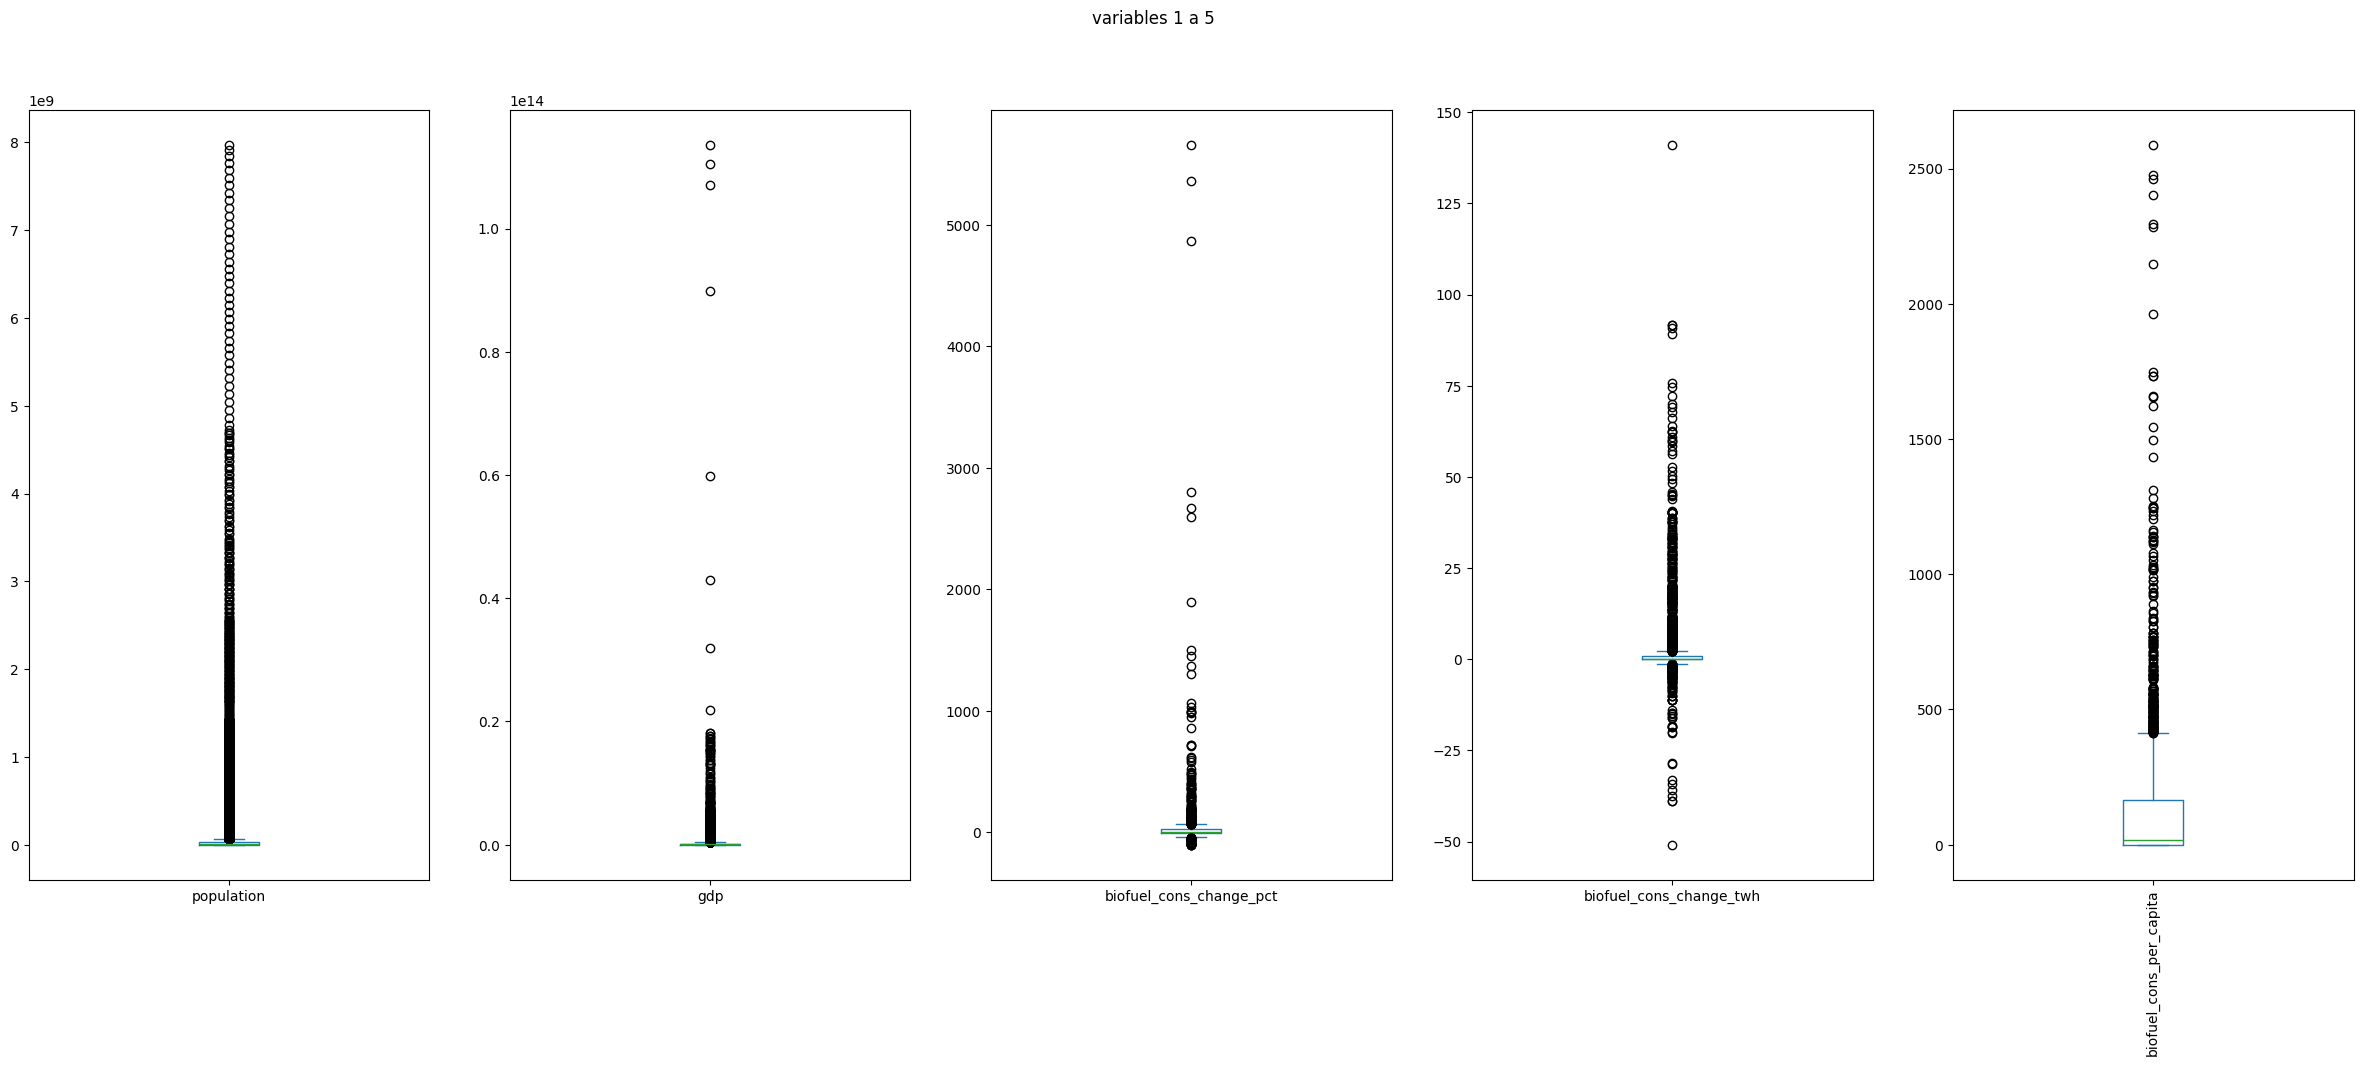

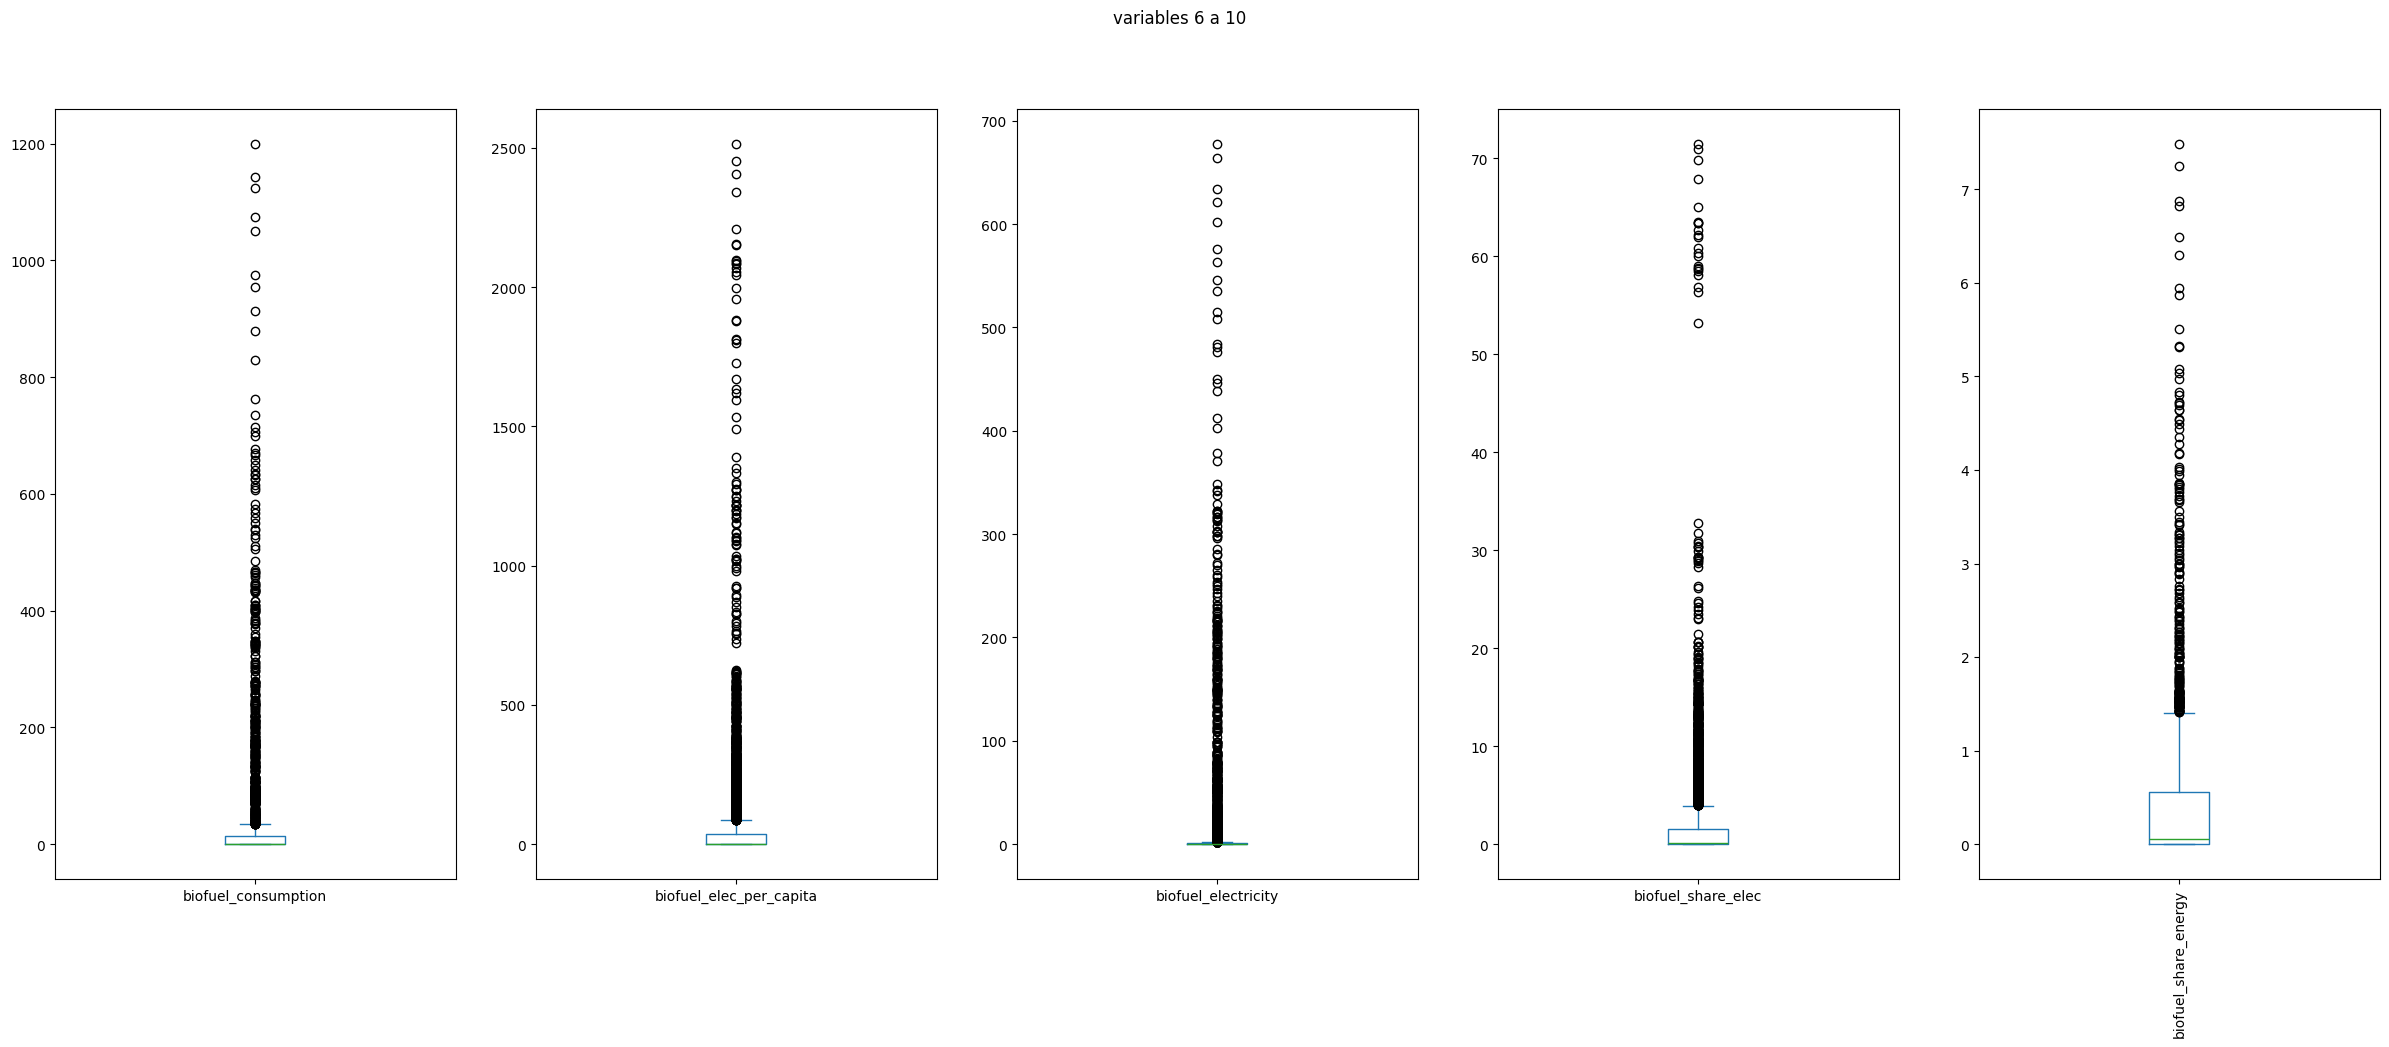

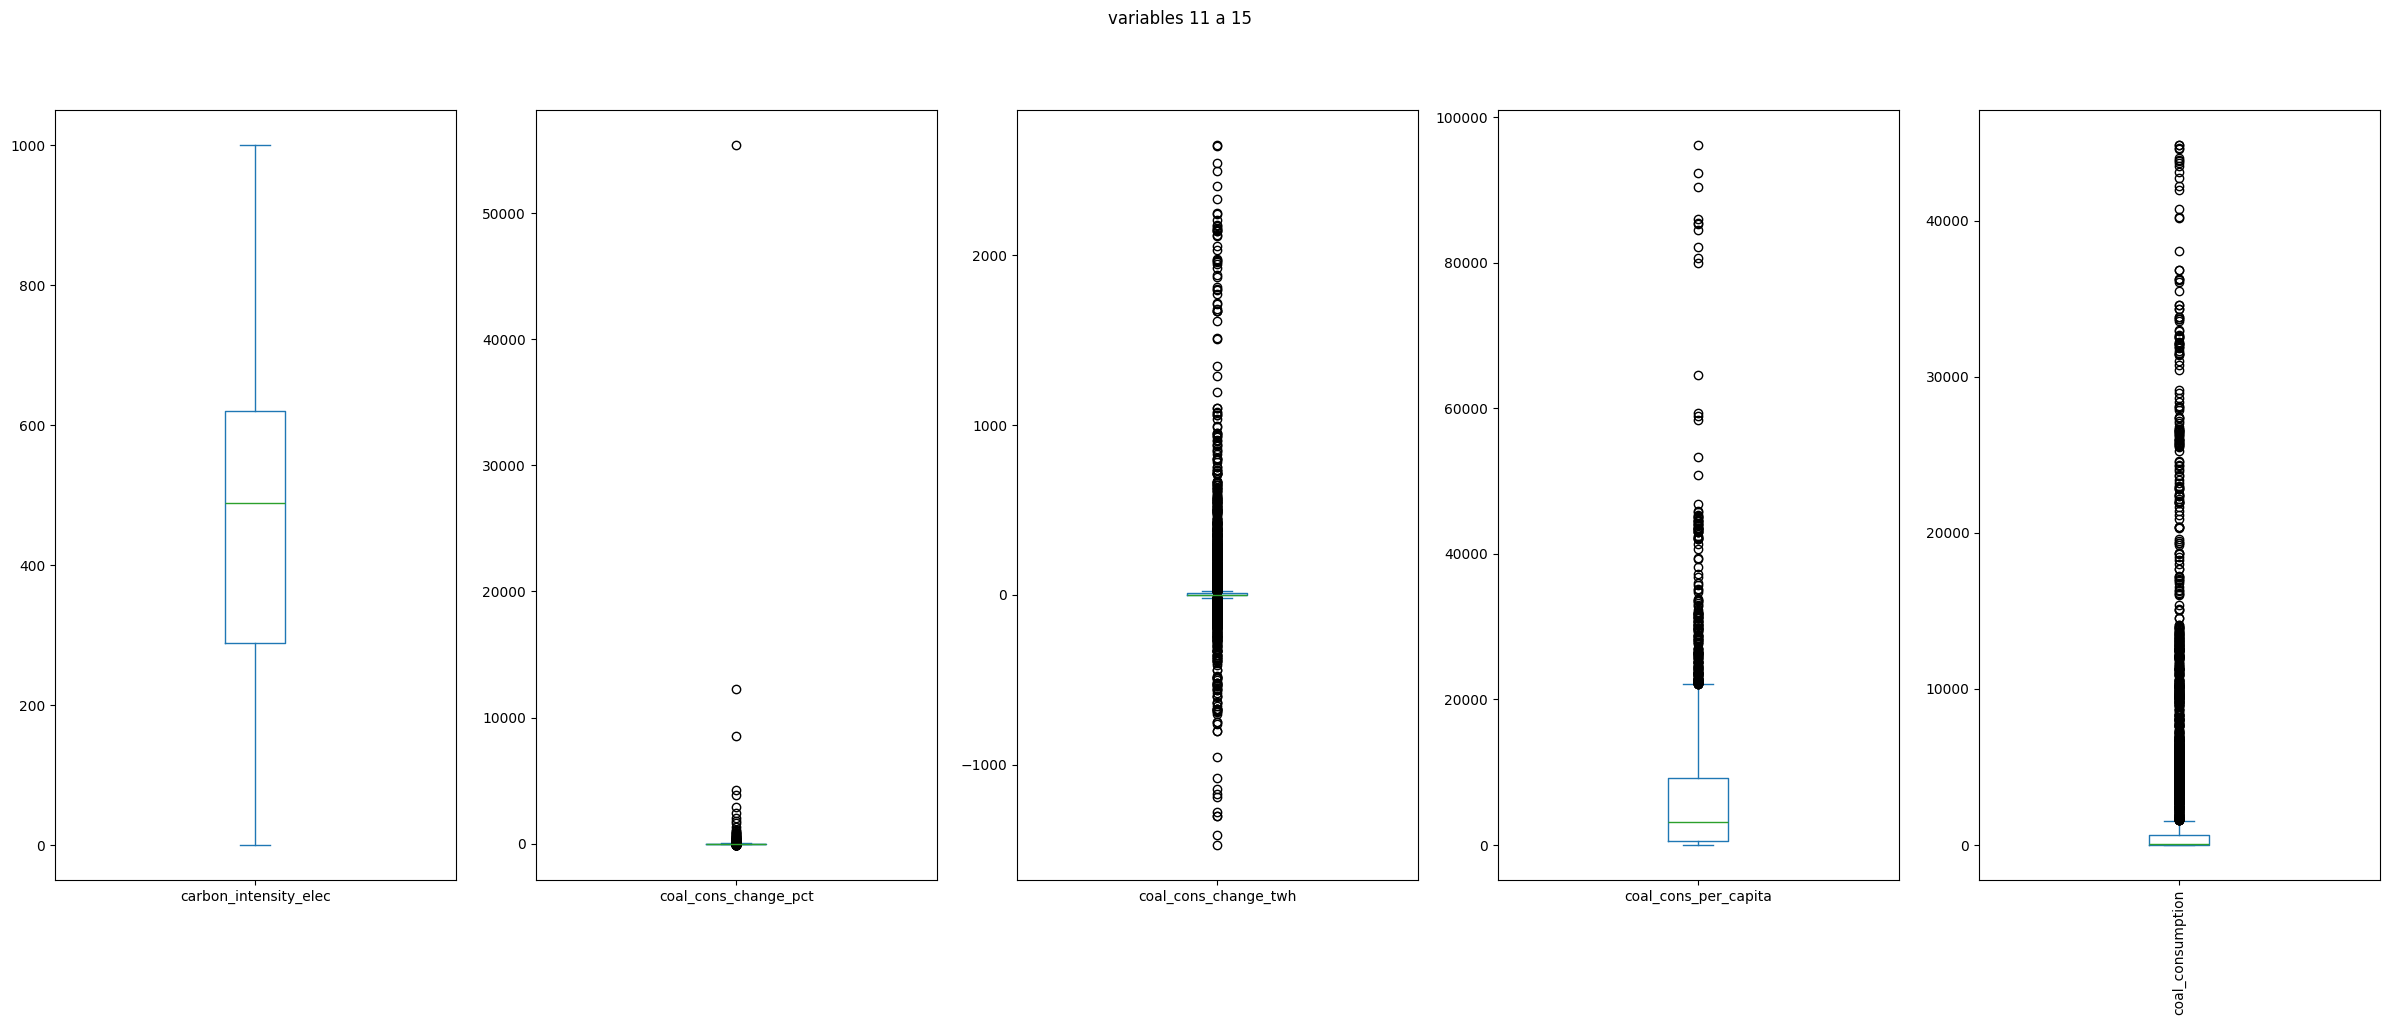

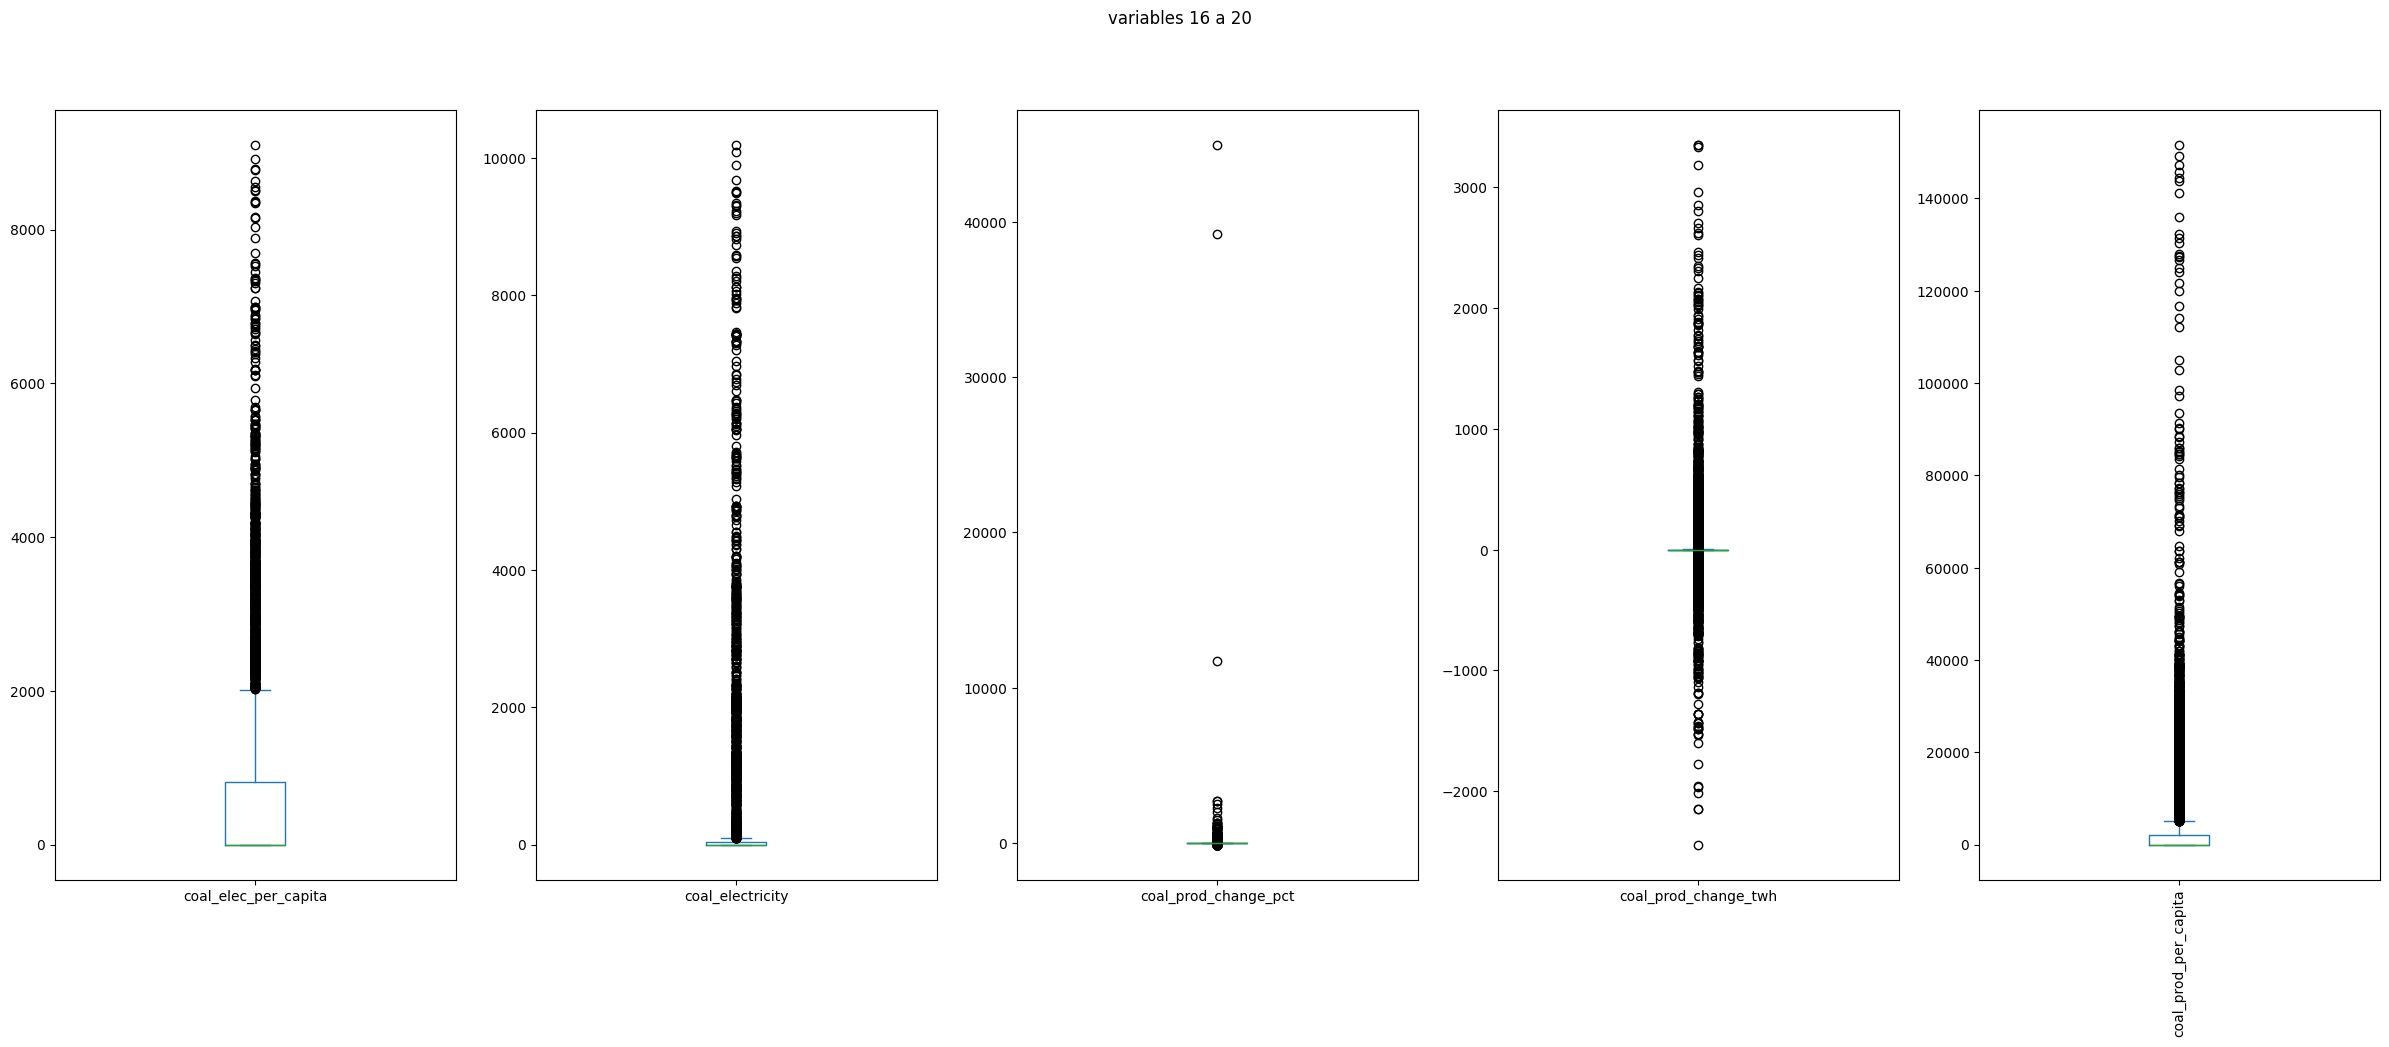

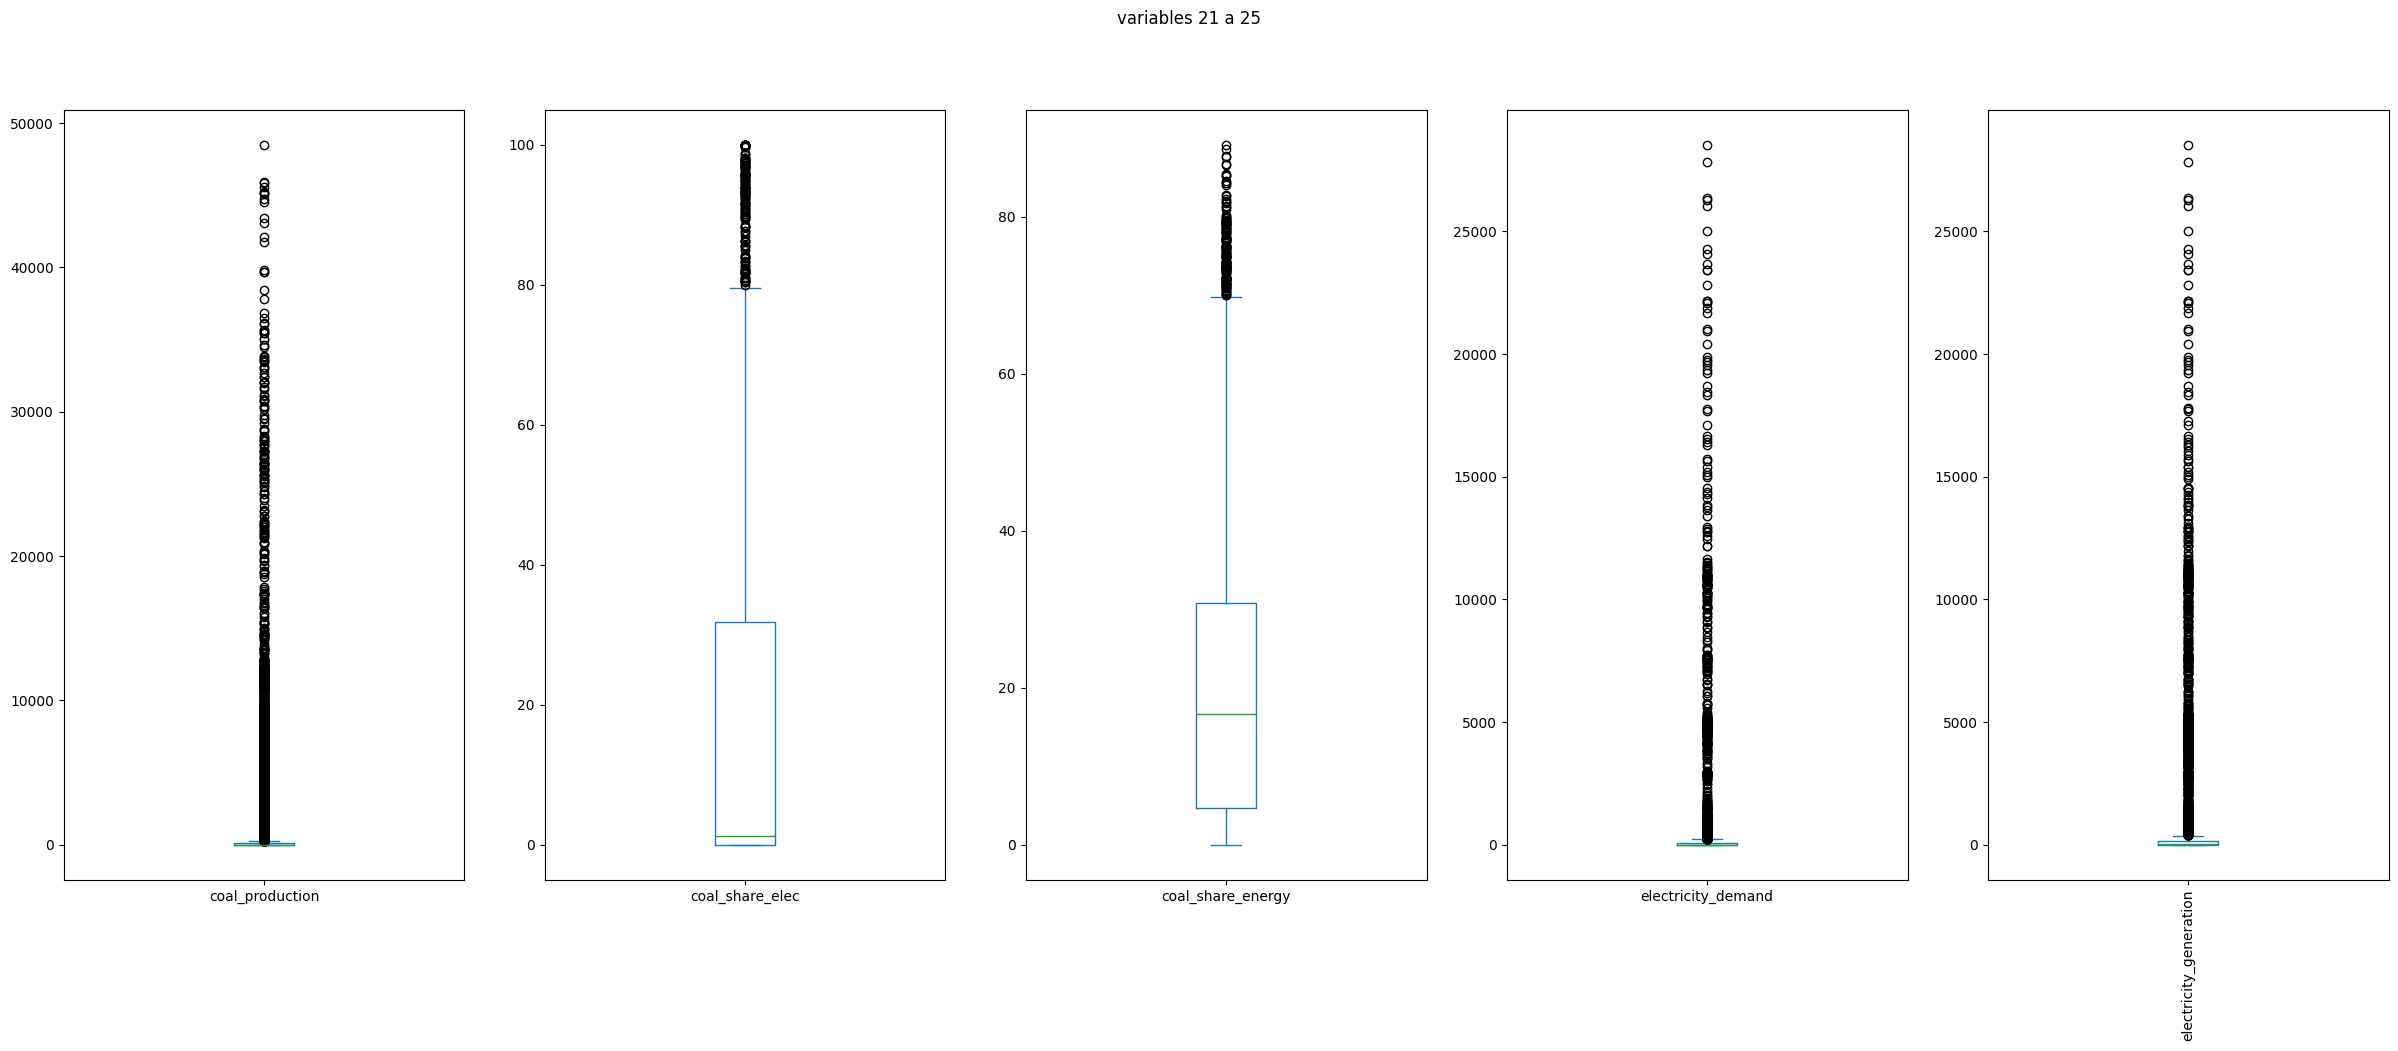

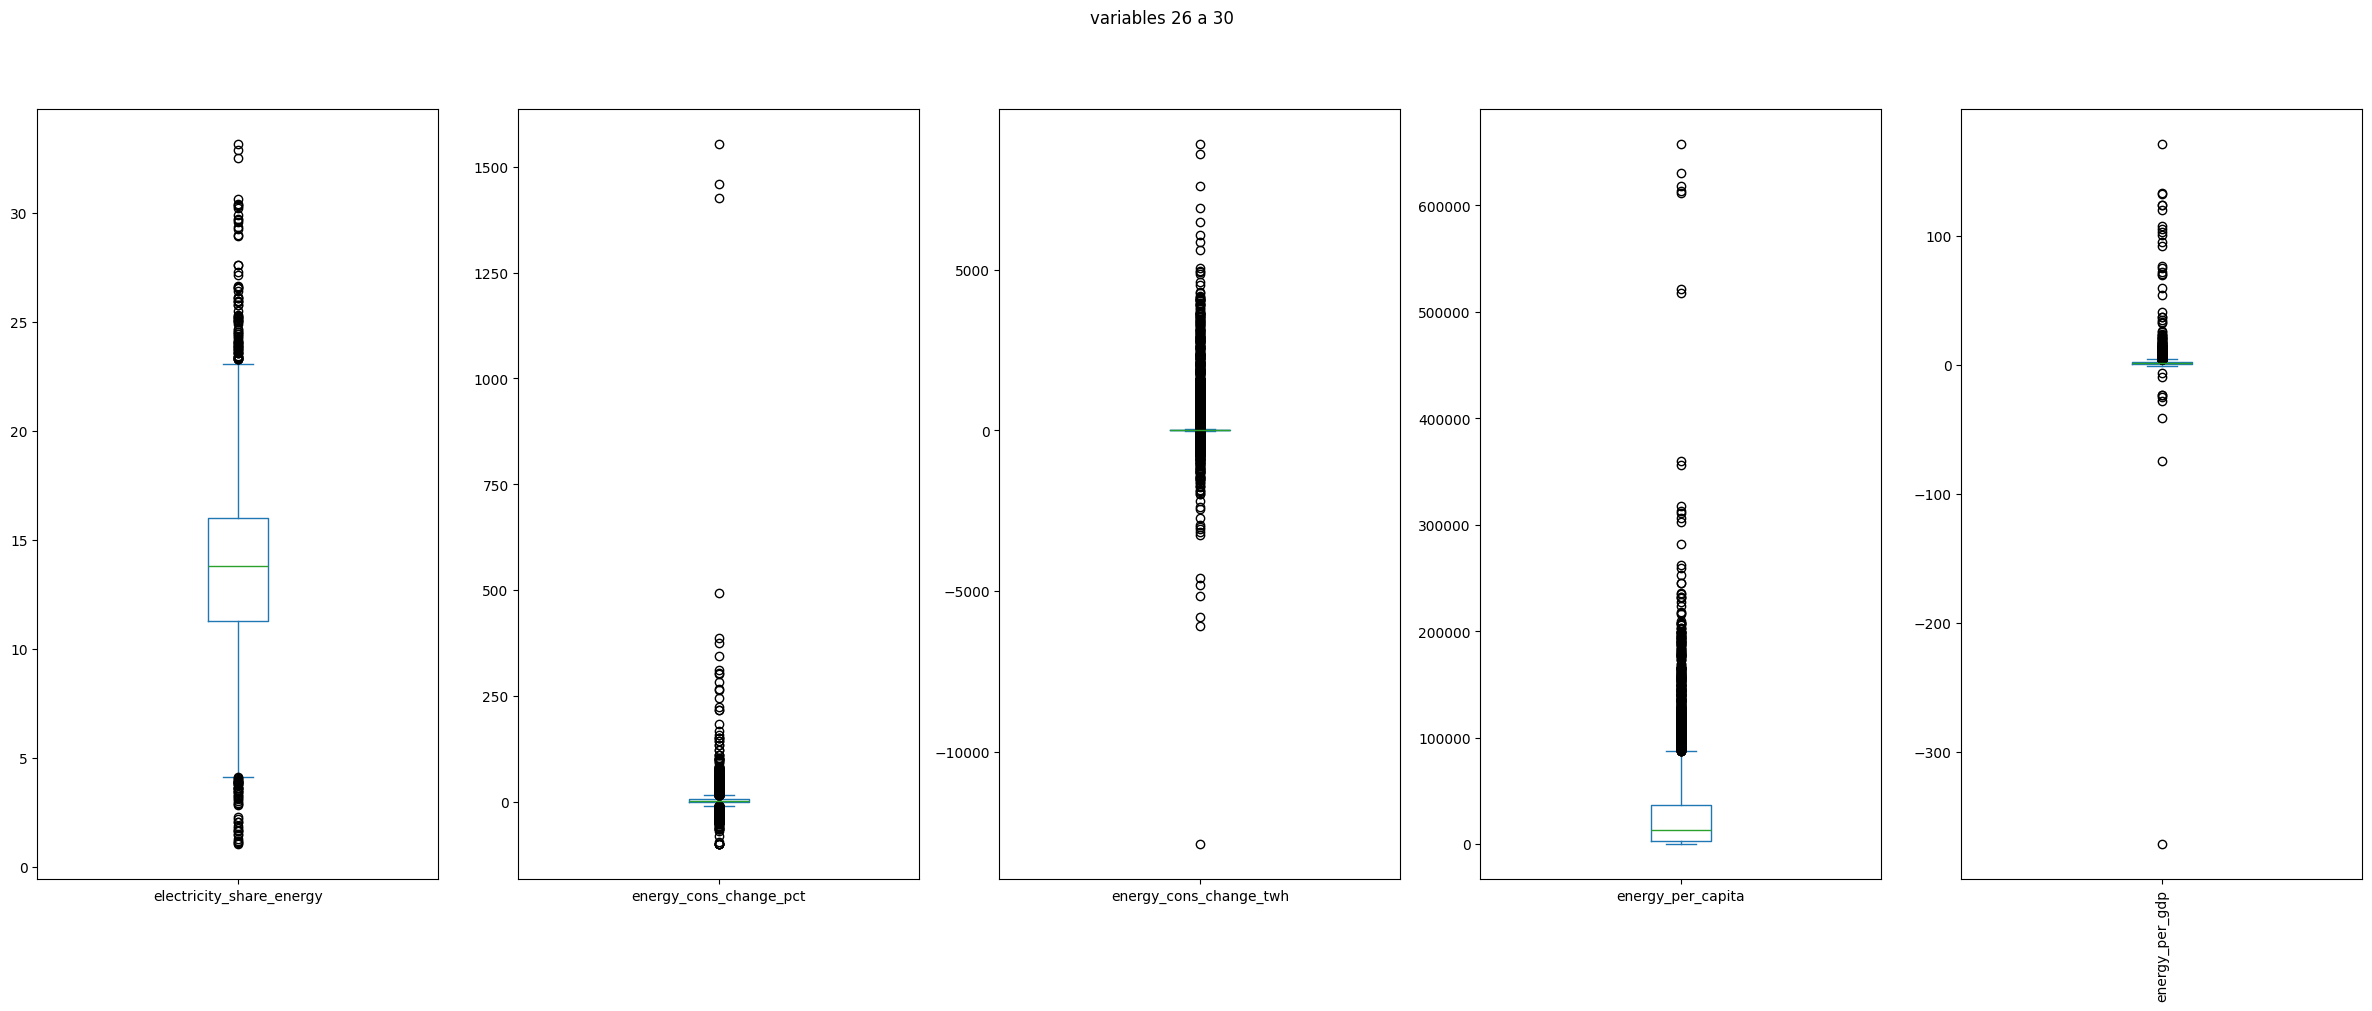

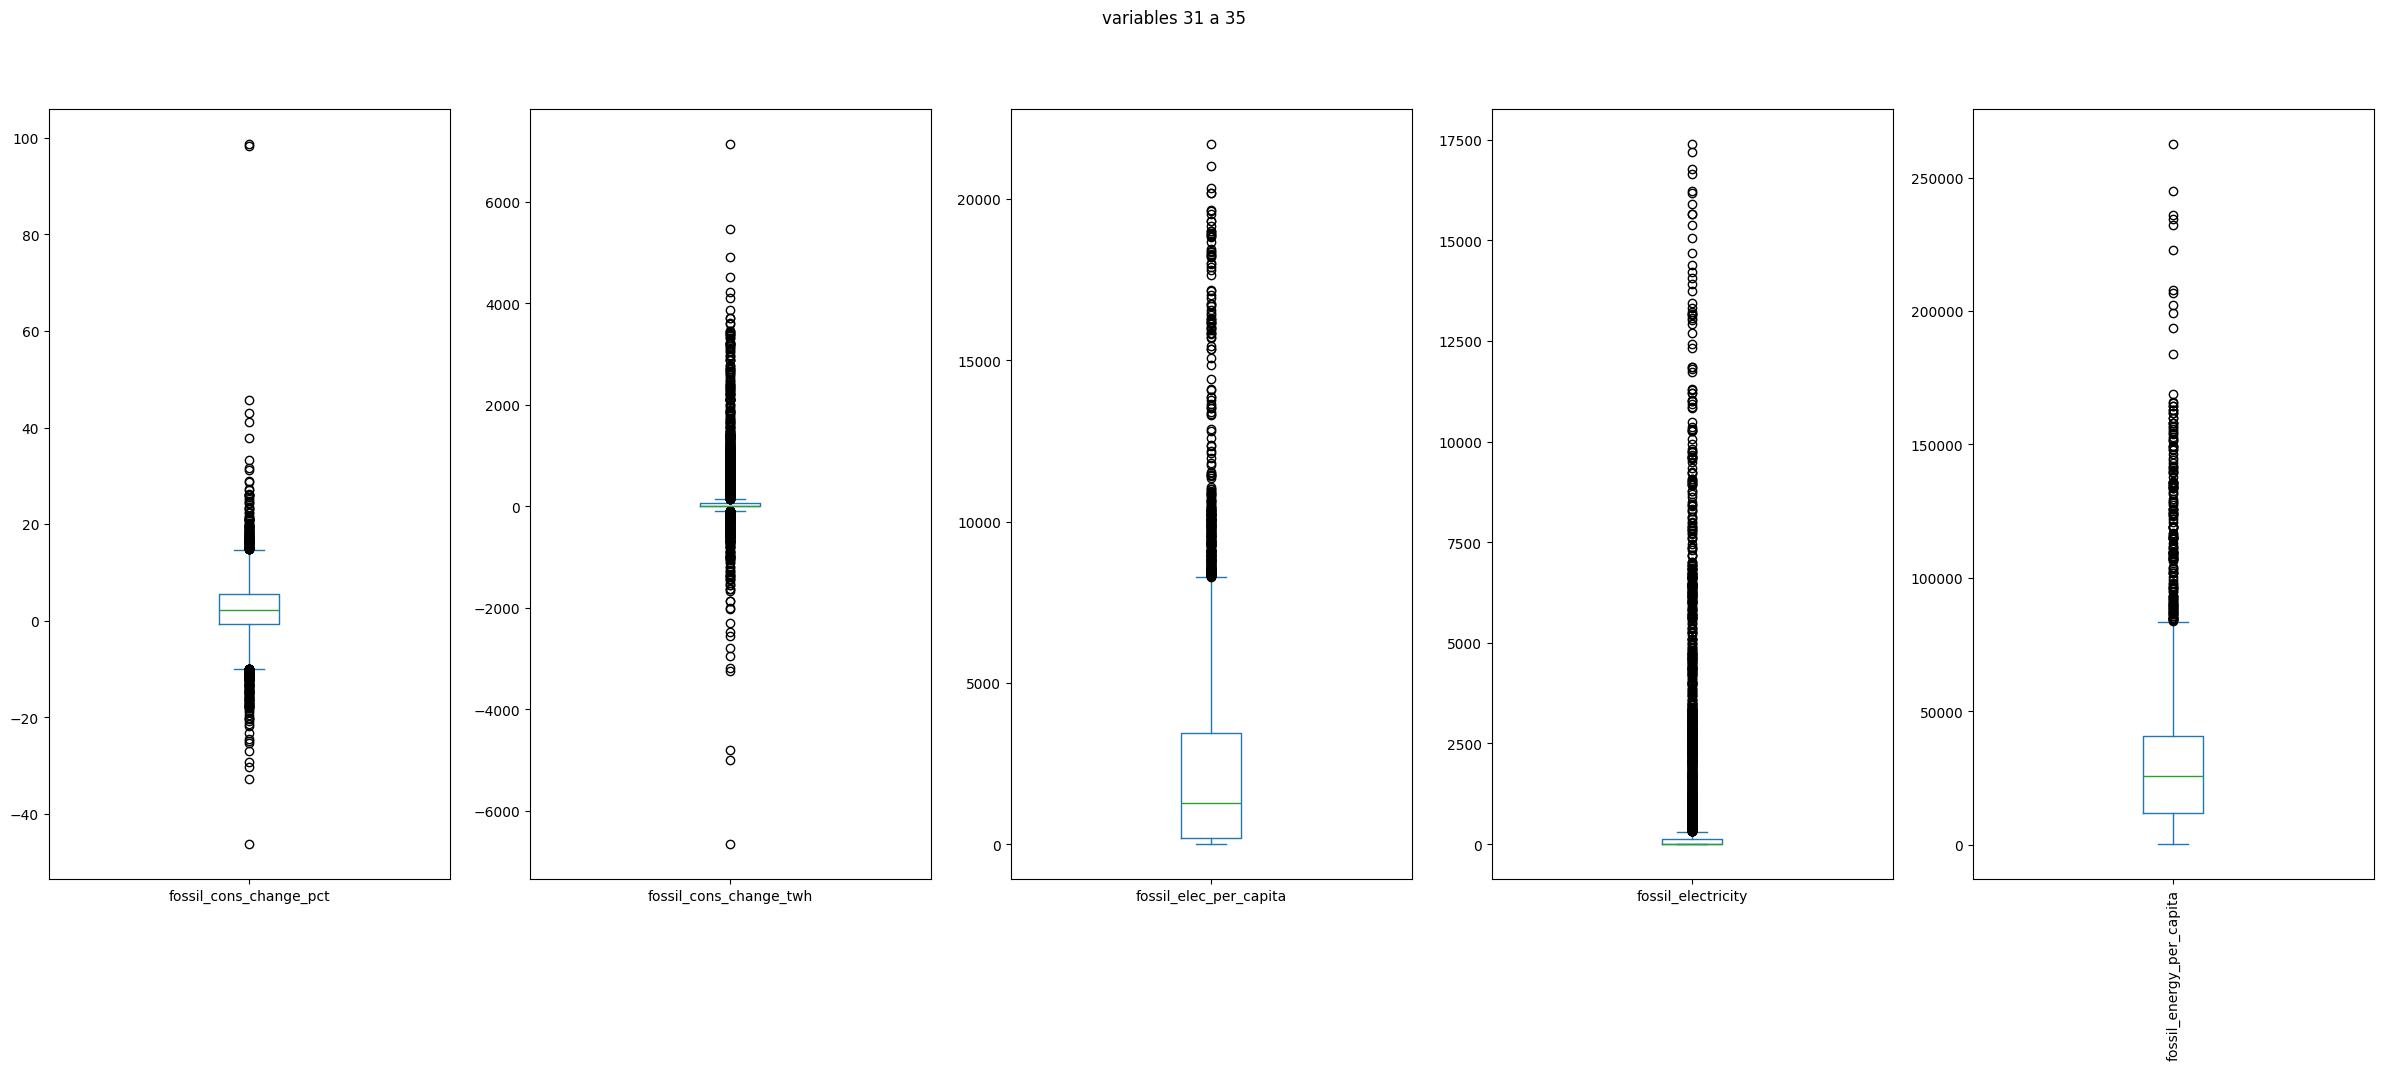

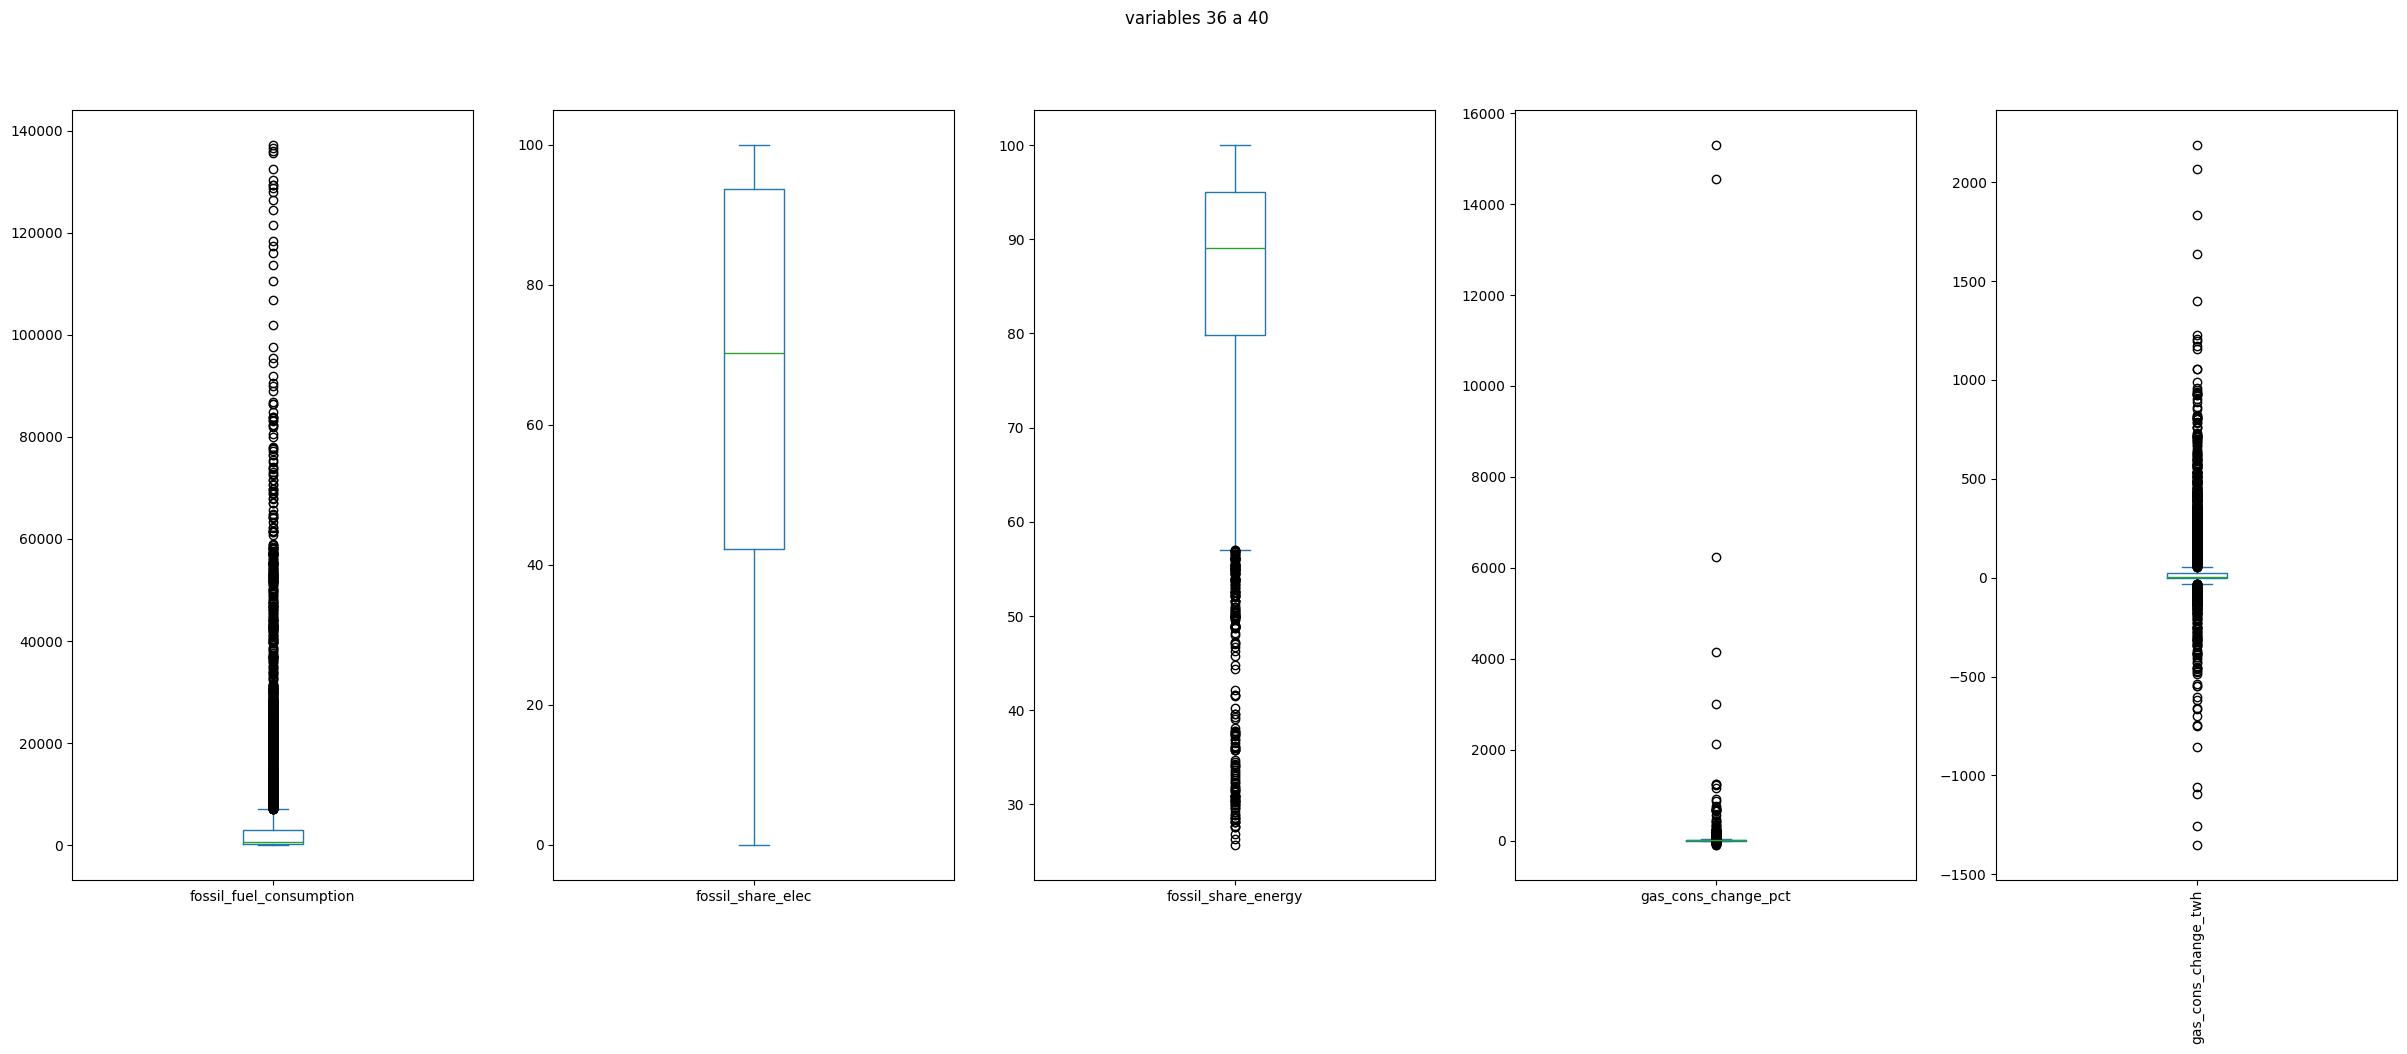

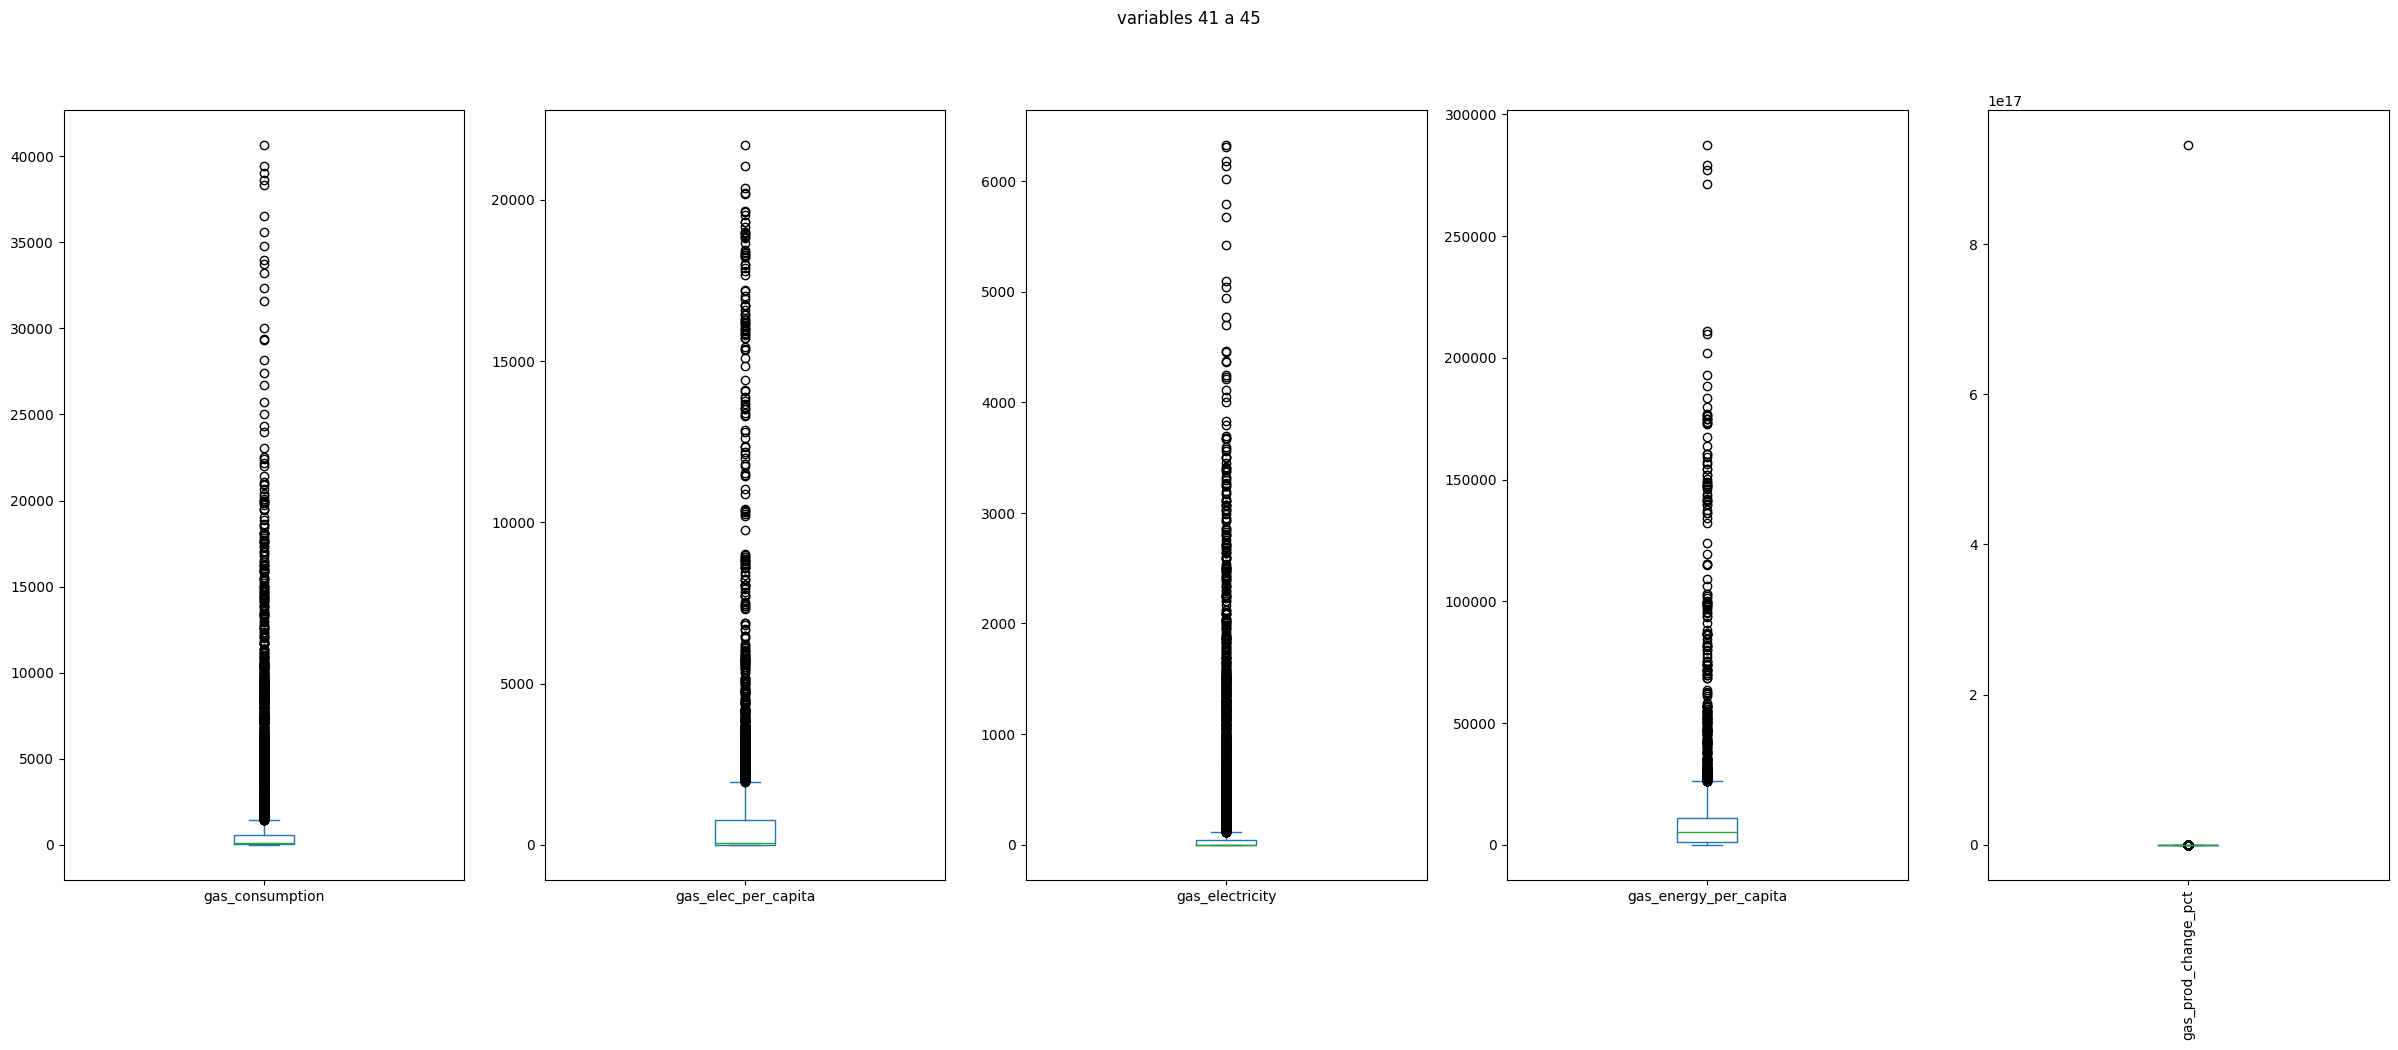

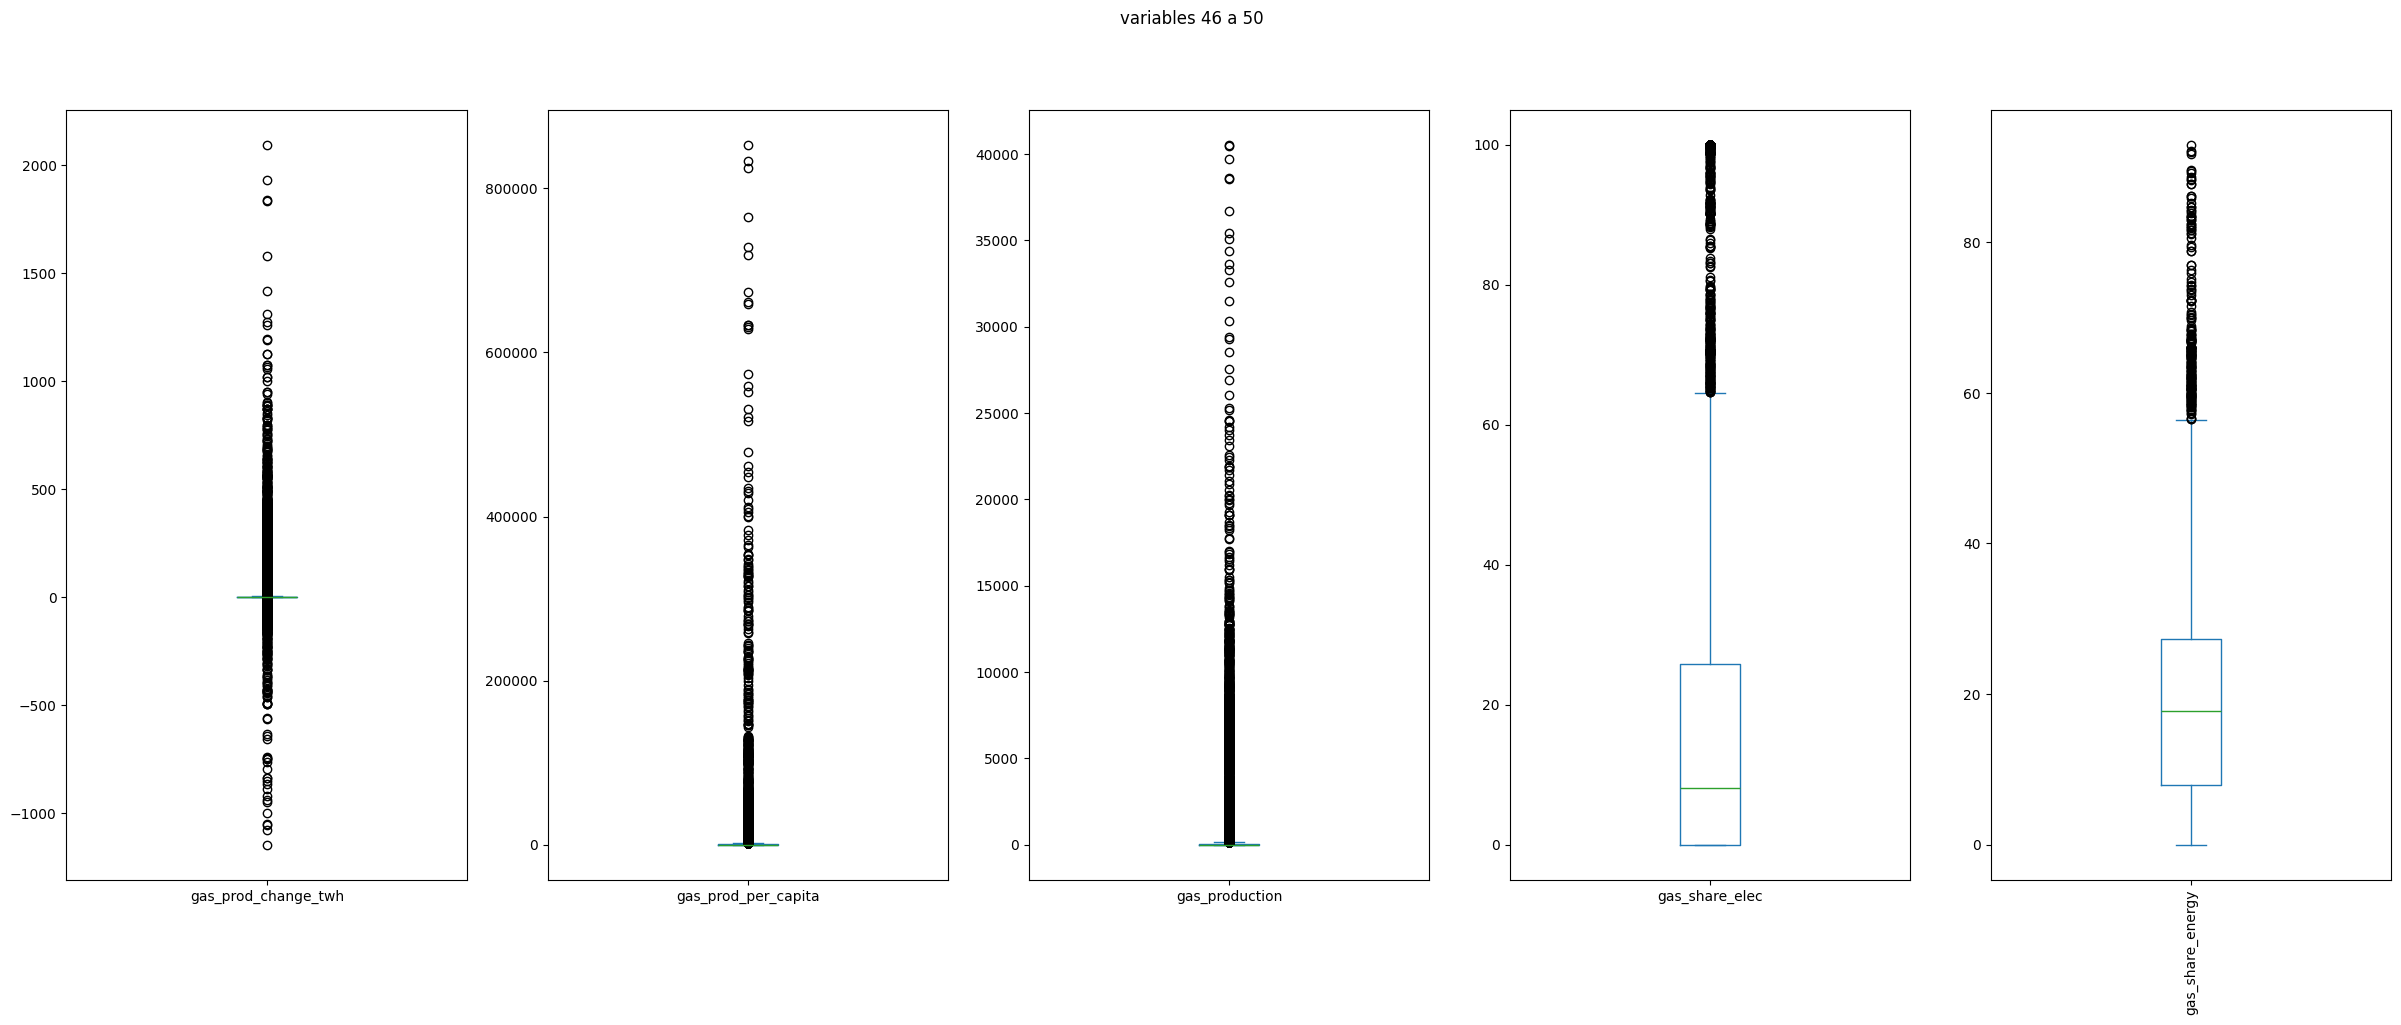

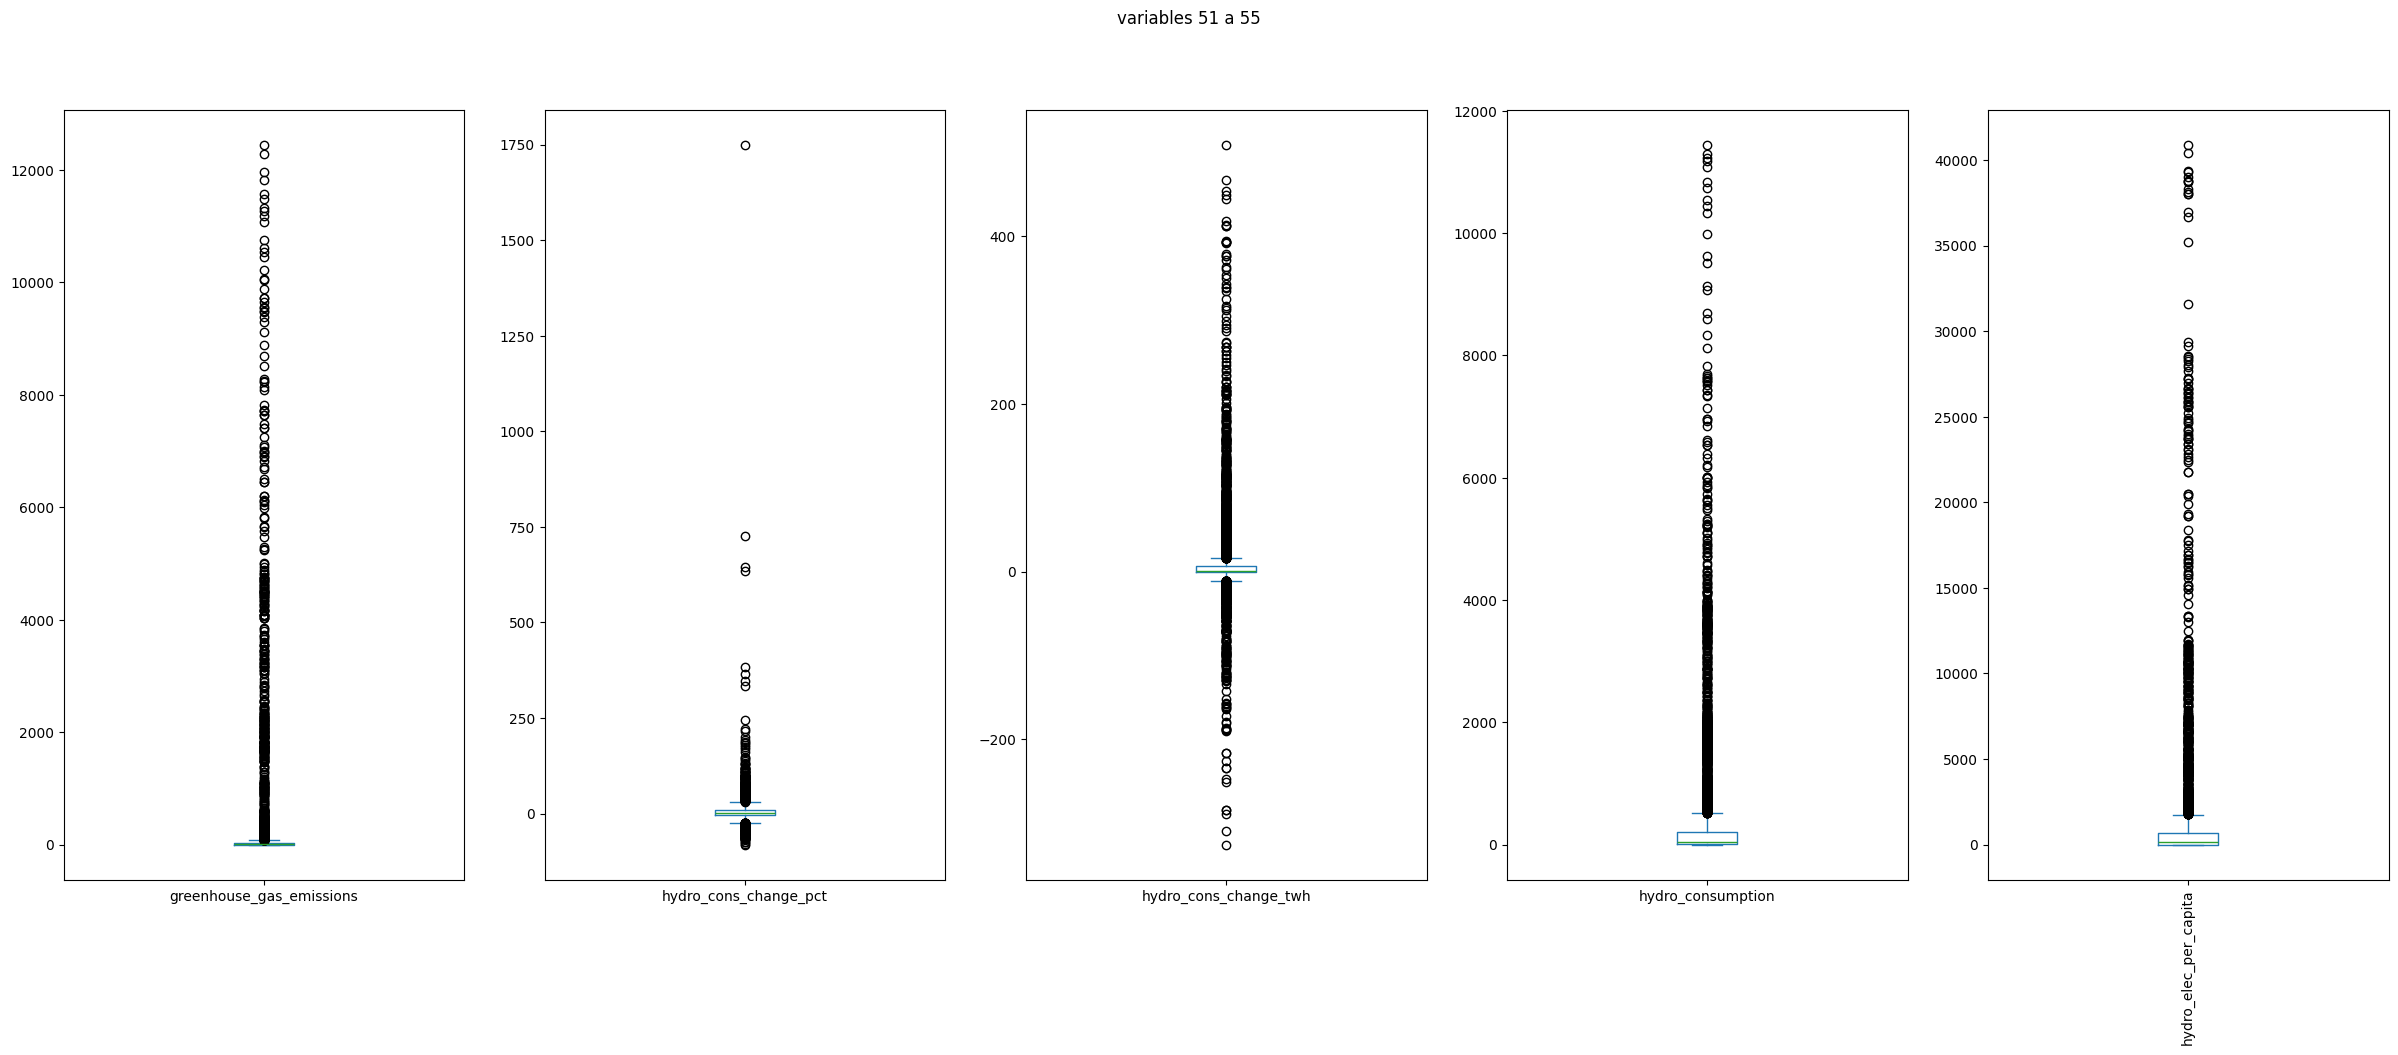

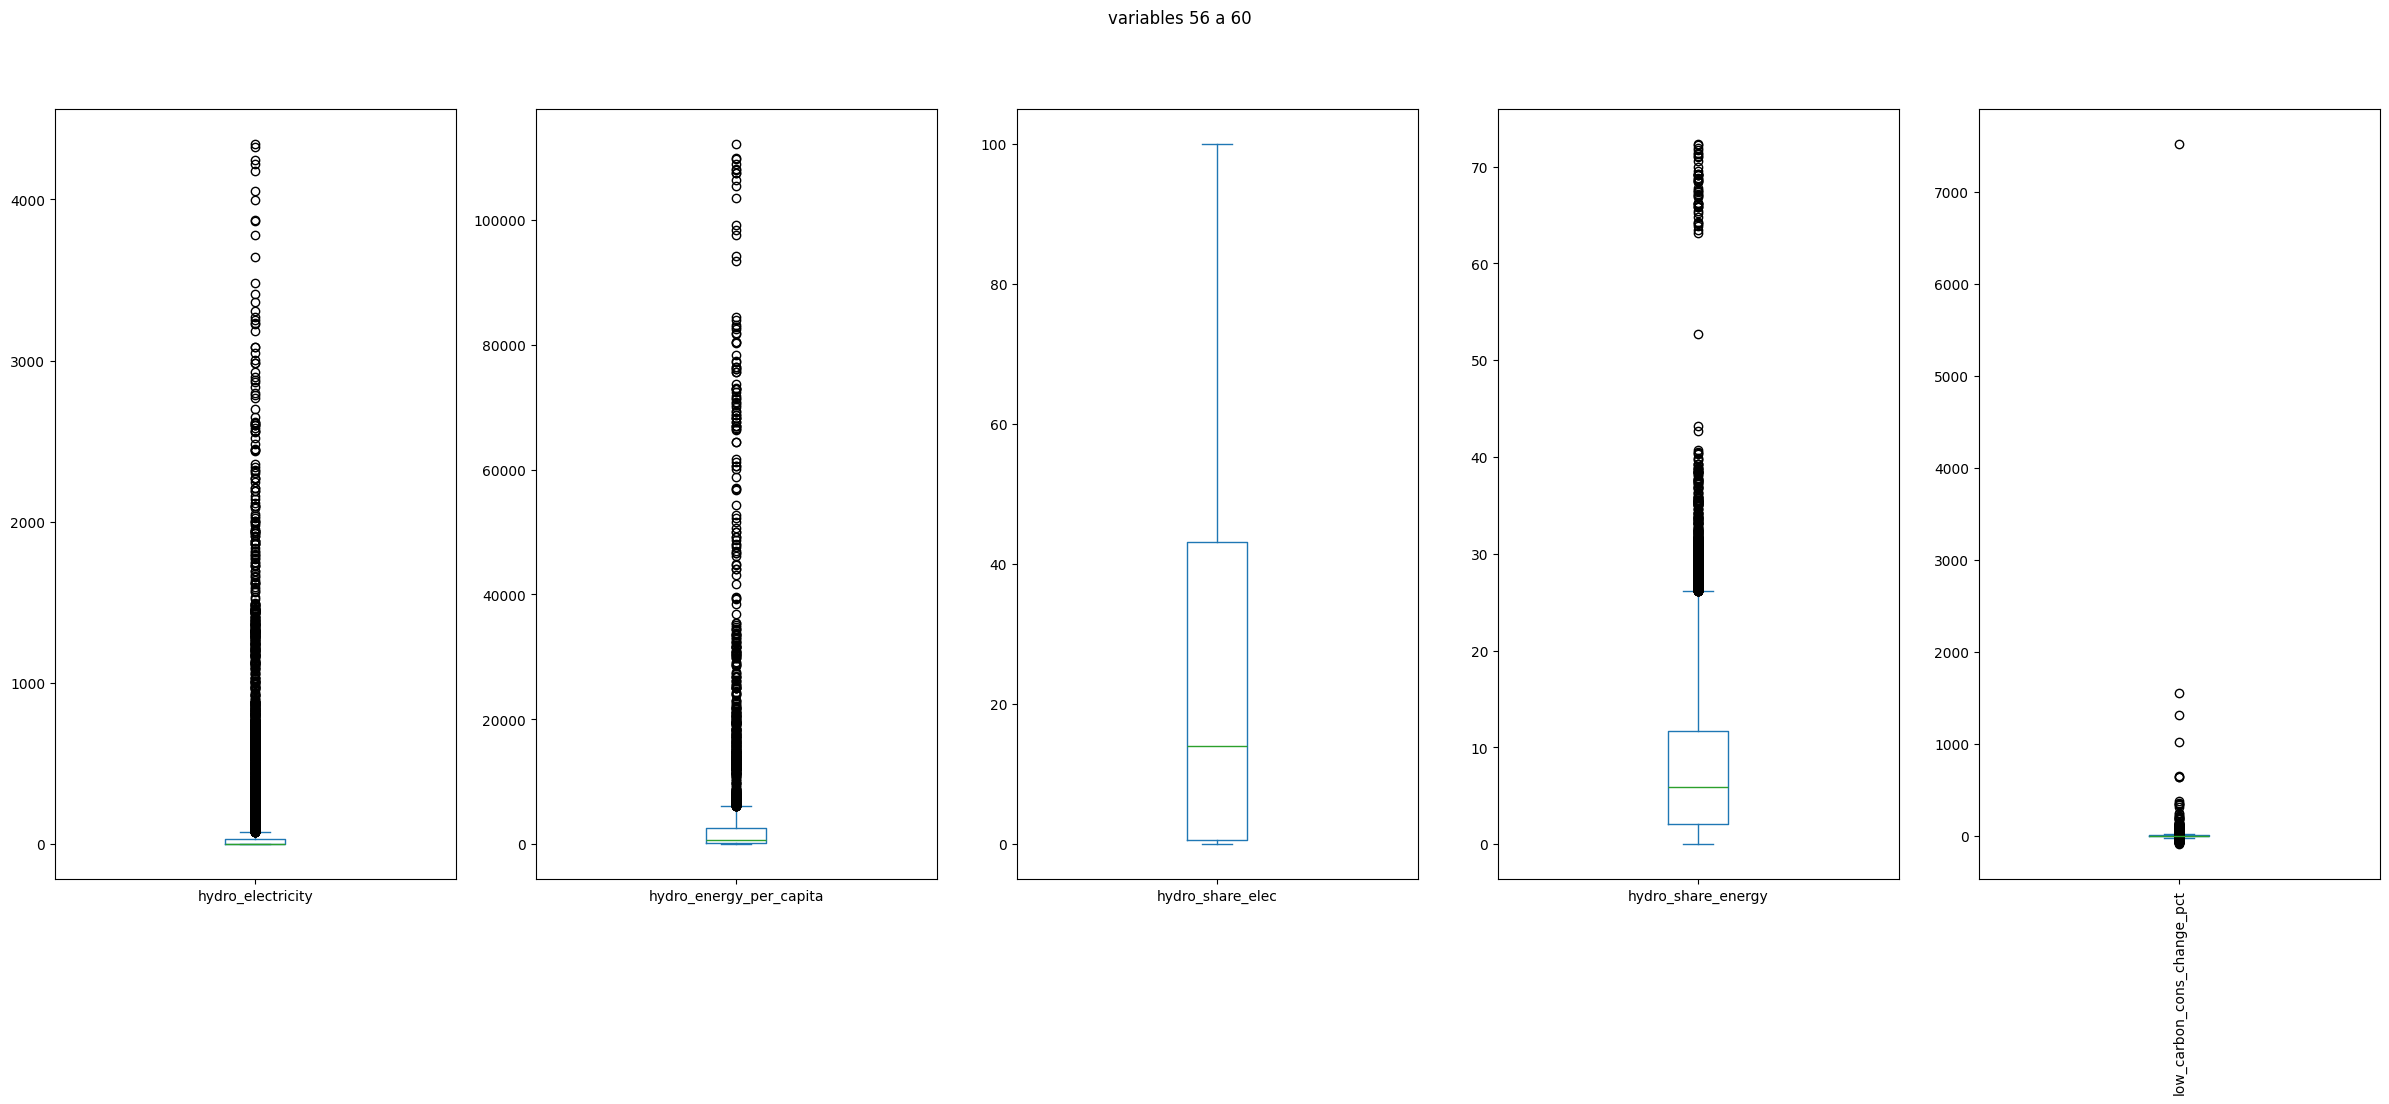

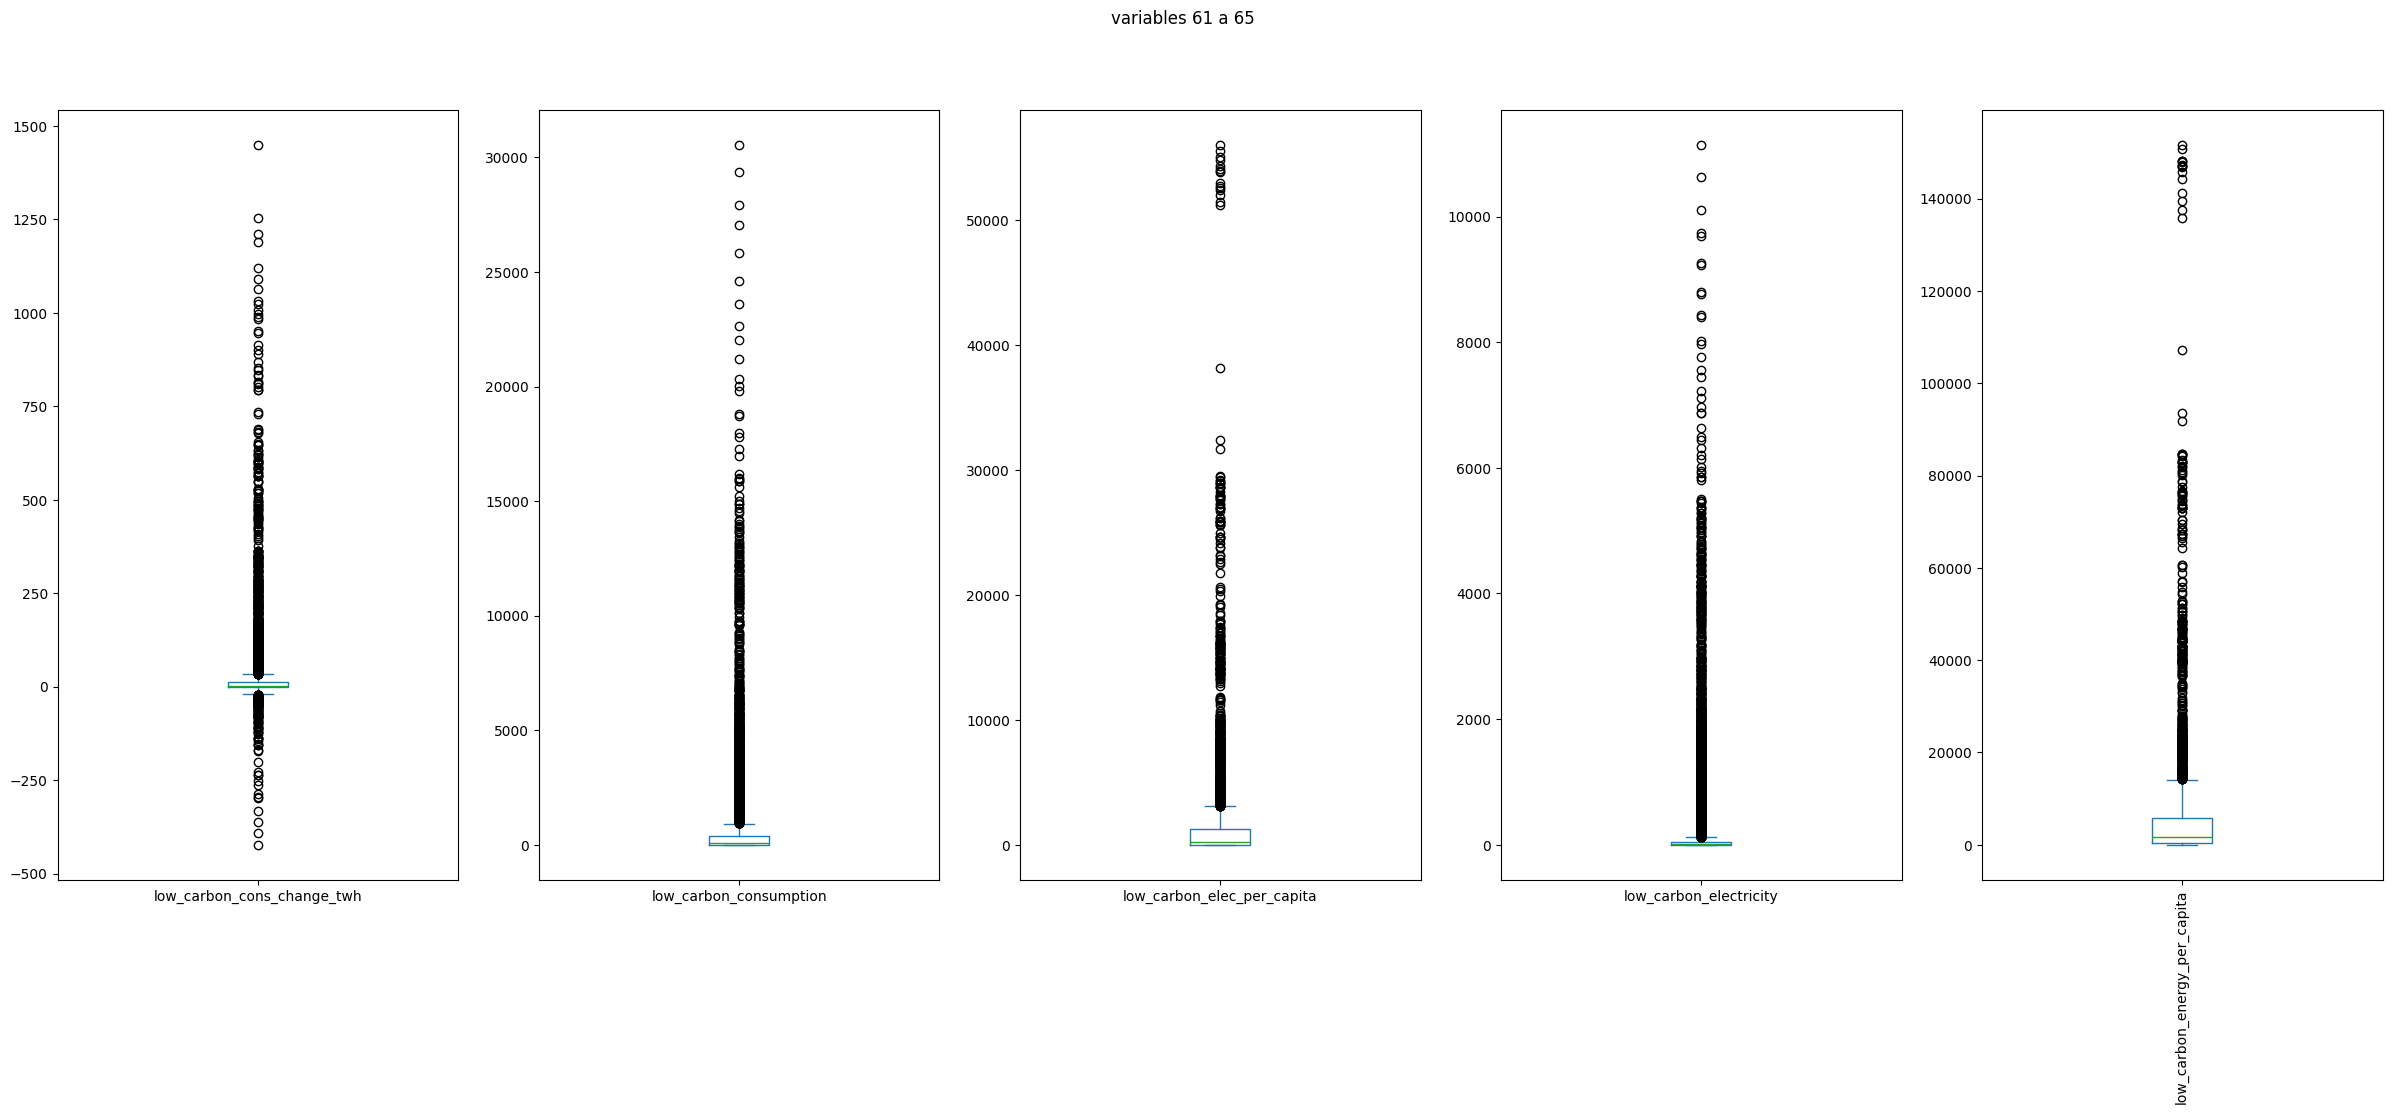

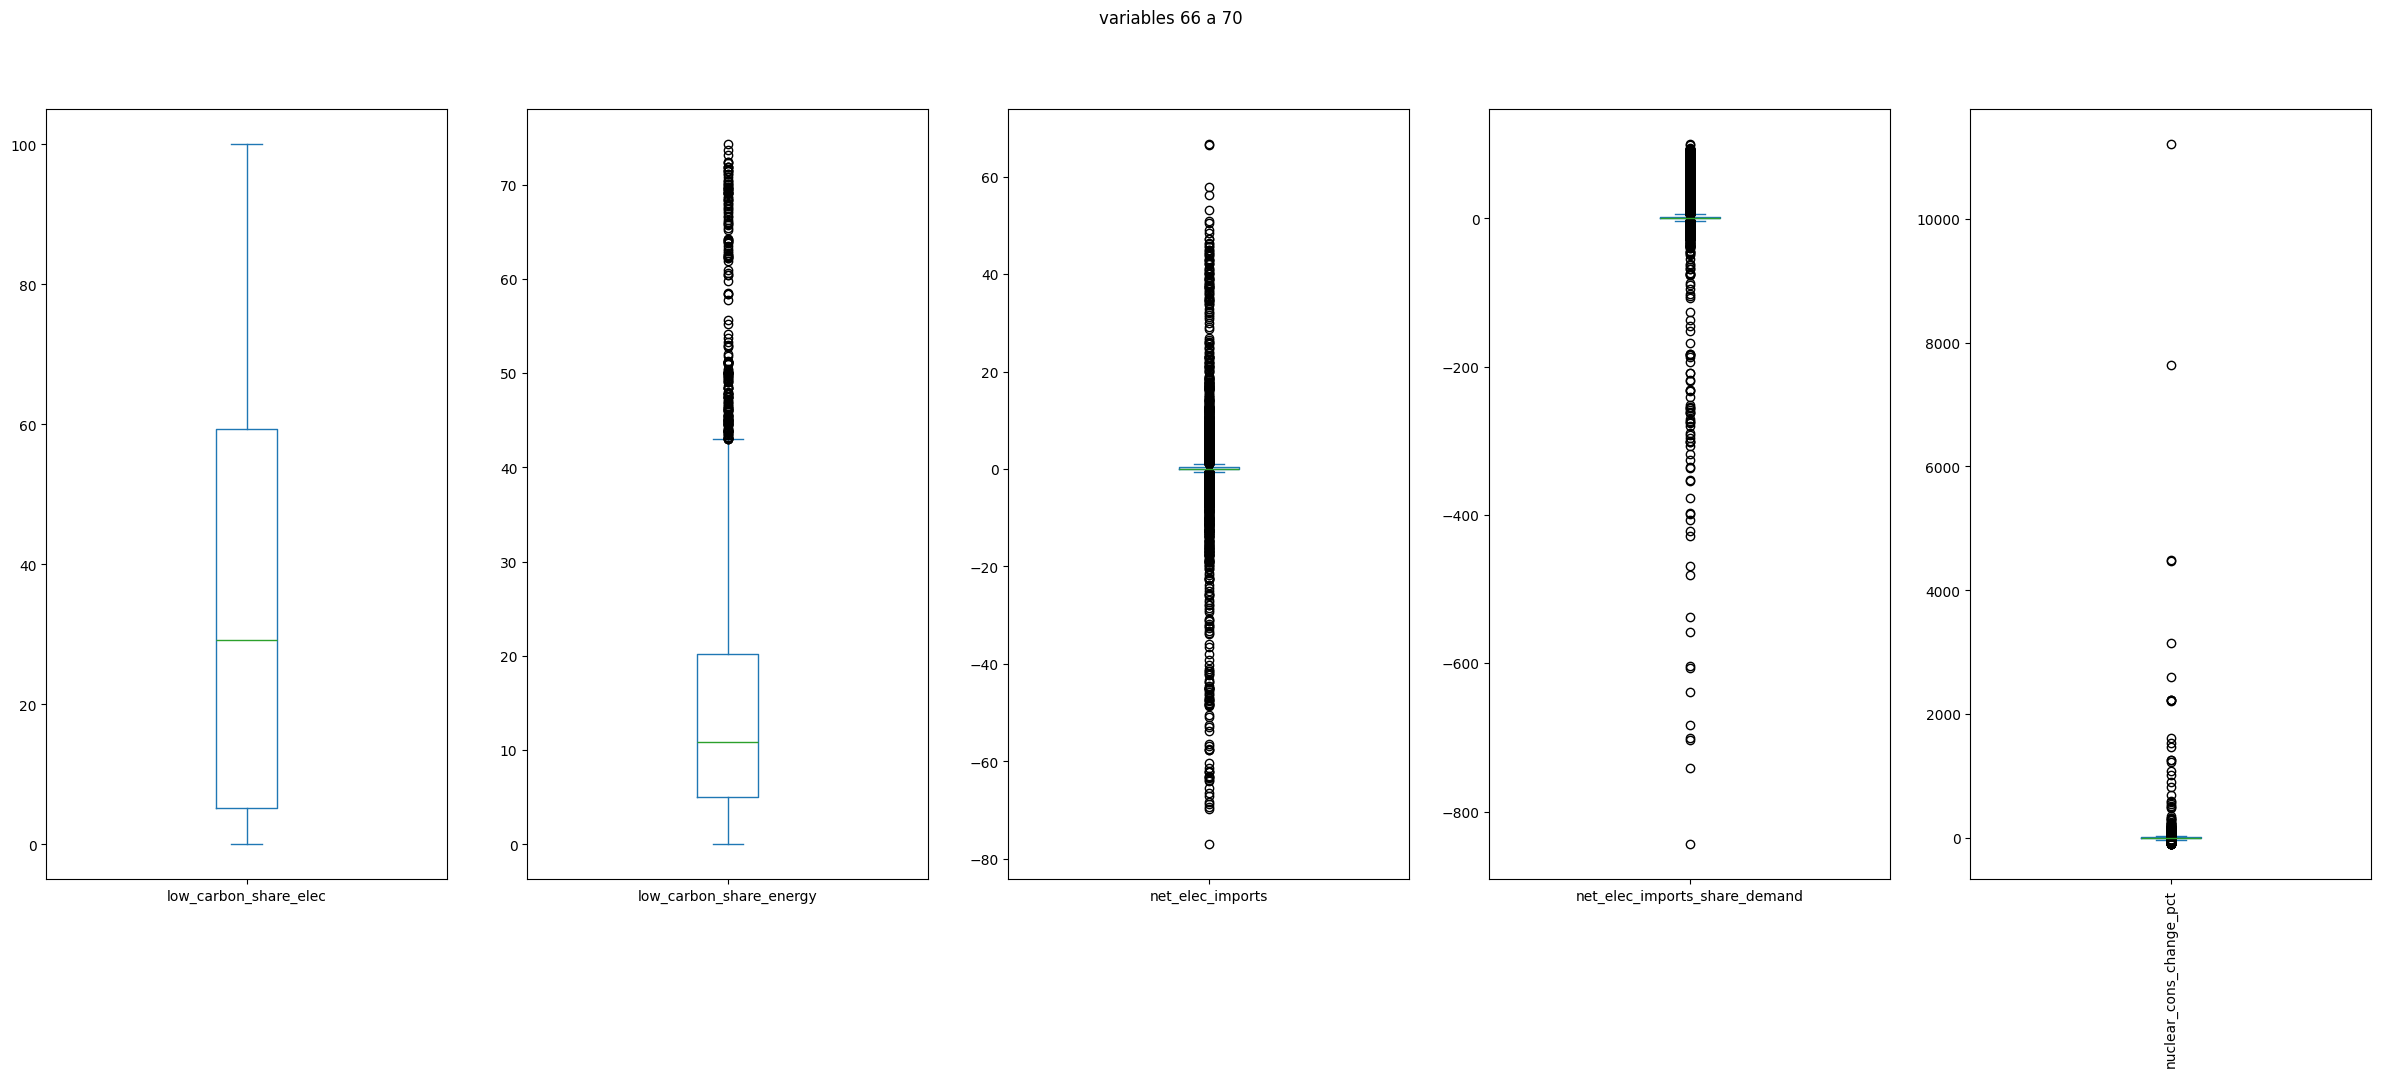

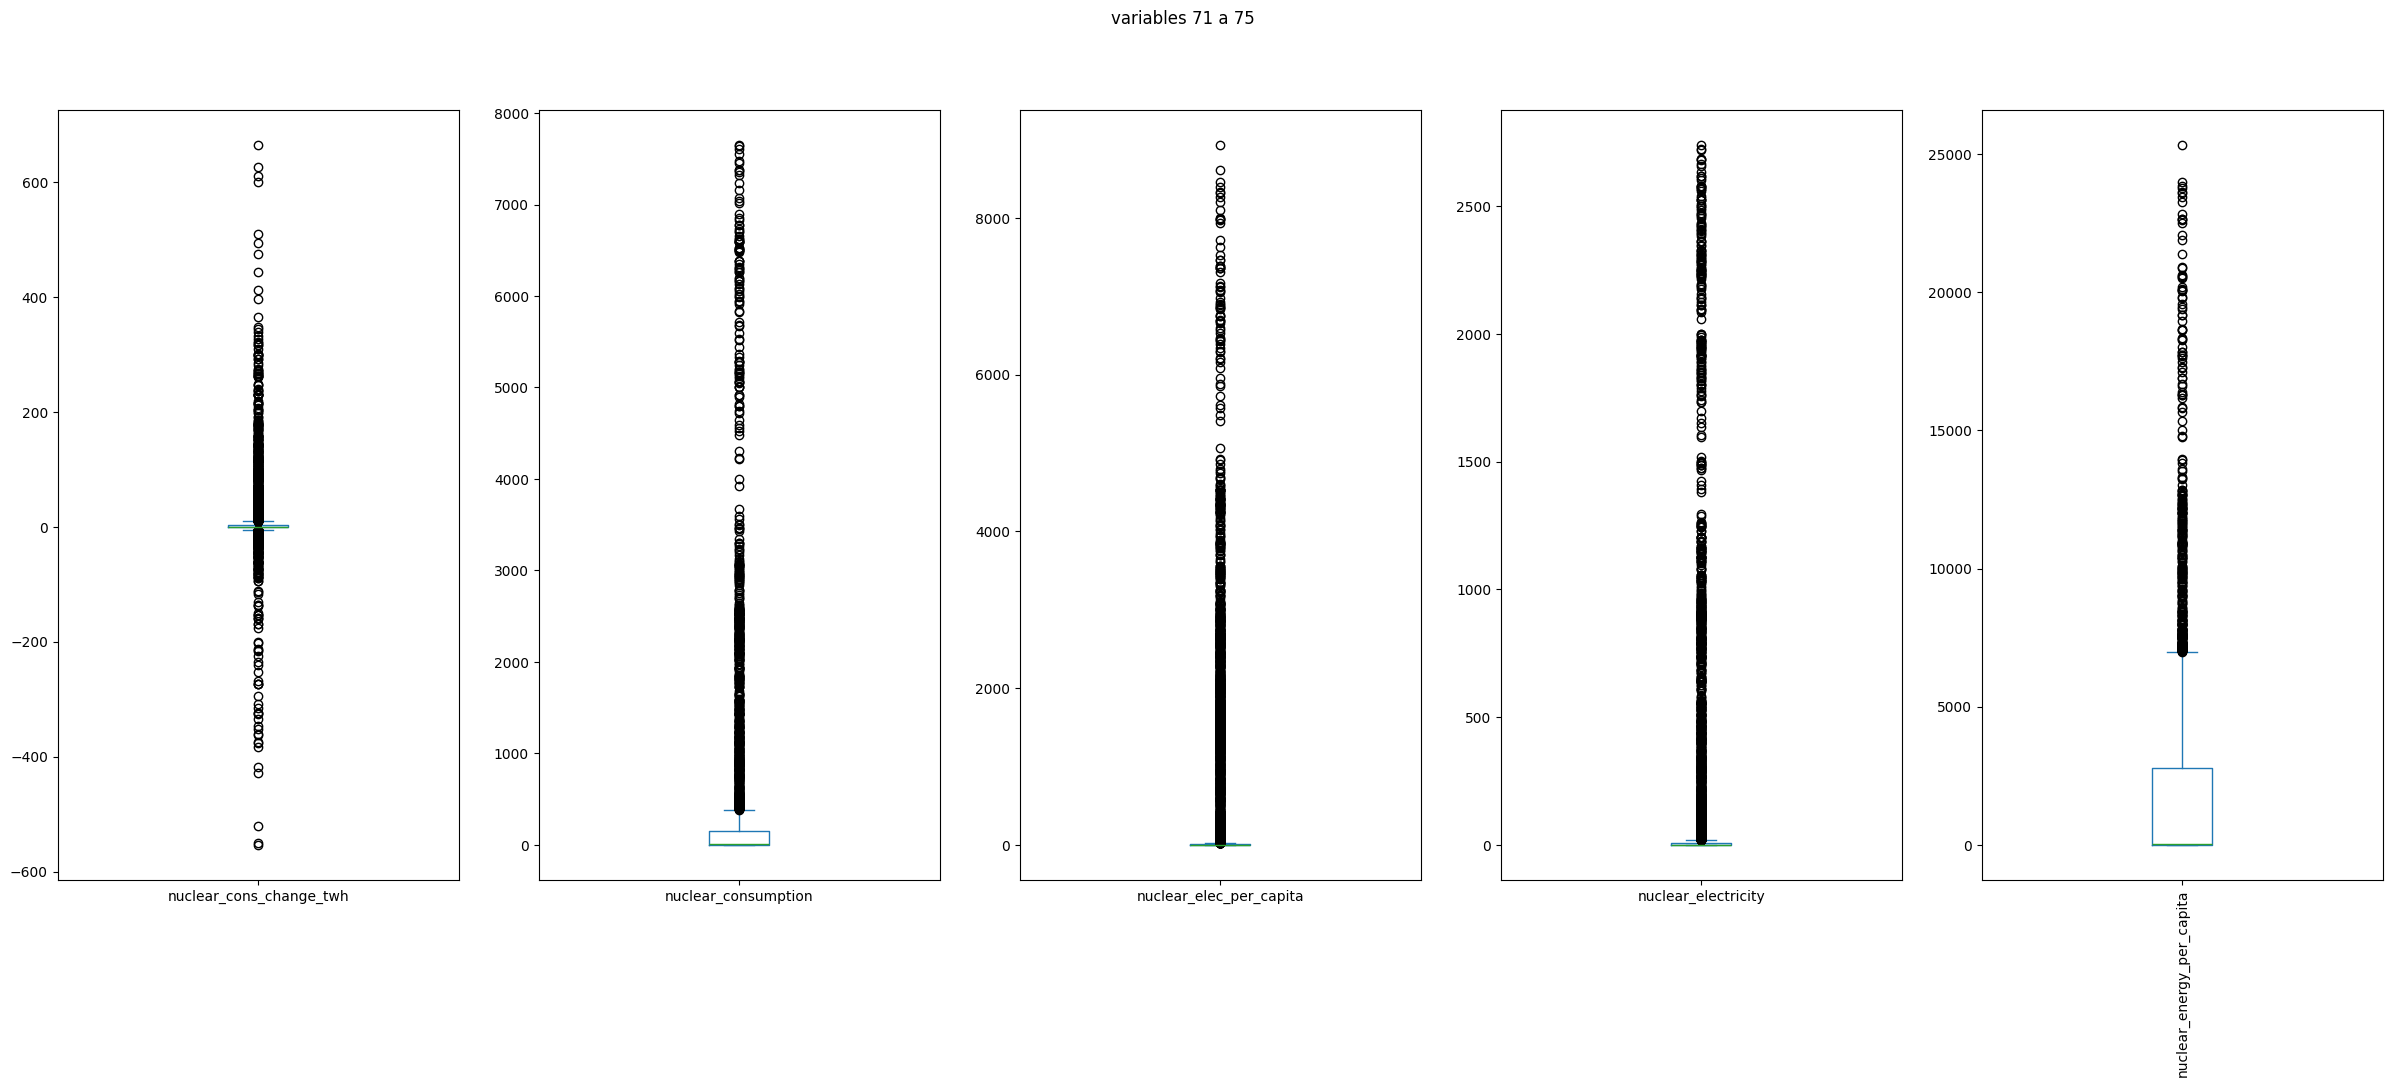

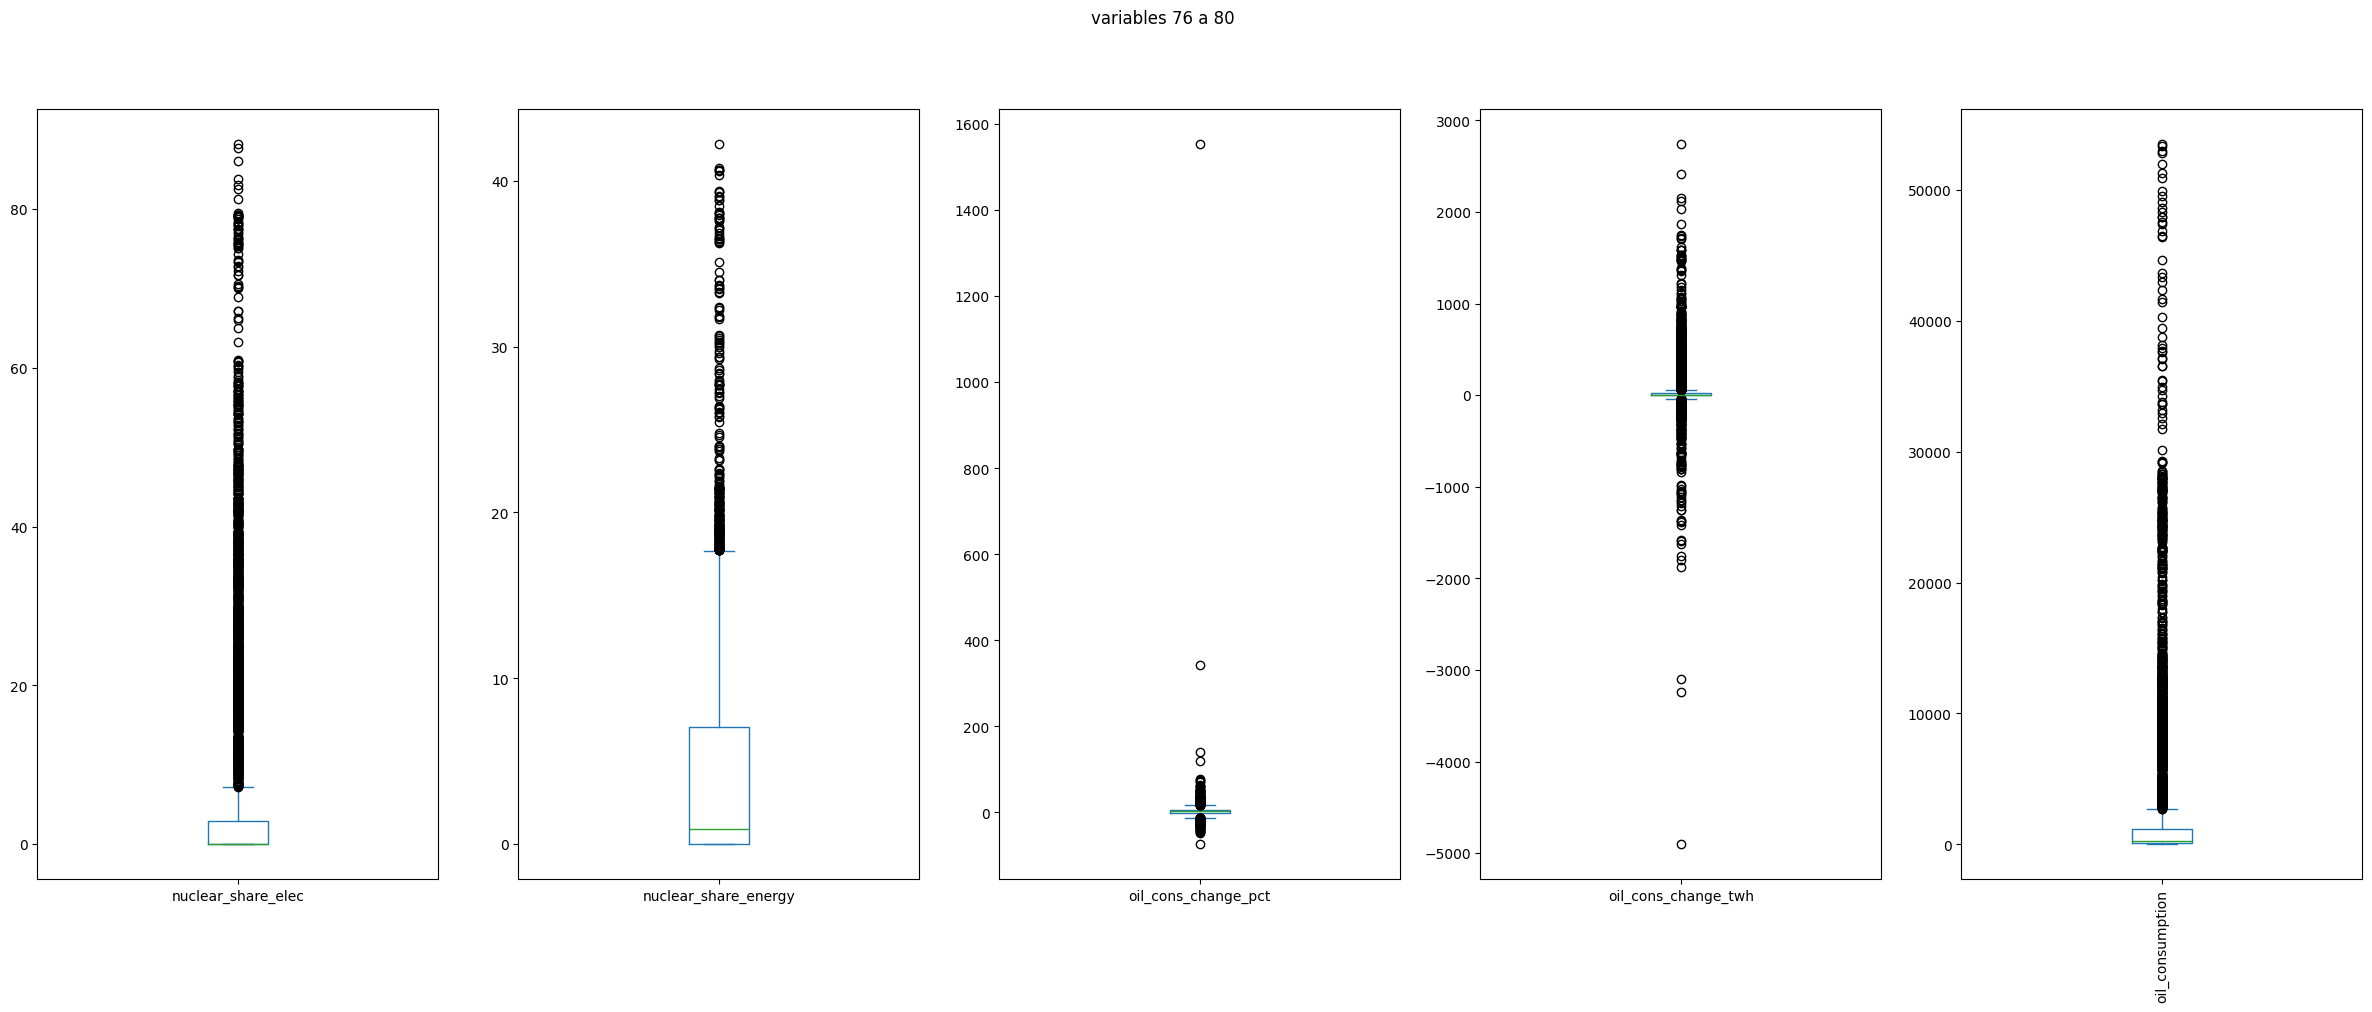

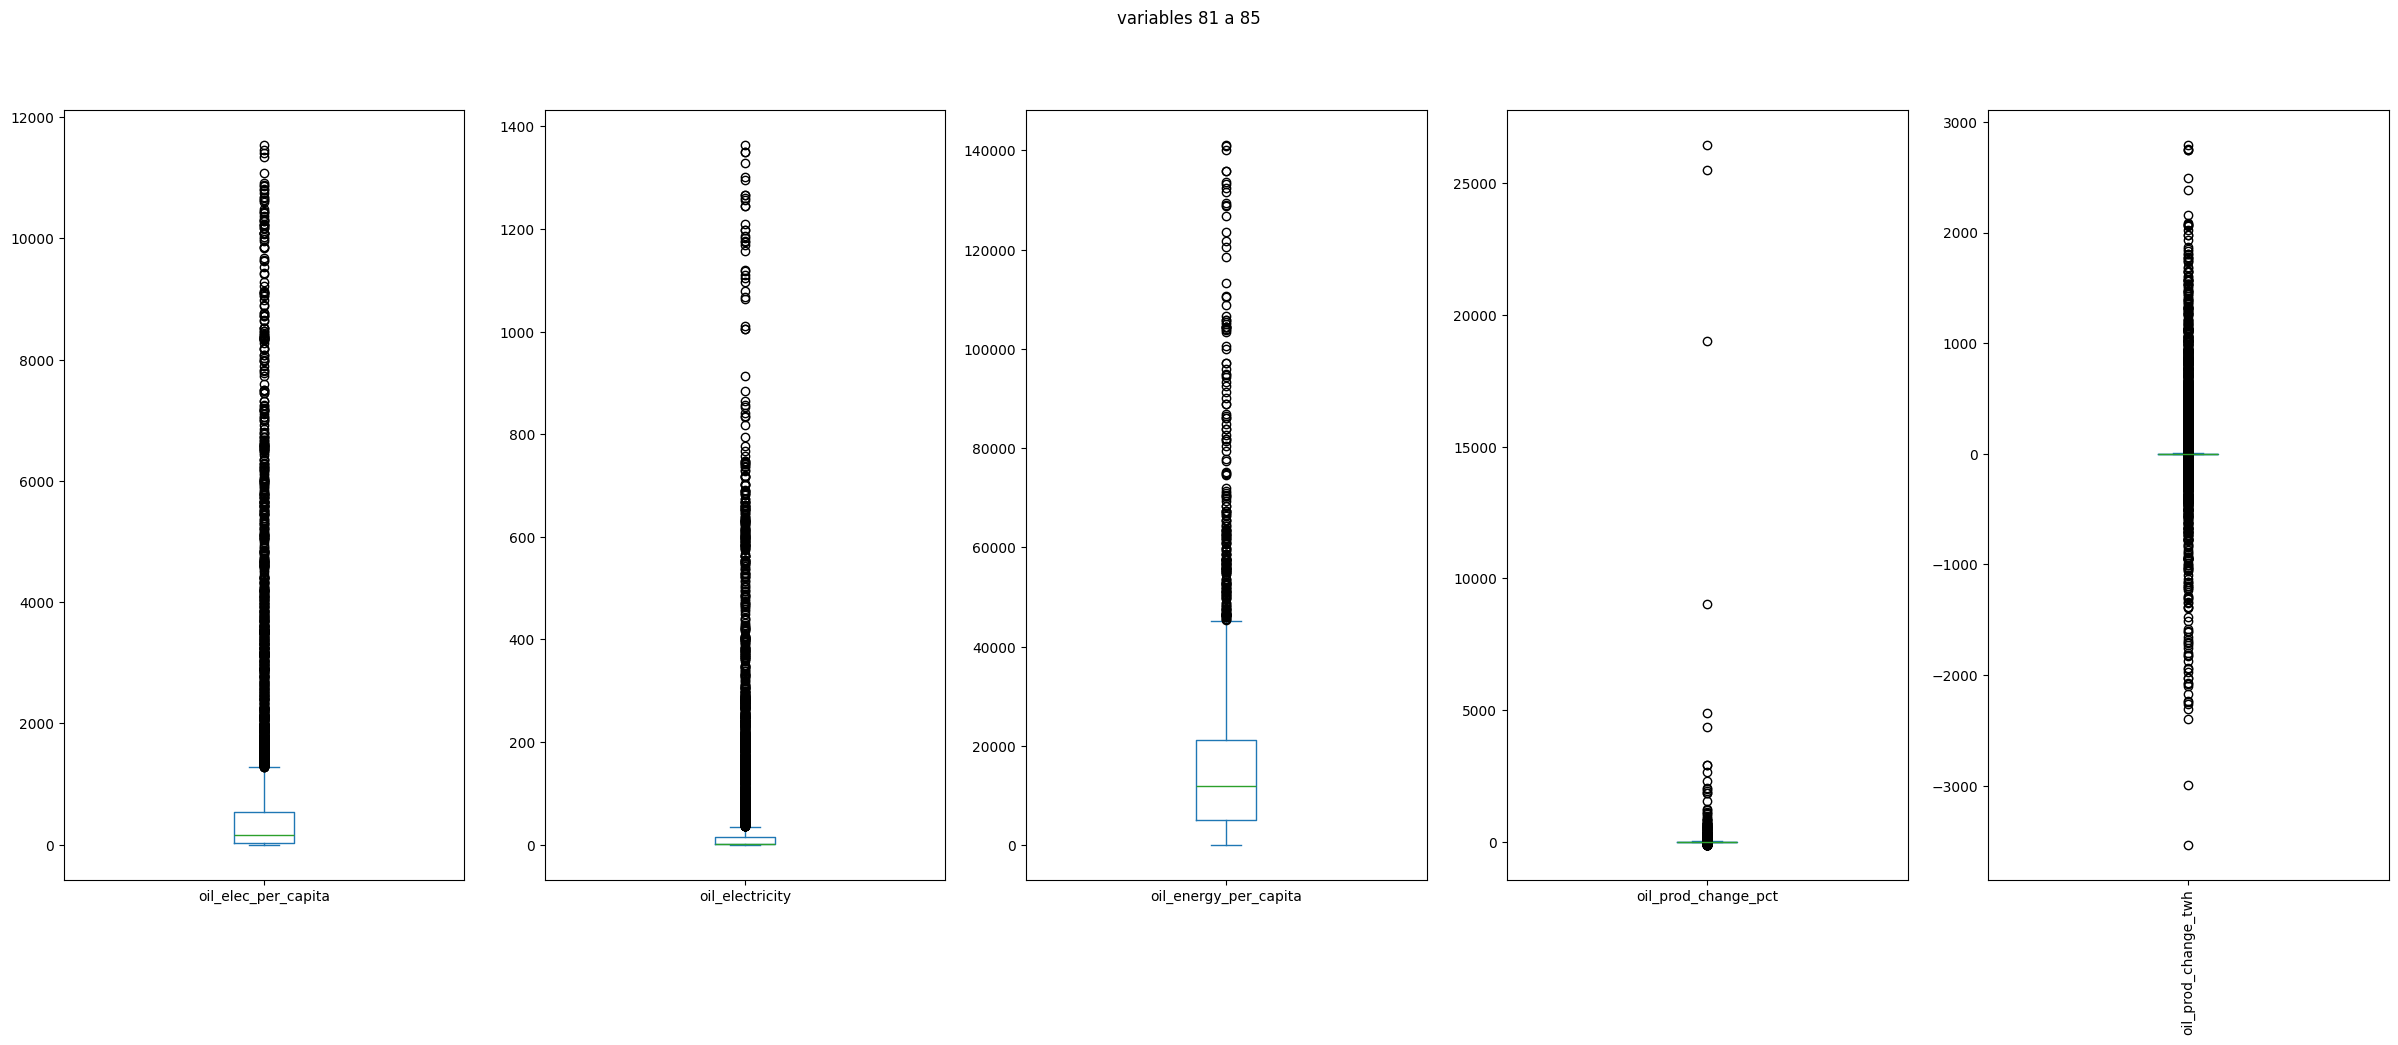

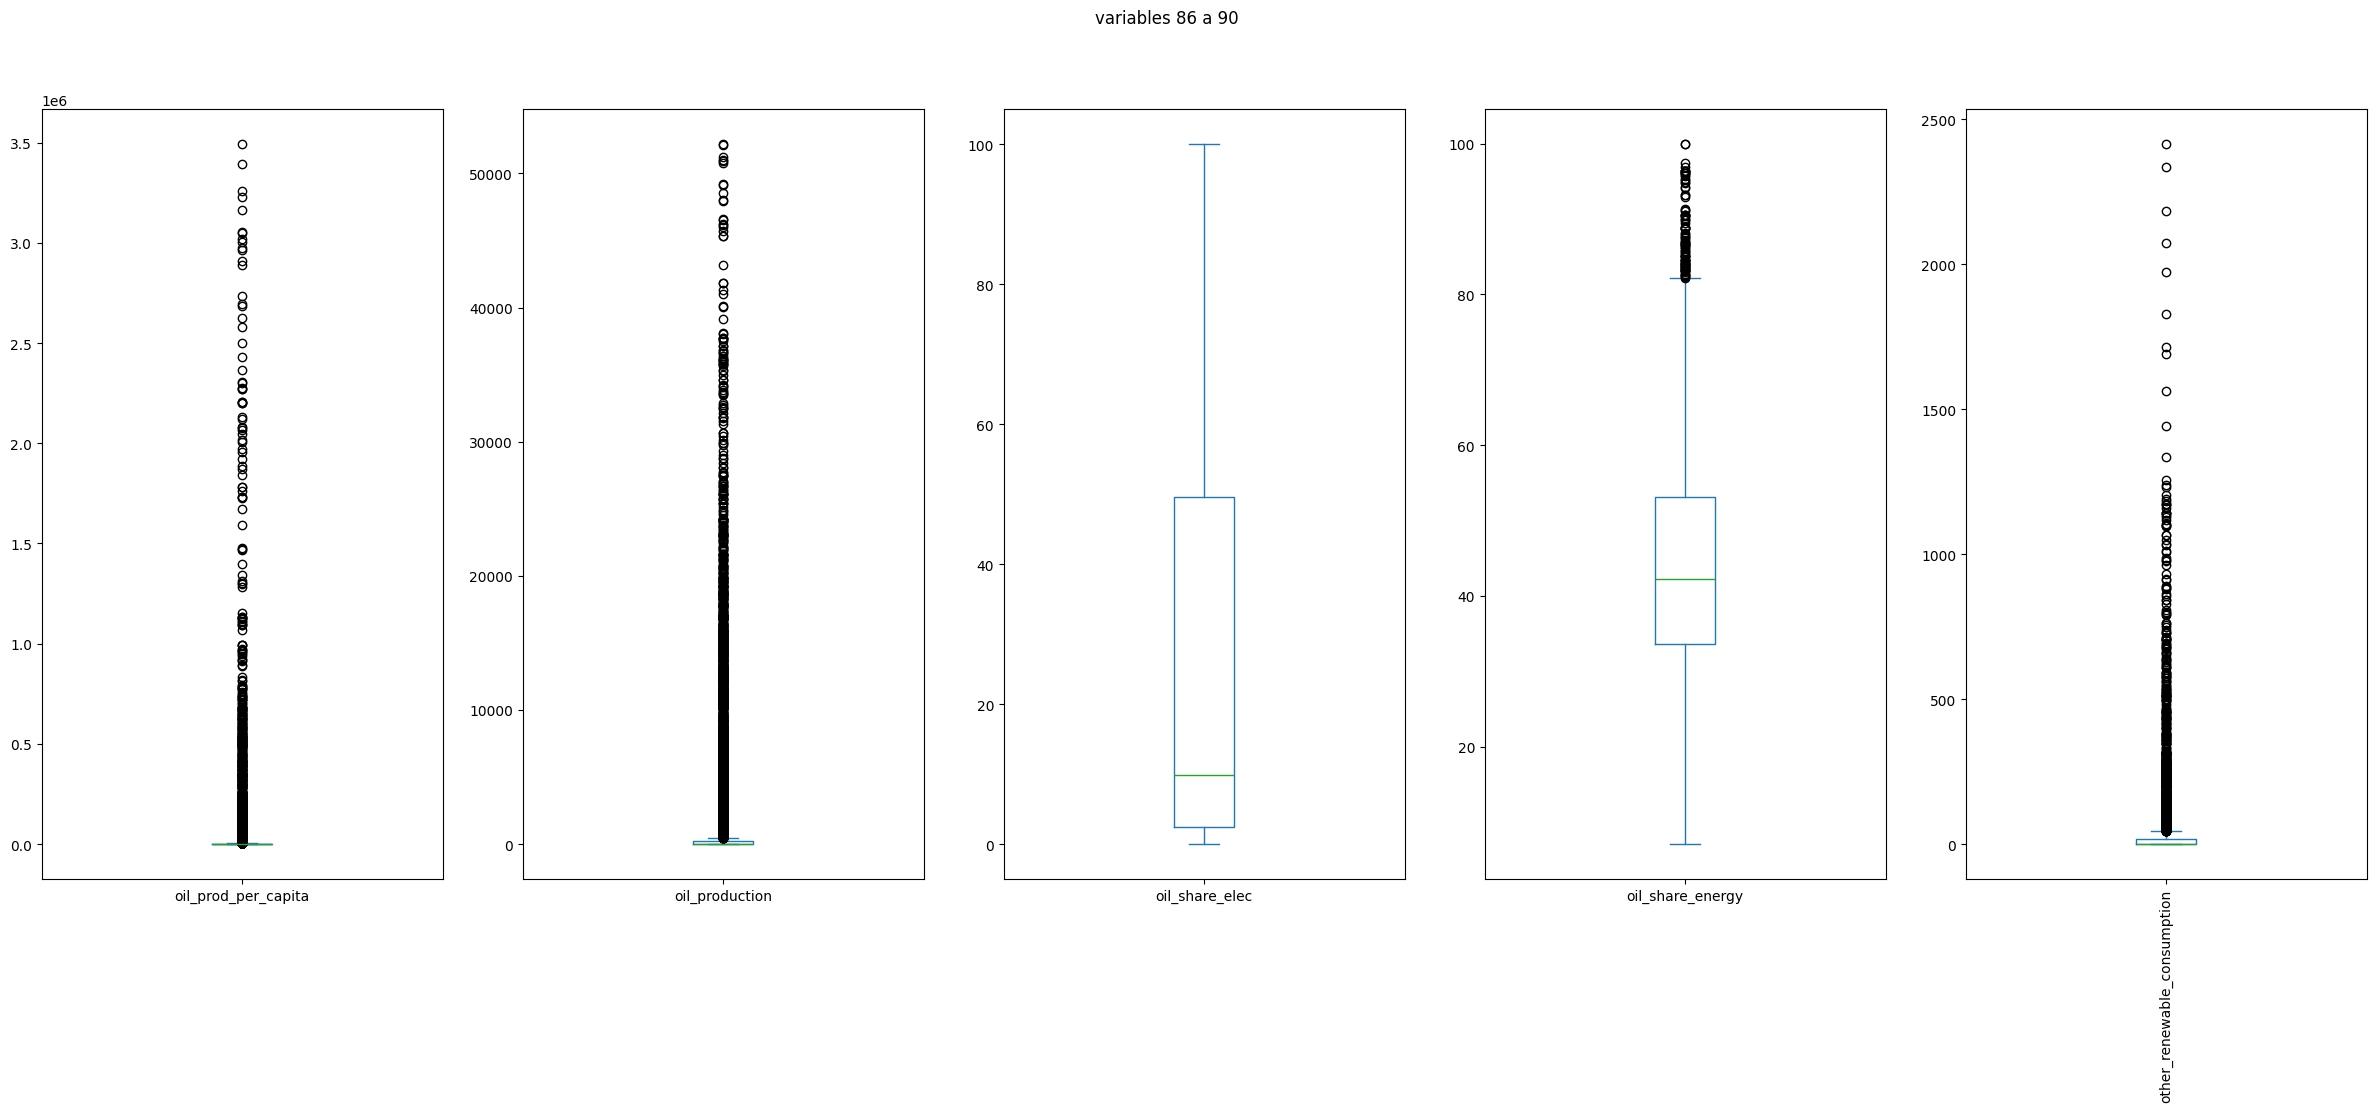

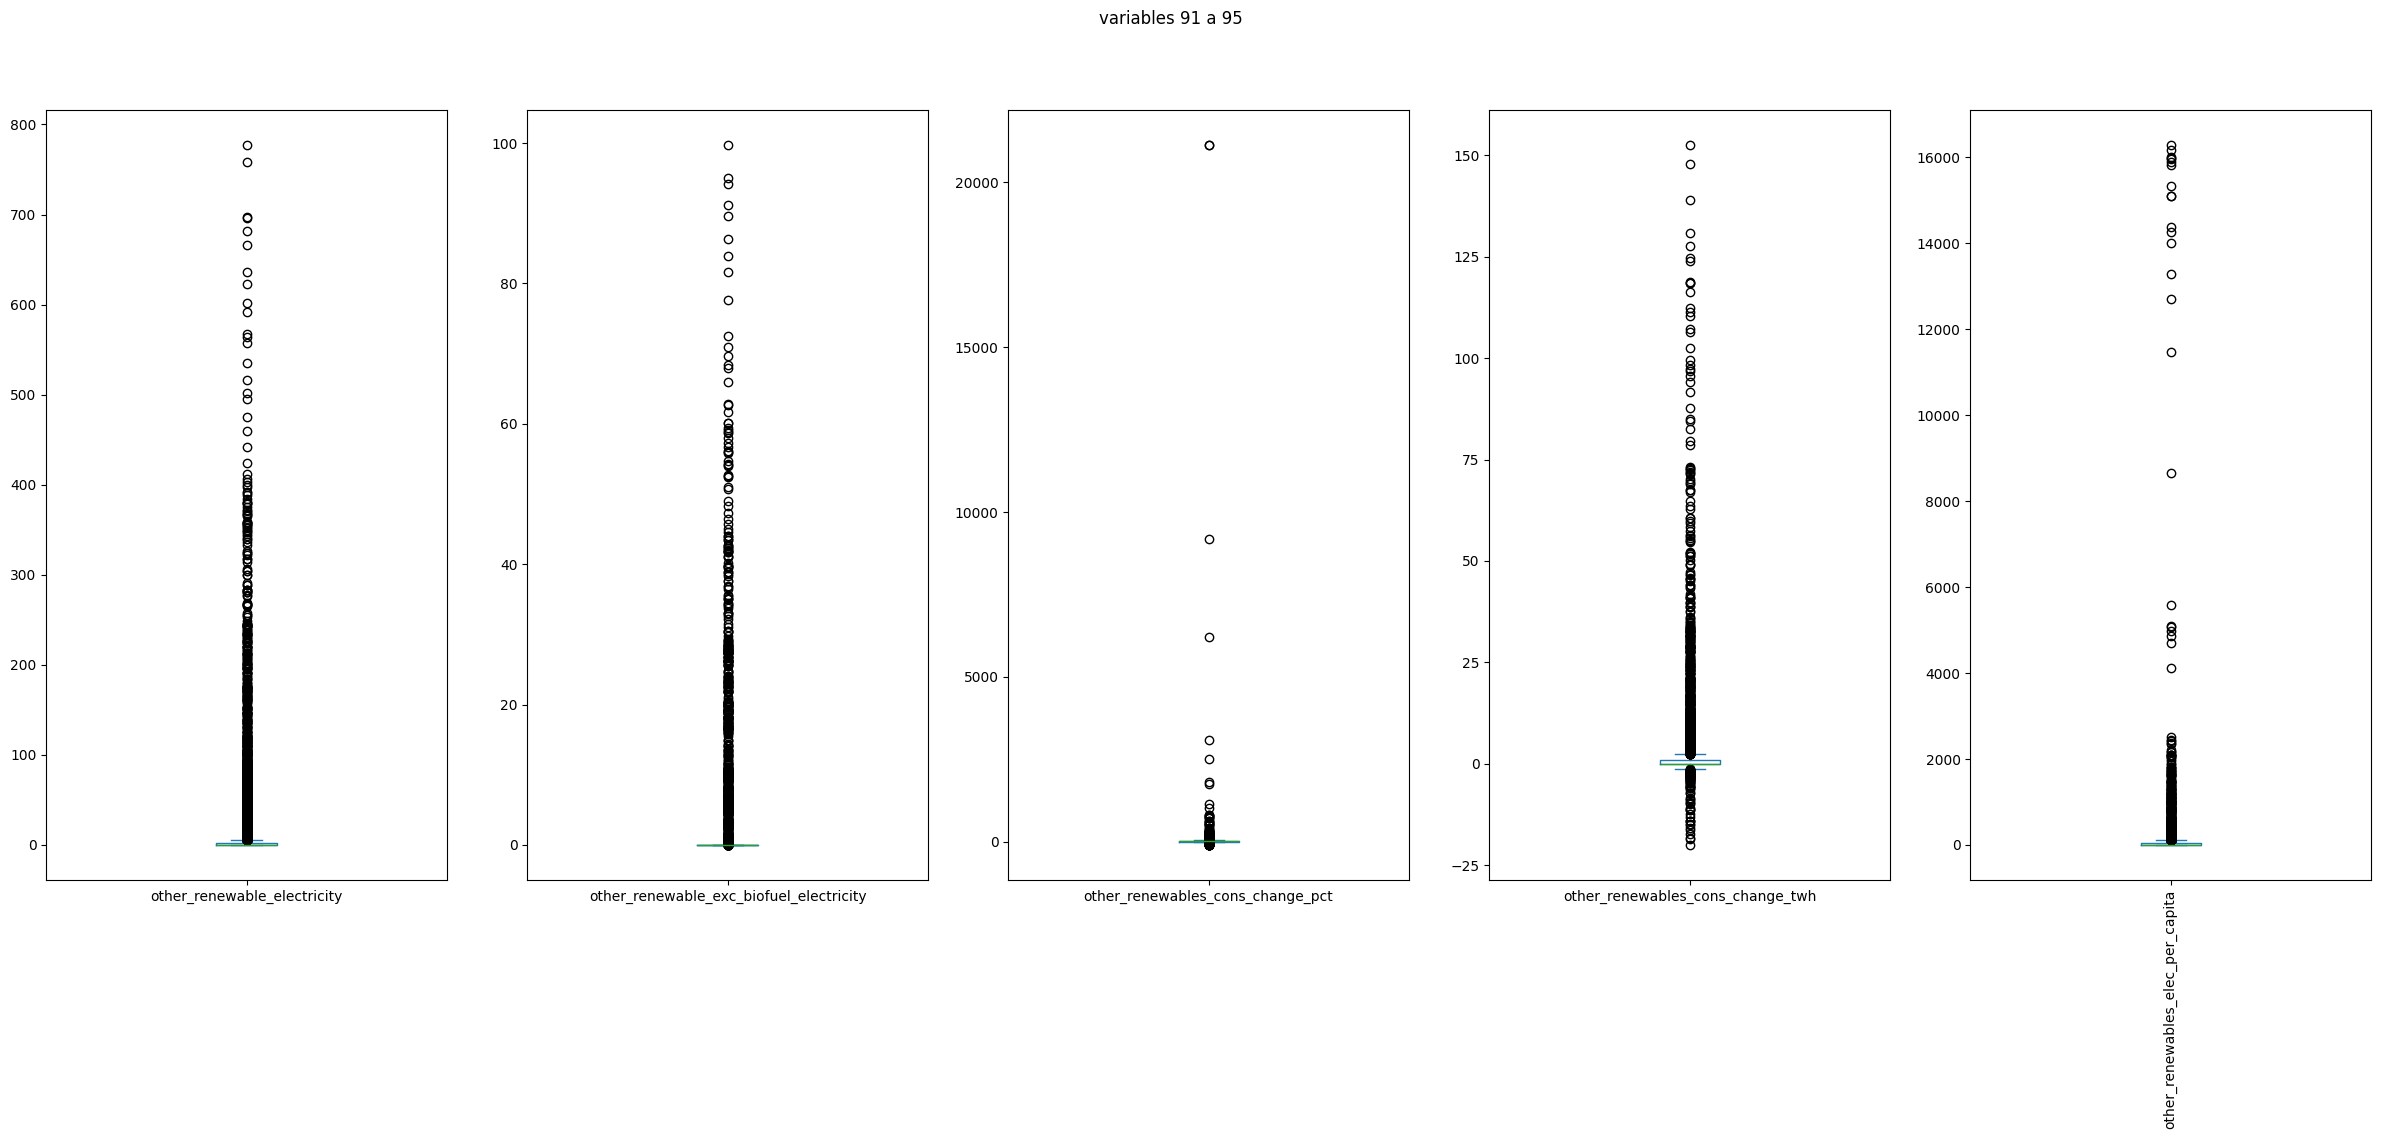

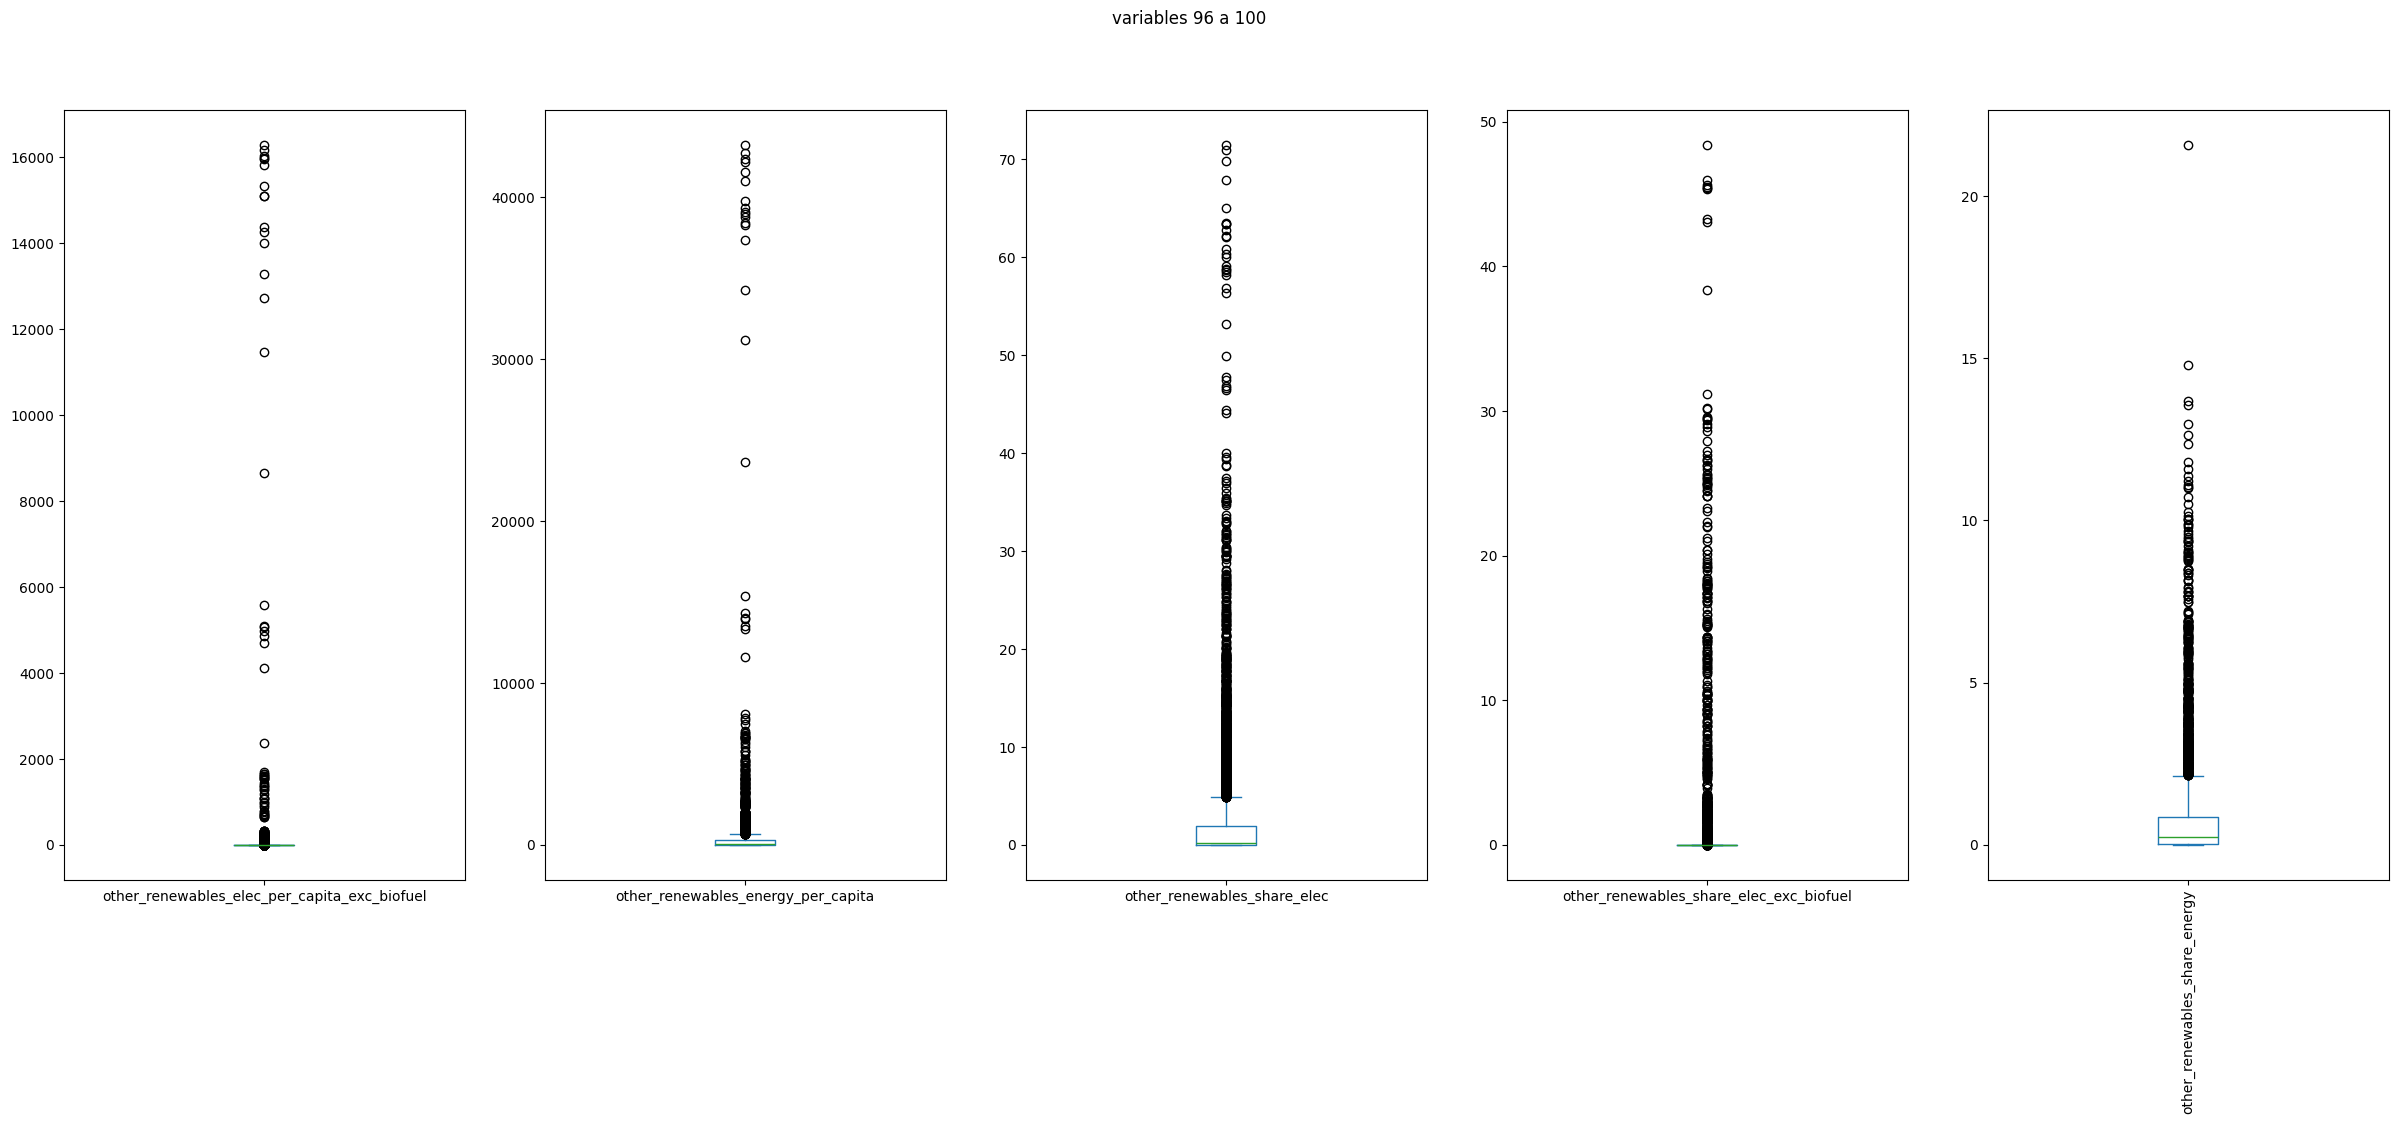

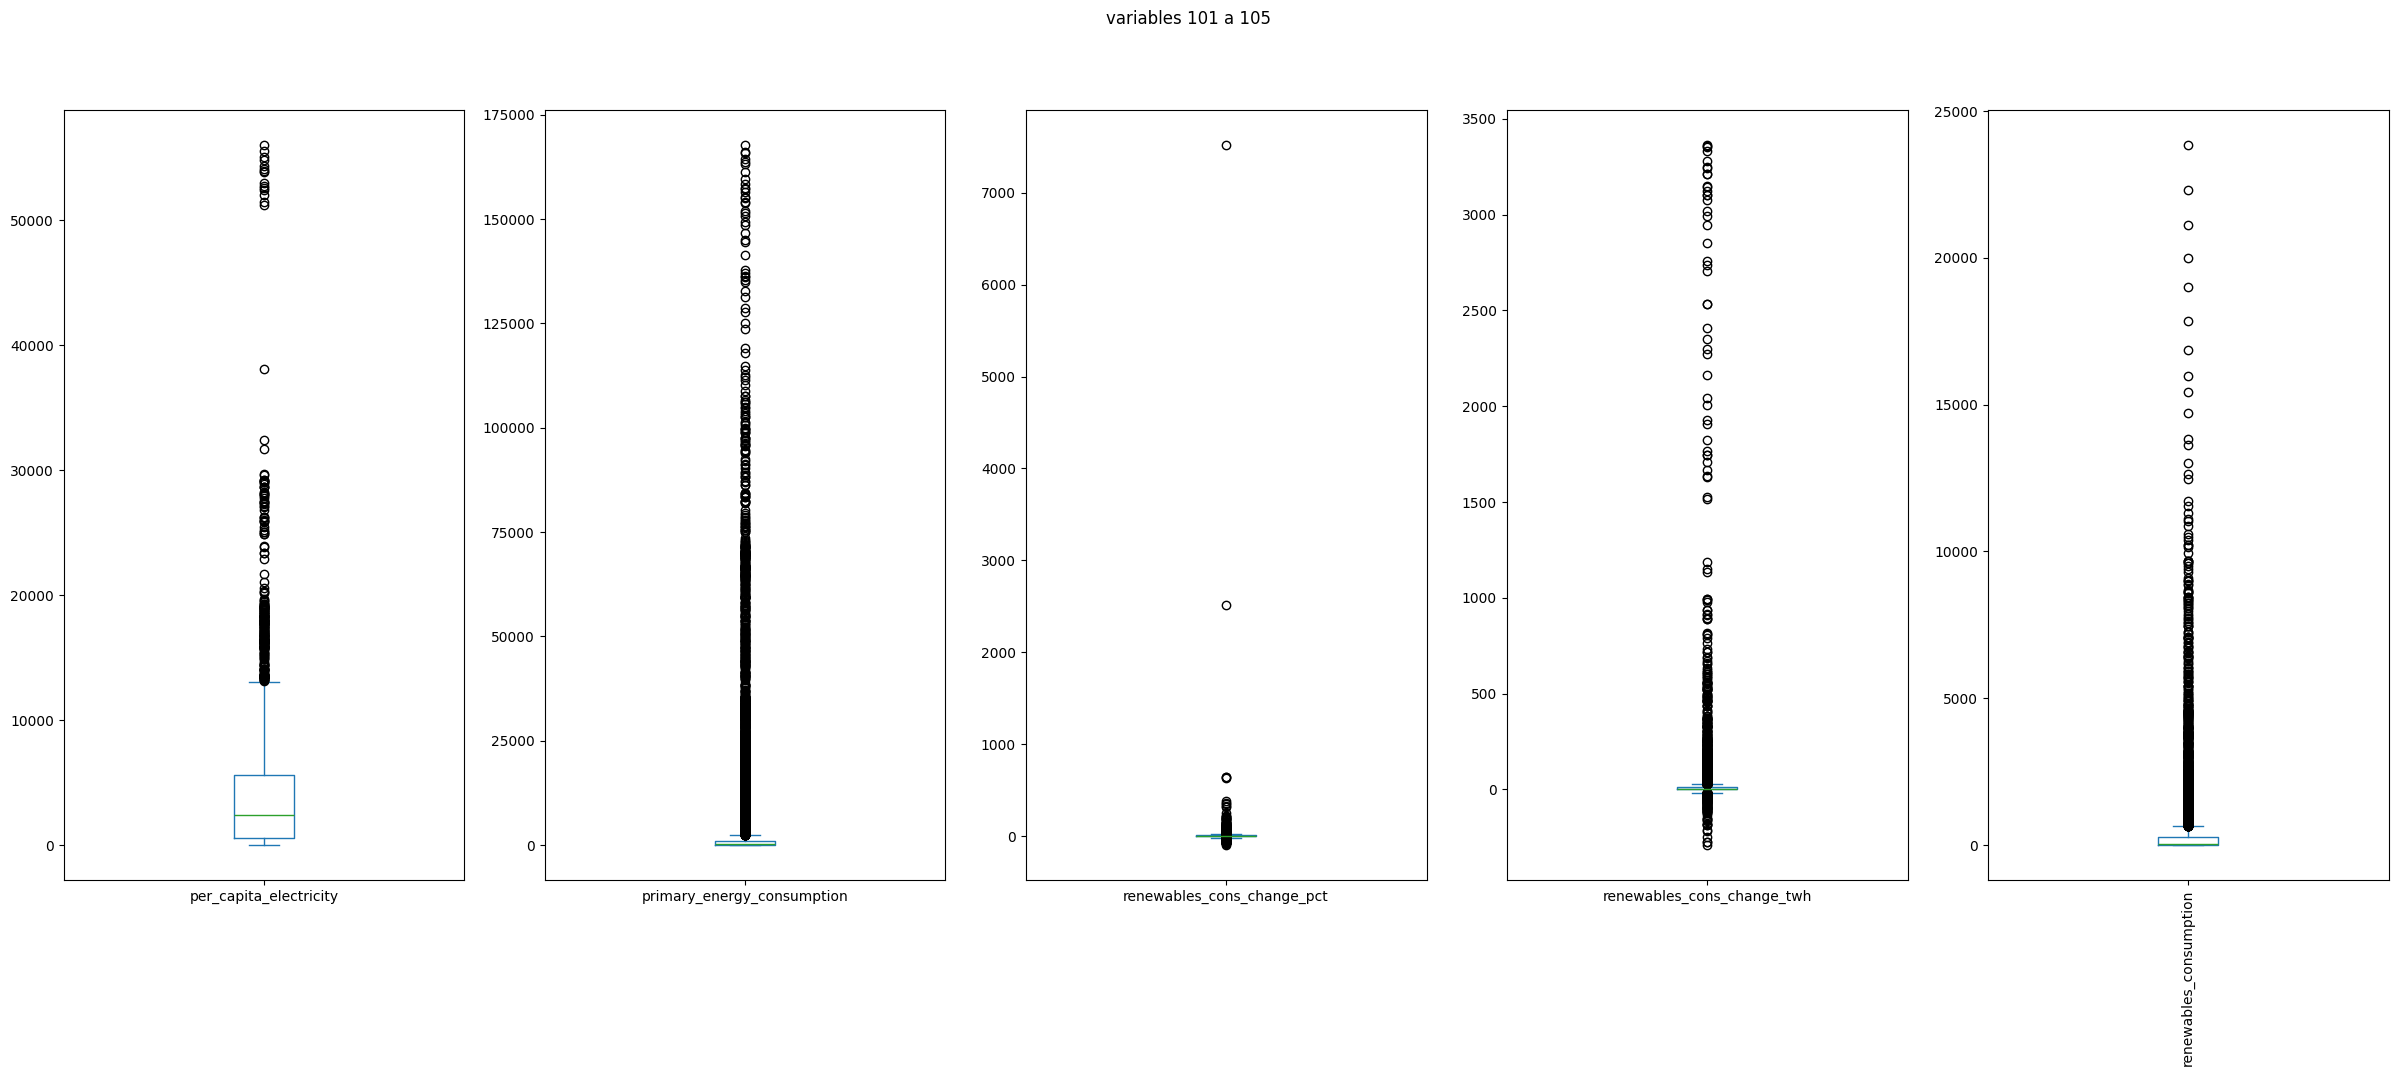

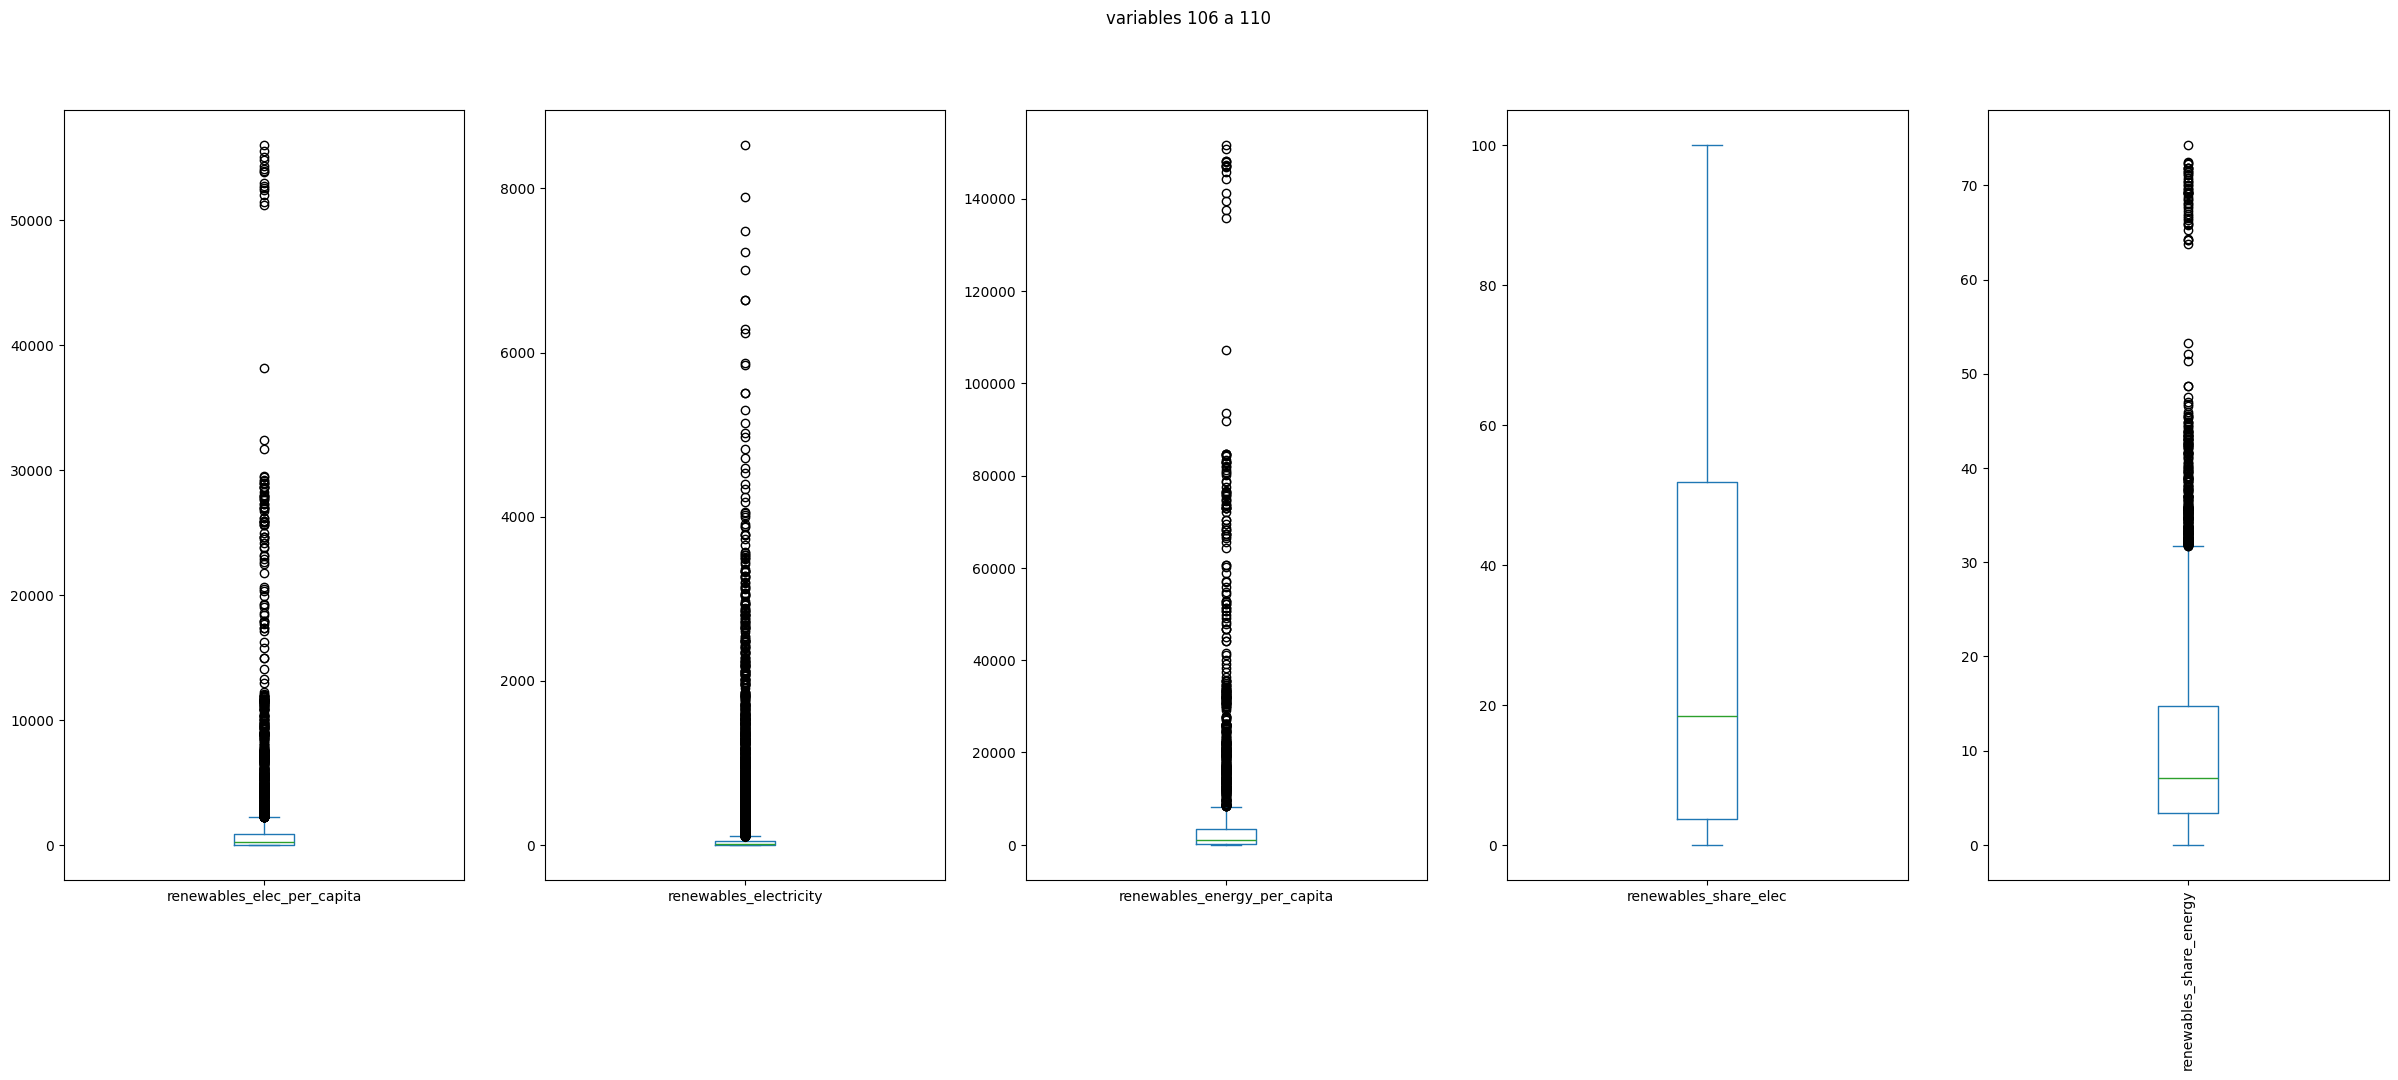

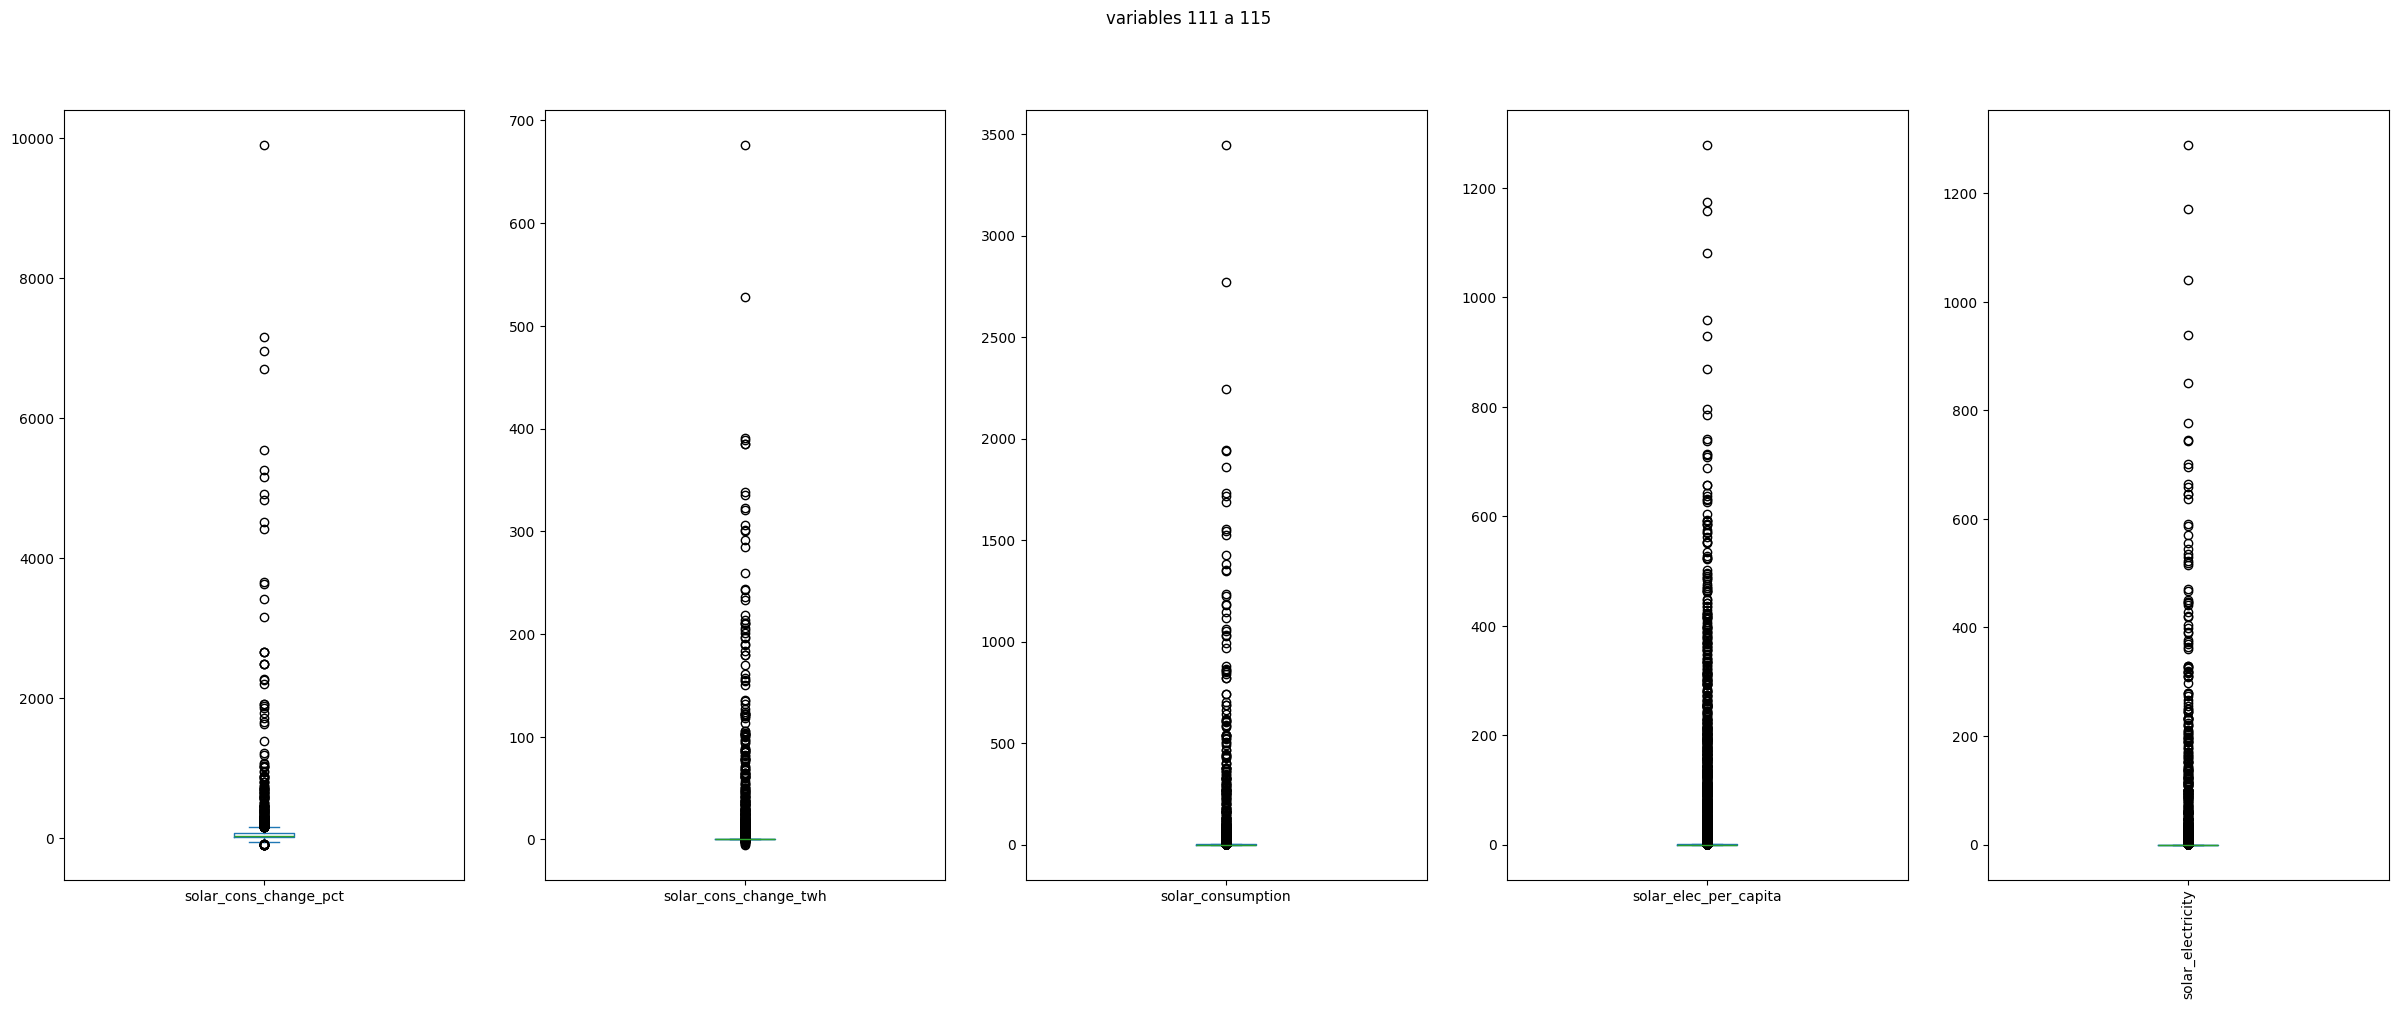

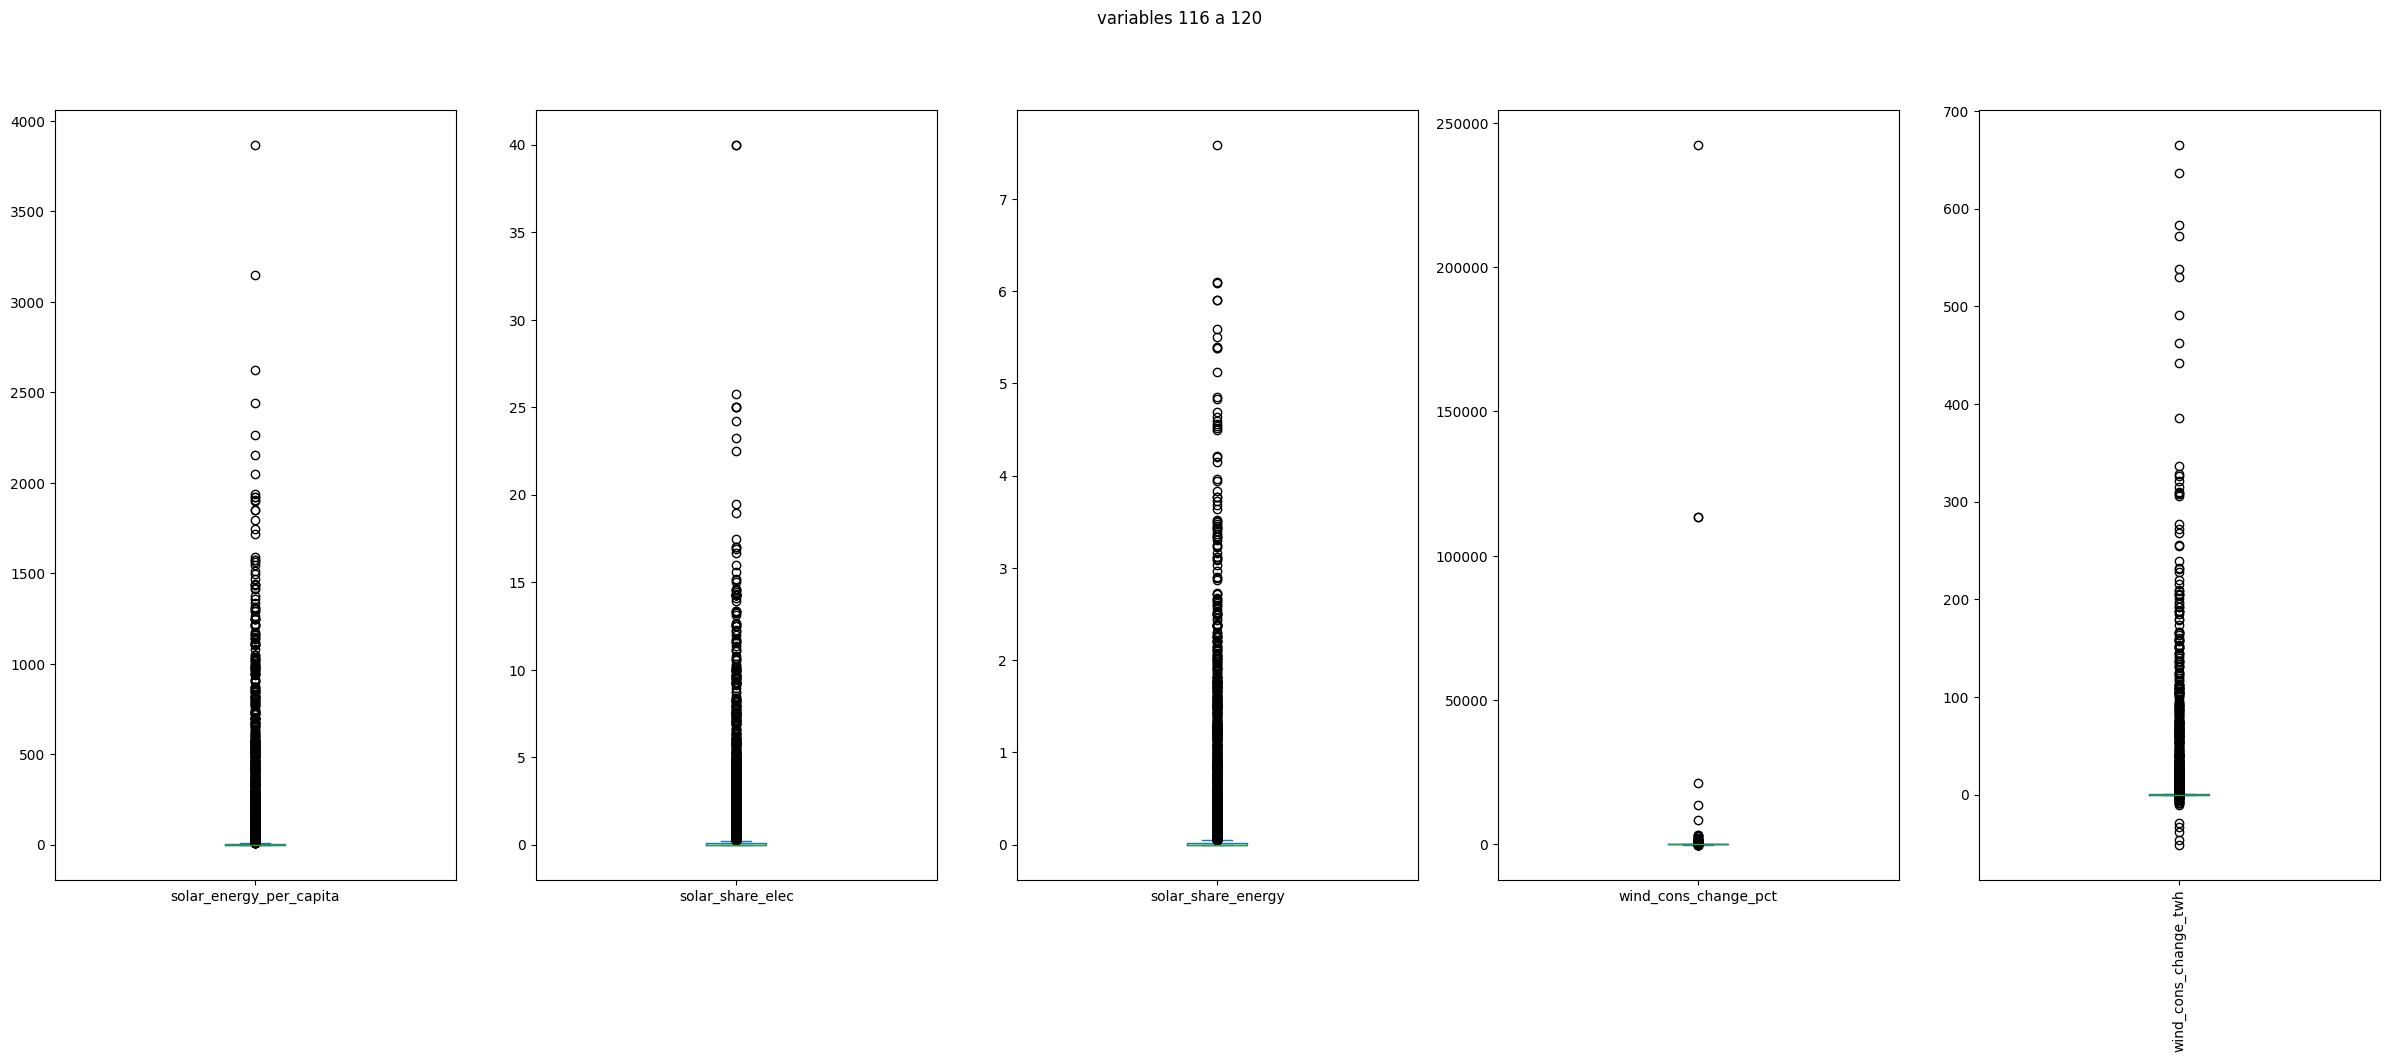

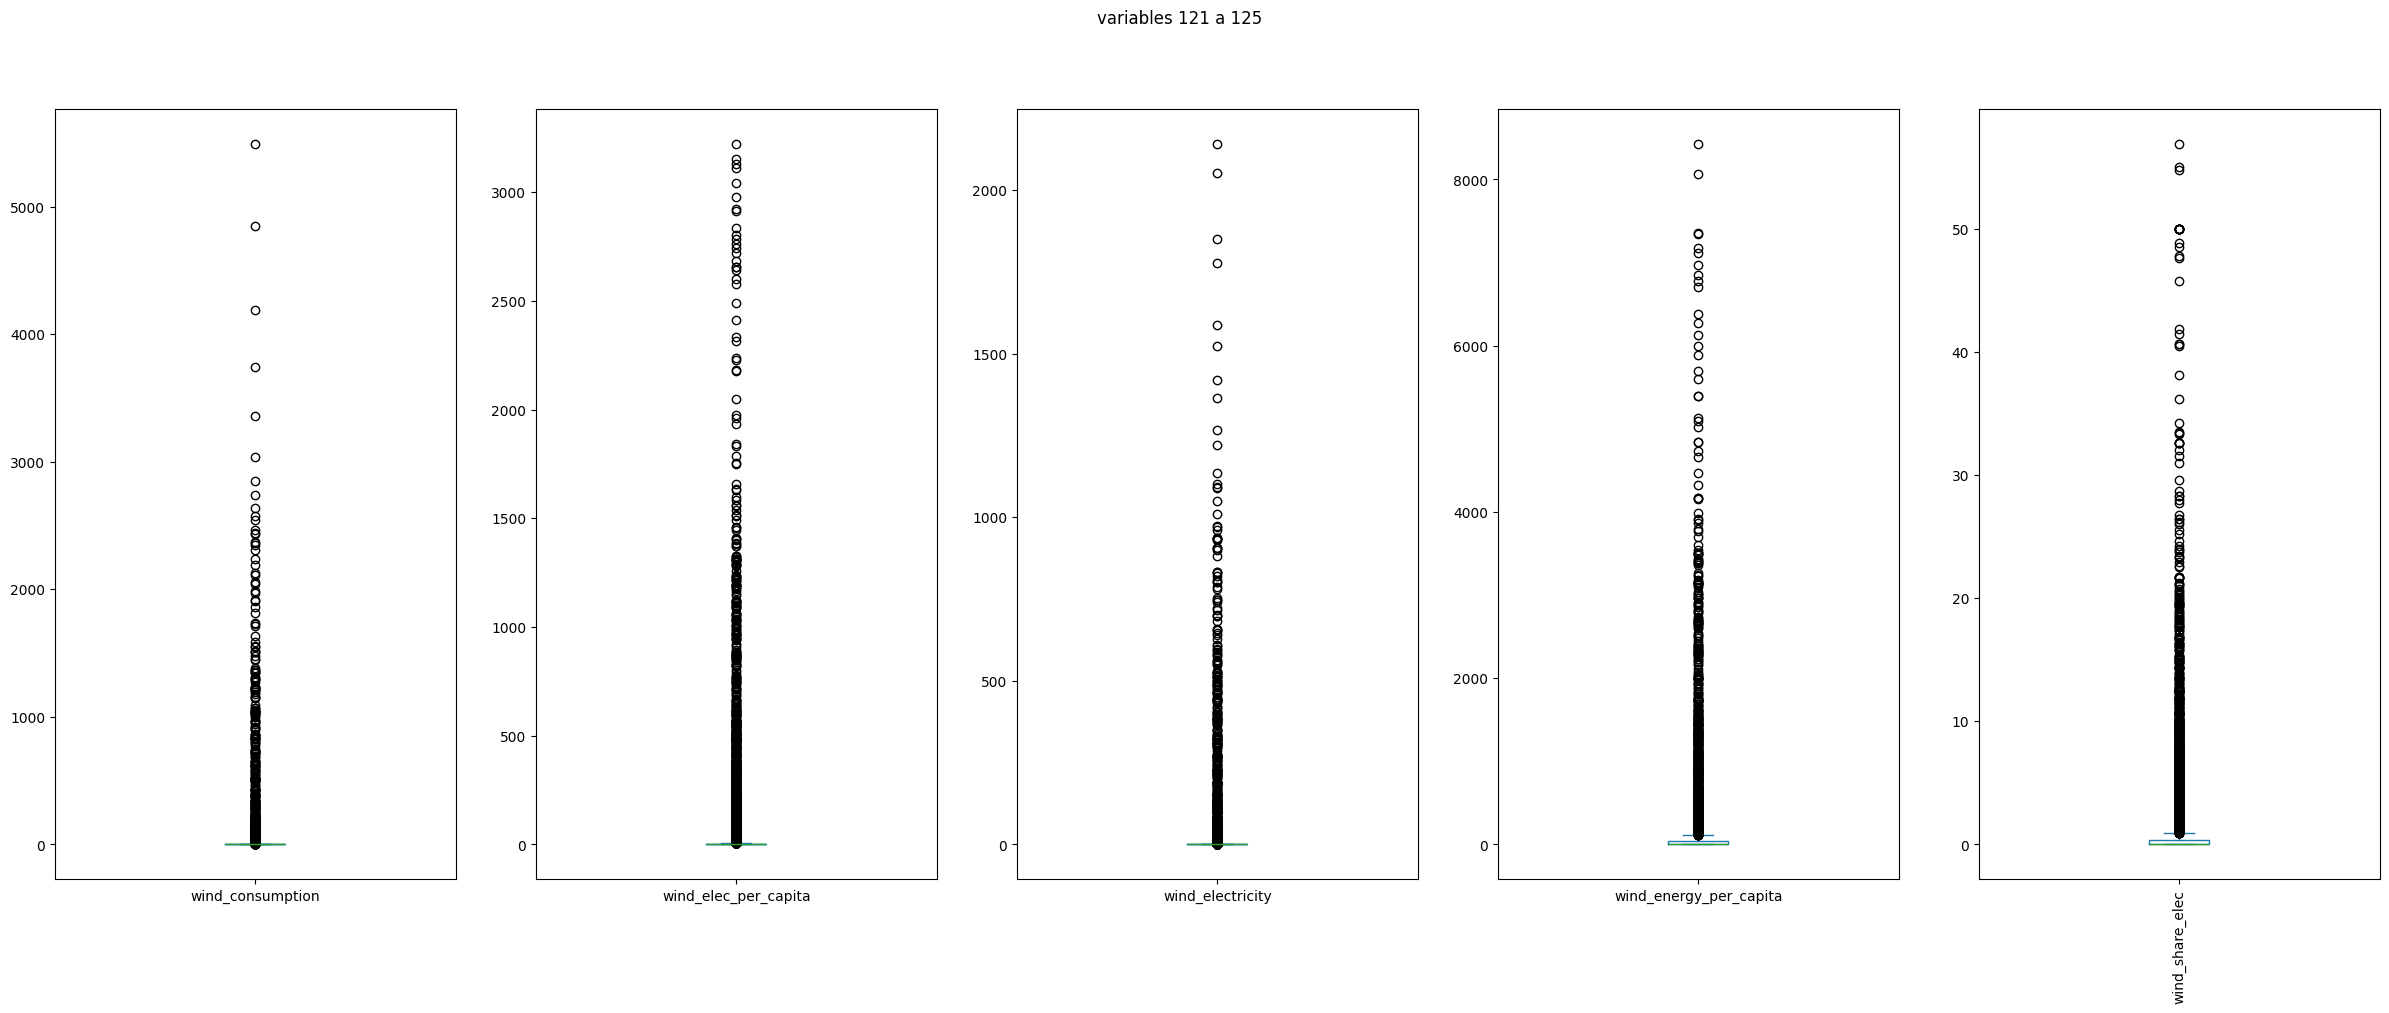

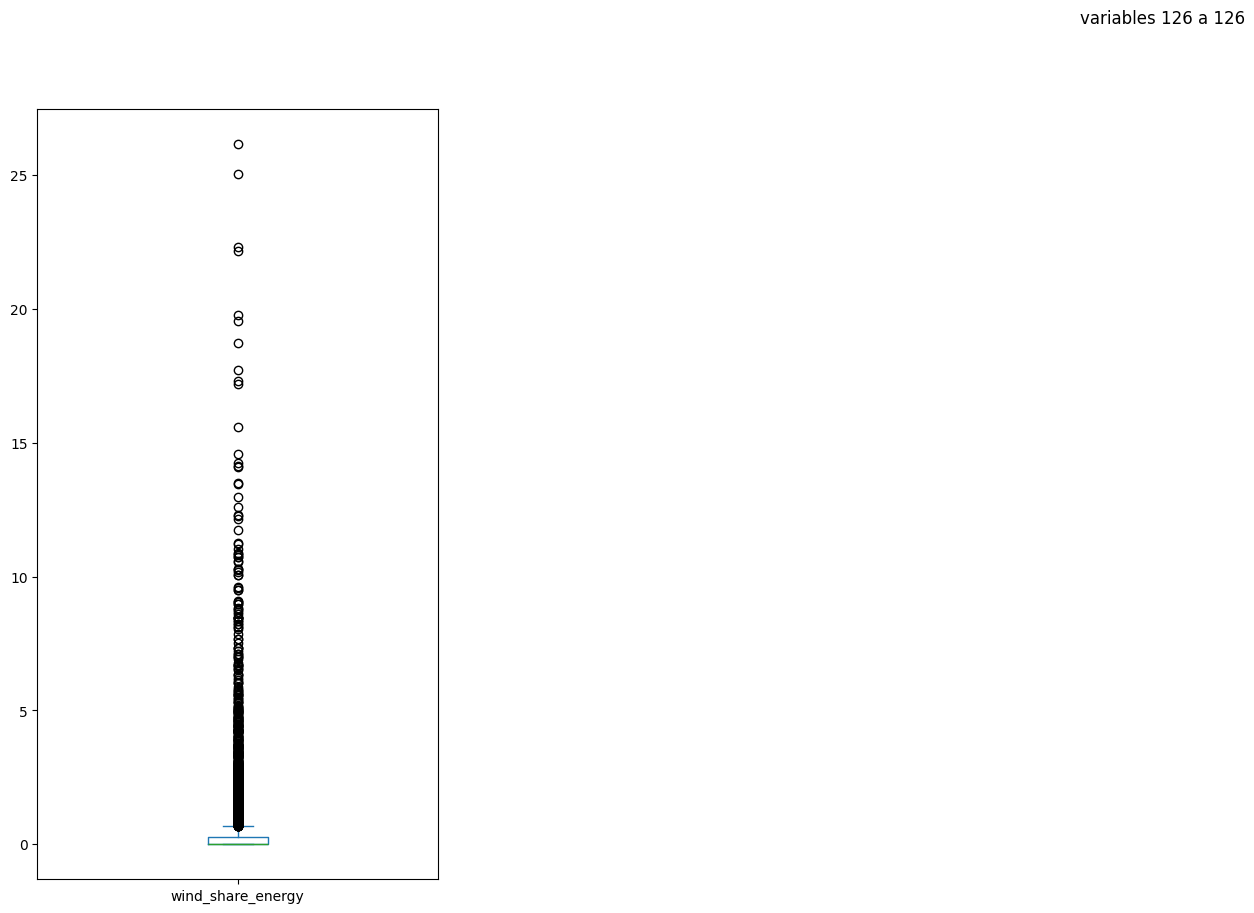

In [92]:
# verificamos las distribuciones de los datos

#columnas numéricas
num_cols=df.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

In [93]:
#altas asimetrías
df.select_dtypes(include='number').skew()
print(f'número de variables con alta asimetría {((df.select_dtypes(include='number').skew()>0.85)|(df.select_dtypes(include='number').skew()<-0.85)).sum()}')


número de variables con alta asimetría 120


In [94]:
#Verificamos los duplicados, nulos y atipicos
#número de duplicados 
df.duplicated().sum()
df.drop_duplicates(inplace=True)
# no hay presencia de duplicados
#verificación de nulos por columna
print(f' cantidad de nulos por columnas \n {df.isna().sum()}\n')
#verificación de nulos por filas
print(f'cantidad de filas al menos un nulo \n{(df.isna().any(axis=1)).sum()}')
#verificación de filas con alta proporción de nulos
print(f'cantidad de filas con un más del 50% del \n{(((df.isna().sum(axis=1))/df.shape[1])>0.5).sum()}')

 cantidad de nulos por columnas 
 country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64

cantidad de filas al menos un nulo 
21818
cantidad de filas con un más del 50% del 
15748


In [95]:
#eliminar columnas con muchos nulos
def eliminar_columnas_con_muchos_nulos(df, umbral=0.7):
    total_filas = len(df)
    columnas_a_eliminar = [col for col in df.columns if df[col].isna().sum() / total_filas >= umbral]
    df_limpio = df.drop(columns=columnas_a_eliminar)
    return df_limpio

In [96]:
#eliminar las filas con muchos nulos 
def eliminar_filas_con_muchos_nulos(df, umbral=0.5):
    umbral_nulos = int(df.shape[1] * umbral)
    return df[df.isna().sum(axis=1) < umbral_nulos]

In [97]:

df2 = eliminar_columnas_con_muchos_nulos(df)
df2
print(f'cantidad de columnas con la eliminación de las columnas con muchos nulos: {df2.shape[1]}')

cantidad de columnas con la eliminación de las columnas con muchos nulos: 44


In [98]:
#aplicamos la eliminación de filas con muchos nulos
df3 = eliminar_filas_con_muchos_nulos(df2)
df3
print(f'cantidad de filas con la eliminación de las filas con muchos nulos: {df3.shape[0]}')

cantidad de filas con la eliminación de las filas con muchos nulos: 8089


In [99]:
# Tratar nulos y outliers
def tratar_nulos_y_outliers(df, alpha=0.05):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        serie = df[col]
        # Test de normalidad (D’Agostino and Pearson)
        stat, p = normaltest(serie.dropna())
        es_normal = p > alpha

        # --- IMPUTACIÓN ---
        if serie.isna().sum() > 0:
            if es_normal:
                df[col] = serie.fillna(serie.mean())
            else:
                df[col] = serie.fillna(serie.median())

        # --- OUTLIERS ---
        if es_normal:
            # Método de 3 desviaciones estándar
            media = serie.mean()
            std = serie.std()
            mask_outlier = (serie < media - 3*std) | (serie > media + 3*std)
        else:
            # Método IQR
            q1 = serie.quantile(0.25)
            q3 = serie.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            mask_outlier = (serie < lower) | (serie > upper)

        # Opciones: eliminar, reemplazar o winsorizar. Aquí: imputar outliers con mediana
        if mask_outlier.any():
            if es_normal:
                df.loc[mask_outlier, col] = serie.mean()
            else:
                df.loc[mask_outlier, col] = serie.median()

    return df

In [100]:
df4 = tratar_nulos_y_outliers(df3)
df4

country  year iso_code  population             gdp  \
123    Afghanistan  2000      AFG 19542986.00  11283792896.00   
124    Afghanistan  2001      AFG 19688634.00  11021273088.00   
125    Afghanistan  2002      AFG 21000258.00  18804871168.00   
126    Afghanistan  2003      AFG 22645136.00  21074343936.00   
127    Afghanistan  2004      AFG 23553554.00  22332571648.00   
...            ...   ...      ...         ...             ...   
22006     Zimbabwe  2017      ZWE 14751101.00  21947836416.00   
22007     Zimbabwe  2018      ZWE 15052191.00  22715353088.00   
22008     Zimbabwe  2019      ZWE 15354606.00 114870009856.00   
22009     Zimbabwe  2020      ZWE 15669663.00 114870009856.00   
22010     Zimbabwe  2021      ZWE 15993525.00 114870009856.00   

       coal_prod_change_pct  coal_prod_change_twh  coal_prod_per_capita  \
123                    0.00                  0.00                  0.30   
124                    0.92                  0.14                  7.67   
125                  -19.23                 -0.03                  5.81   
126                    0.92                  0.08                  8.97   
127                   -2.86                 -0.01                  8.38   
...                     ...                   ...                   ...   
22006                  8.38                  0.00               1488.51   
22007                 14.34                  0.00               1667.86   
22008                -21.53                  0.00               1283.00   
22009                  3.00                  0.59               1294.98   
22010                 19.71                  0.00               1518.80   

       coal_production  electricity_generation  ...  \
123               0.01                    0.47  ...   
124               0.15                    0.59  ...   
125               0.12                    0.69  ...   
126               0.20                    0.94  ...   
127               0.20                    0.89  ...   
...                ...                     ...  ...   
22006            21.96                    7.35  ...   
22007            25.11                    9.19  ...   
22008            19.70                    8.24  ...   
22009            20.29                    7.59  ...   
22010            24.29                    8.03  ...   

       primary_energy_consumption  renewables_elec_per_capita  \
123                          5.91                       15.86   
124                          4.66                       25.39   
125                          4.43                       26.67   
126                          5.21                       27.82   
127                          4.81                       23.78   
...                           ...                         ...   
22006                       45.26                      291.50   
22007                       51.81                      362.74   
22008                       46.12                      298.28   
22009                       42.00                      267.40   
22010                       42.15                      276.36   

       renewables_electricity  renewables_share_elec  solar_elec_per_capita  \
123                      0.31                  65.96                   0.00   
124                      0.50                  84.75                   0.00   
125                      0.56                  81.16                   0.00   
126                      0.63                  67.02                   0.00   
127                      0.56                  62.92                   0.00   
...                       ...                    ...                    ...   
22006                    4.30                  58.50                   0.68   
22007                    5.46                  59.41                   0.00   
22008                    4.58                  55.58                   0.00   
22009                    4.19                  55.20                   0.00   
22010             

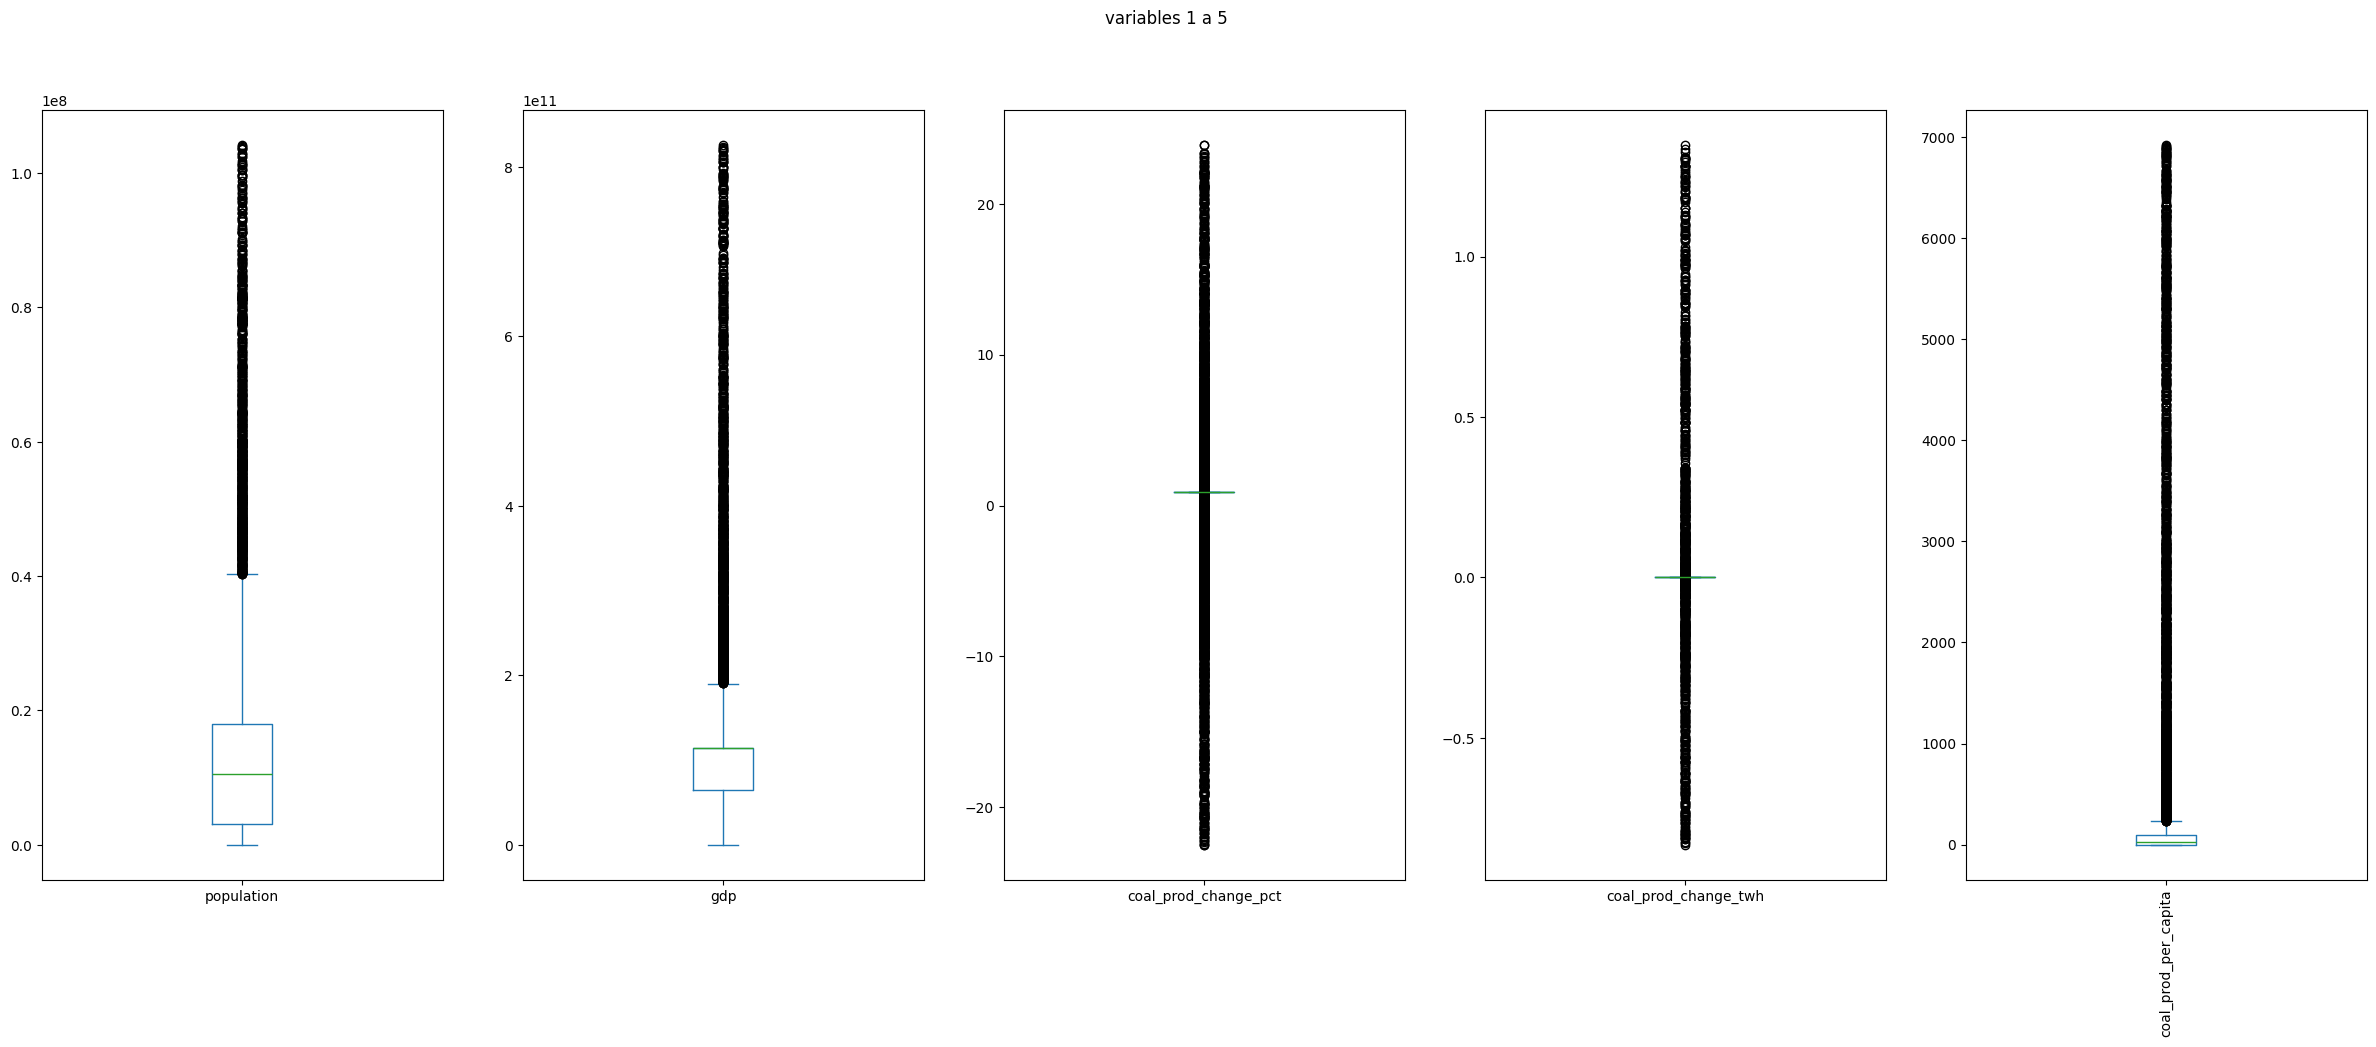

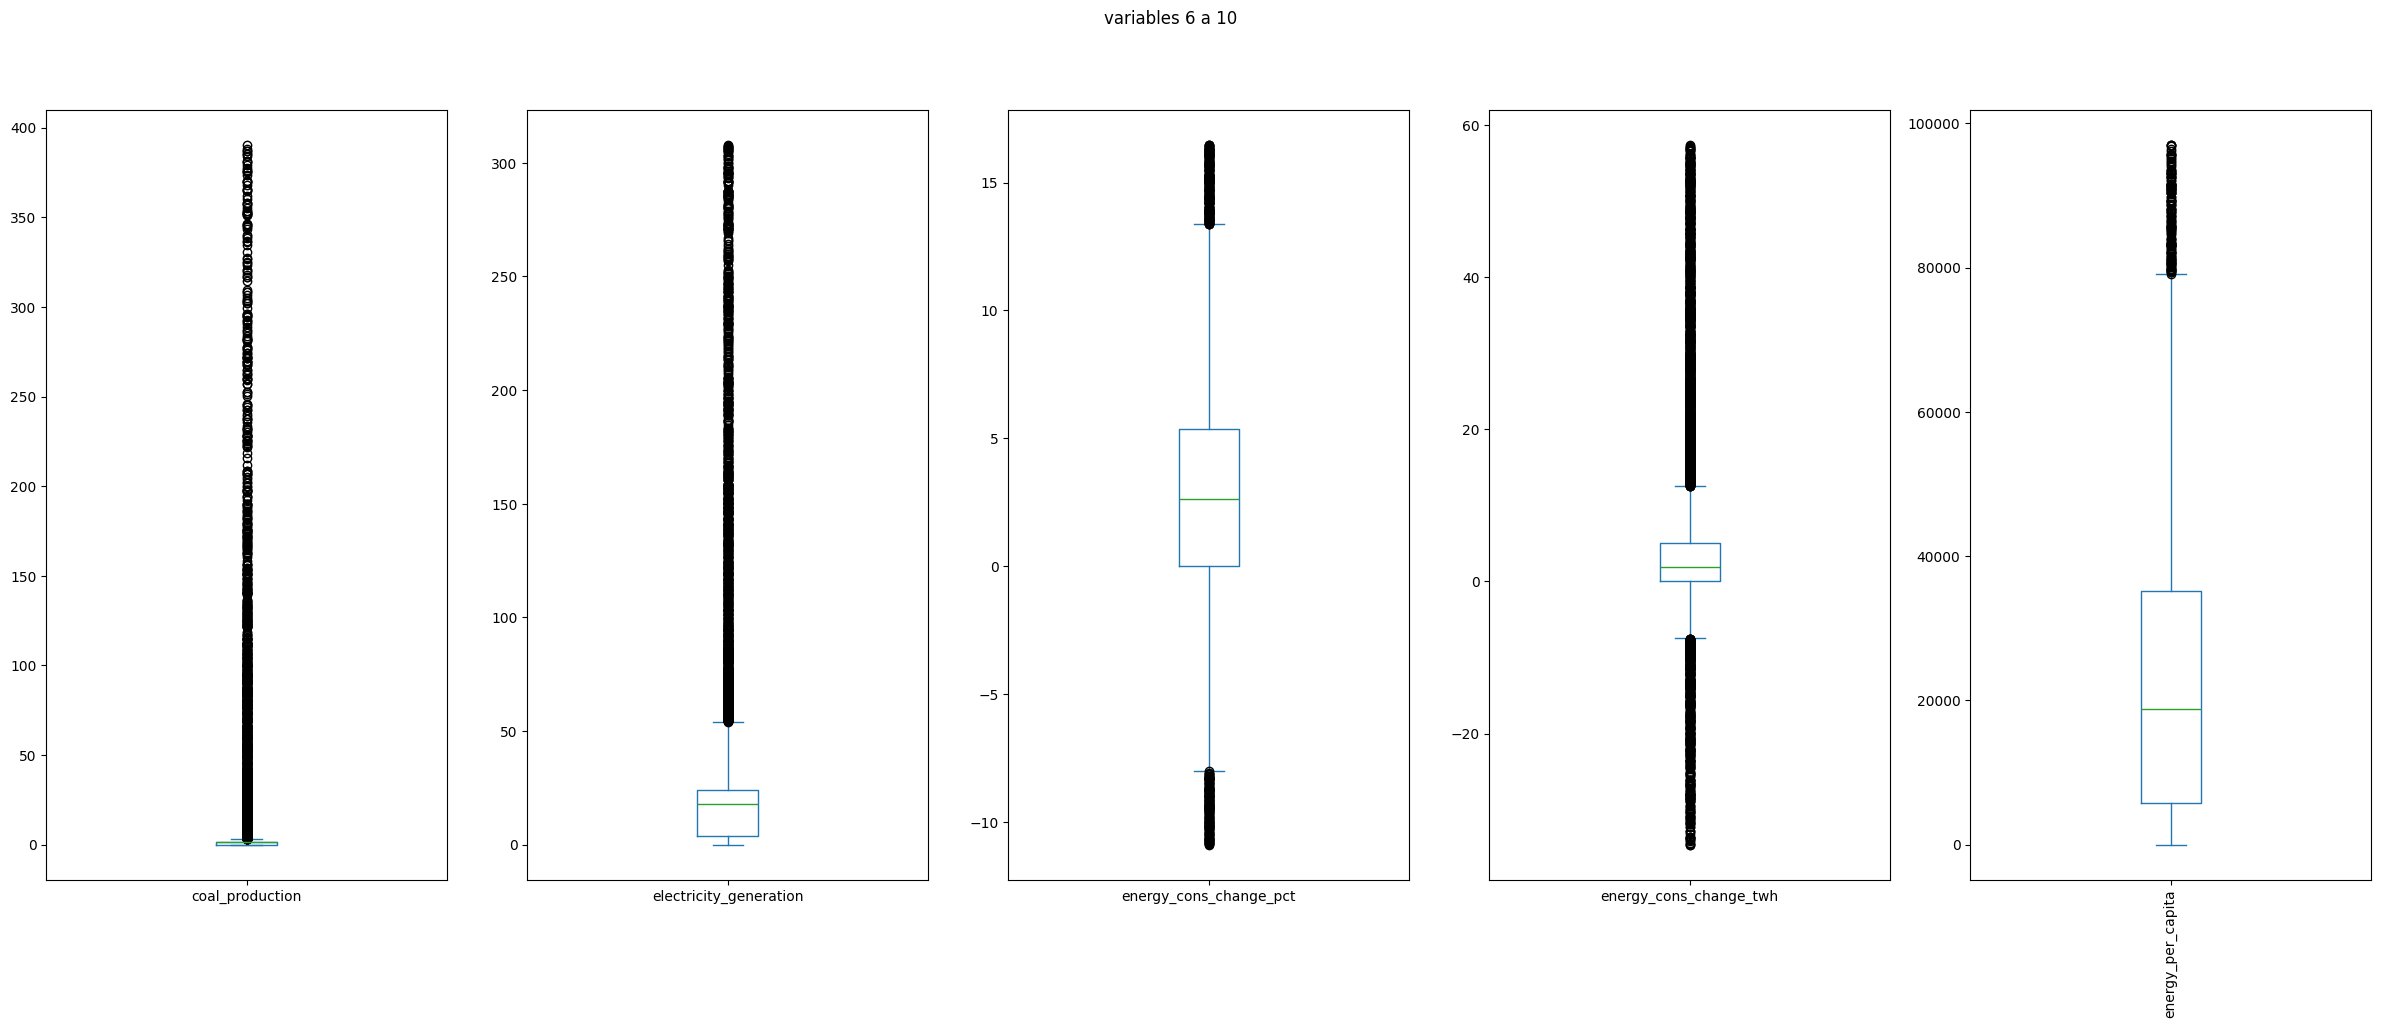

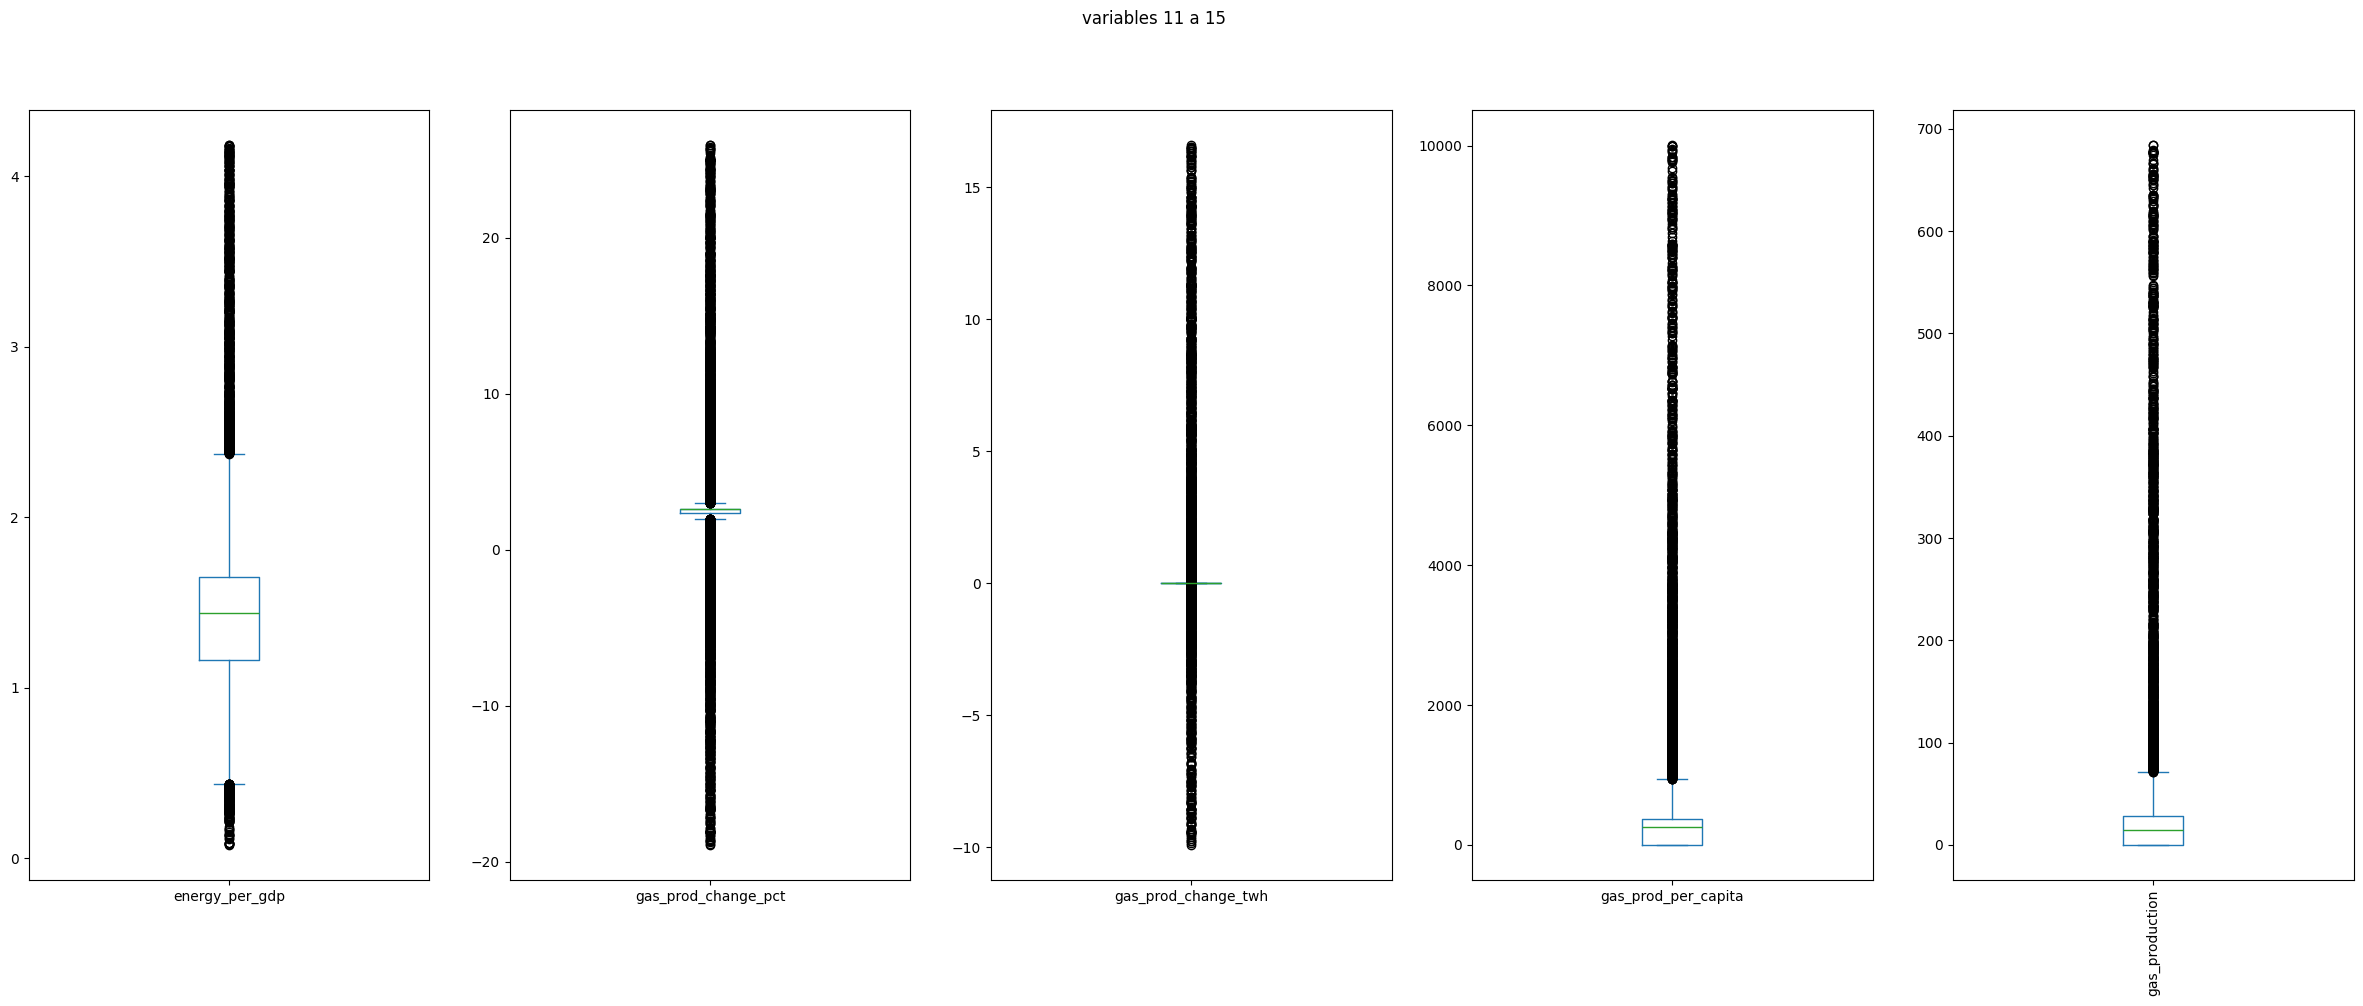

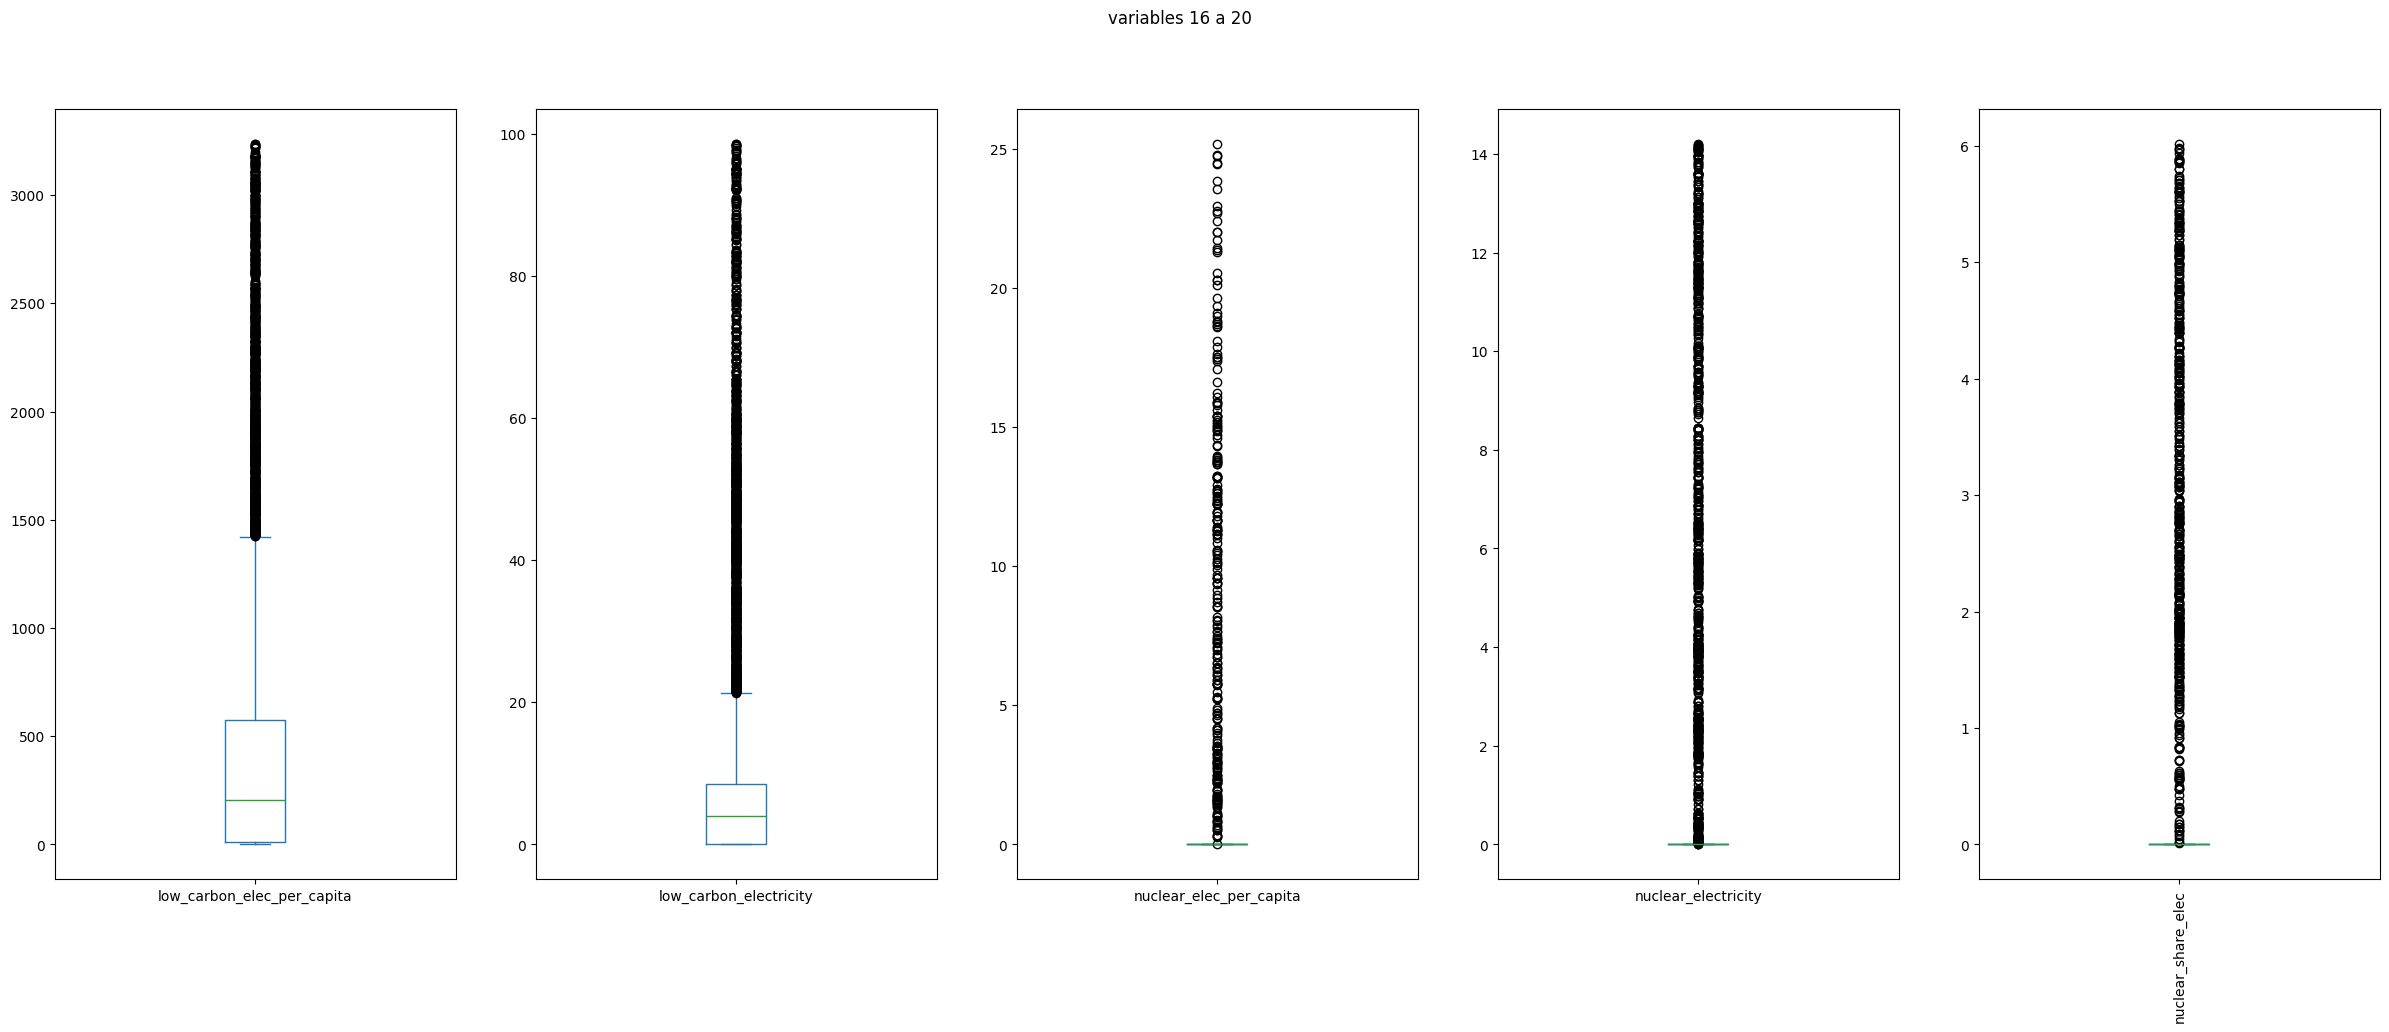

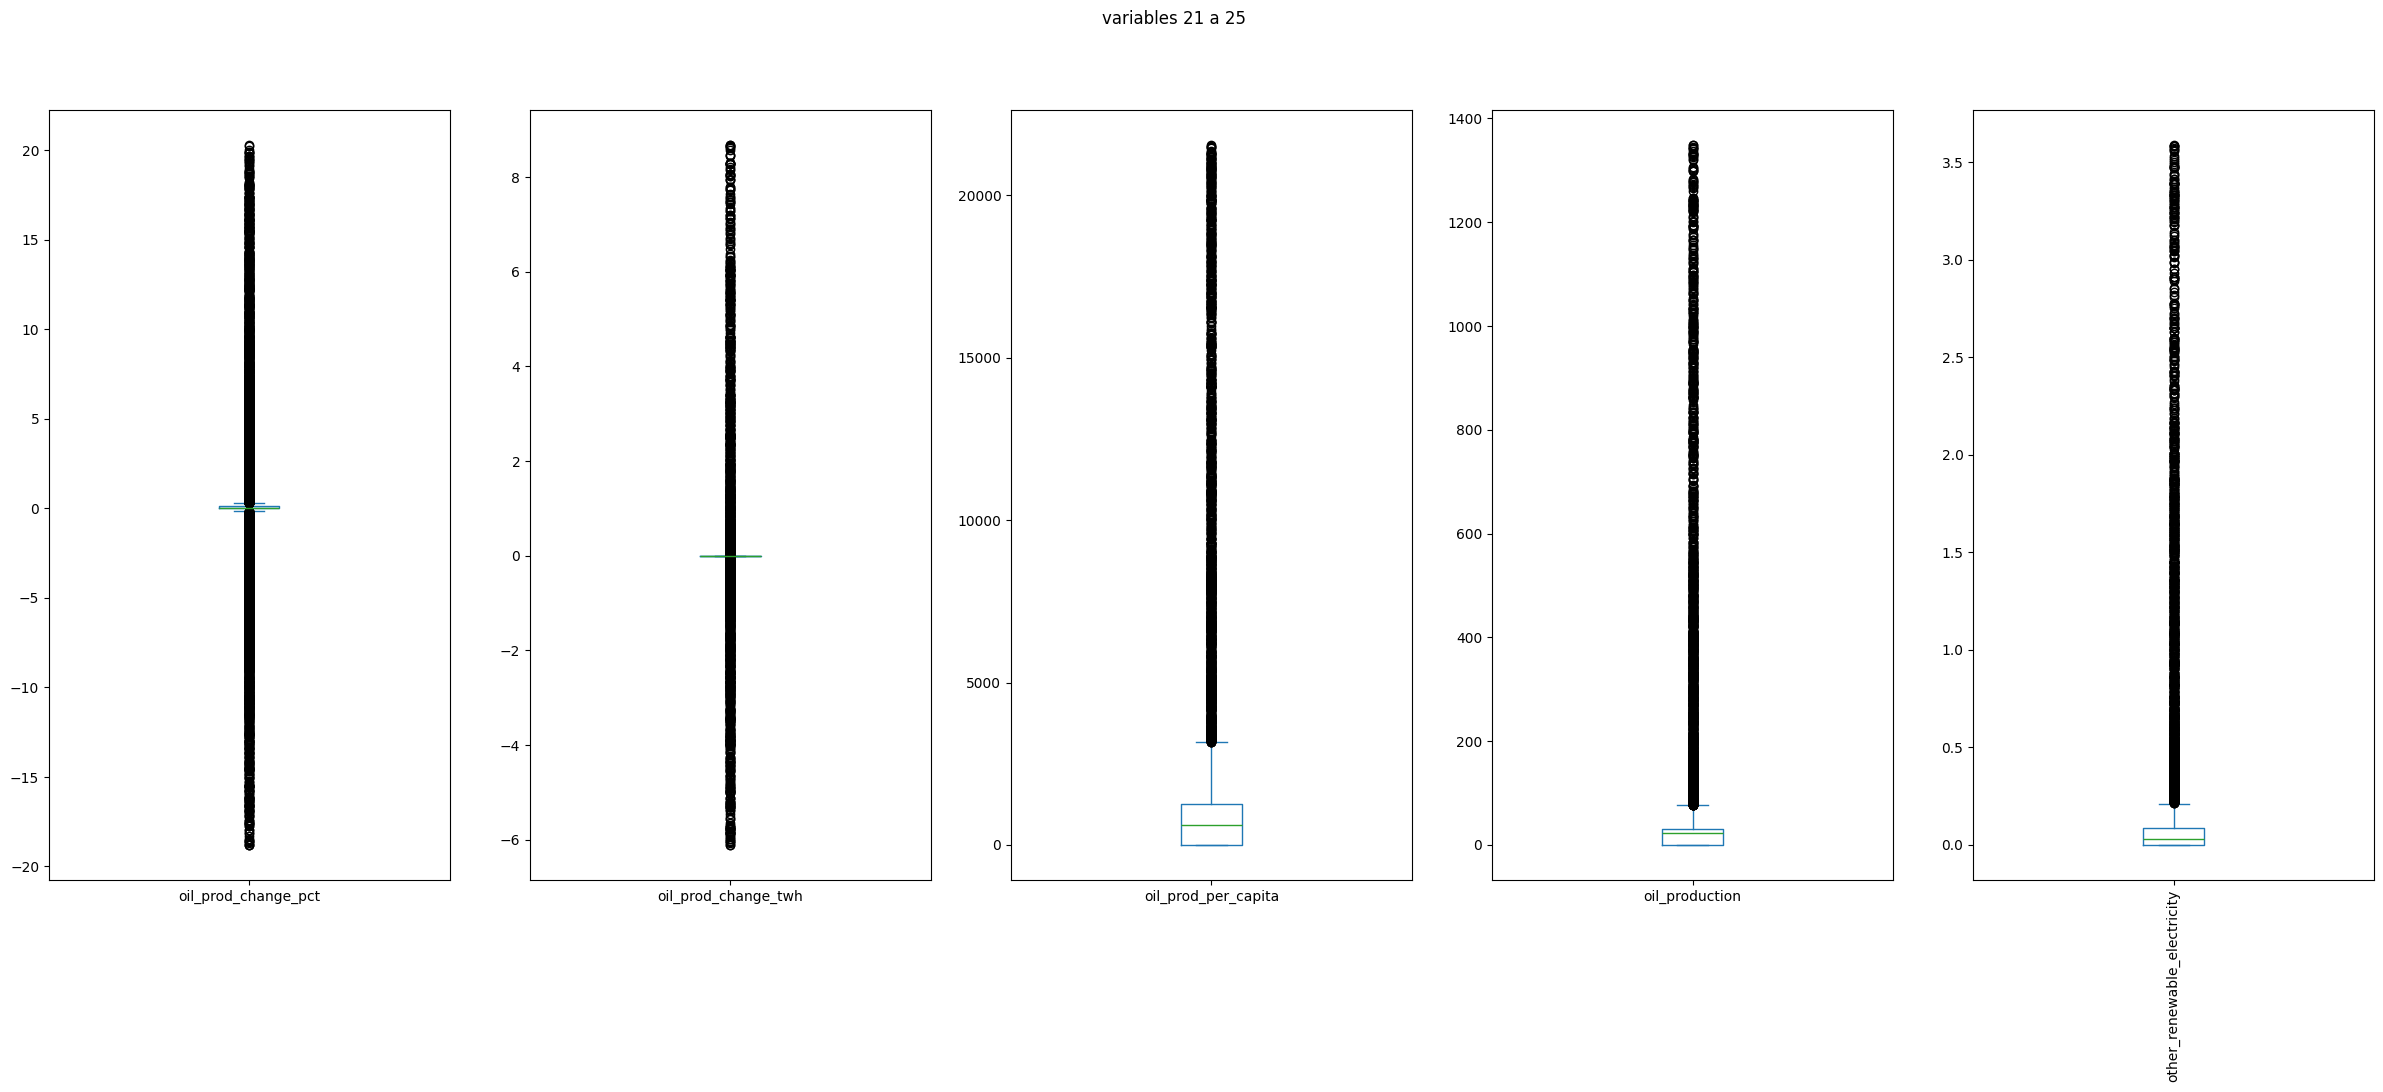

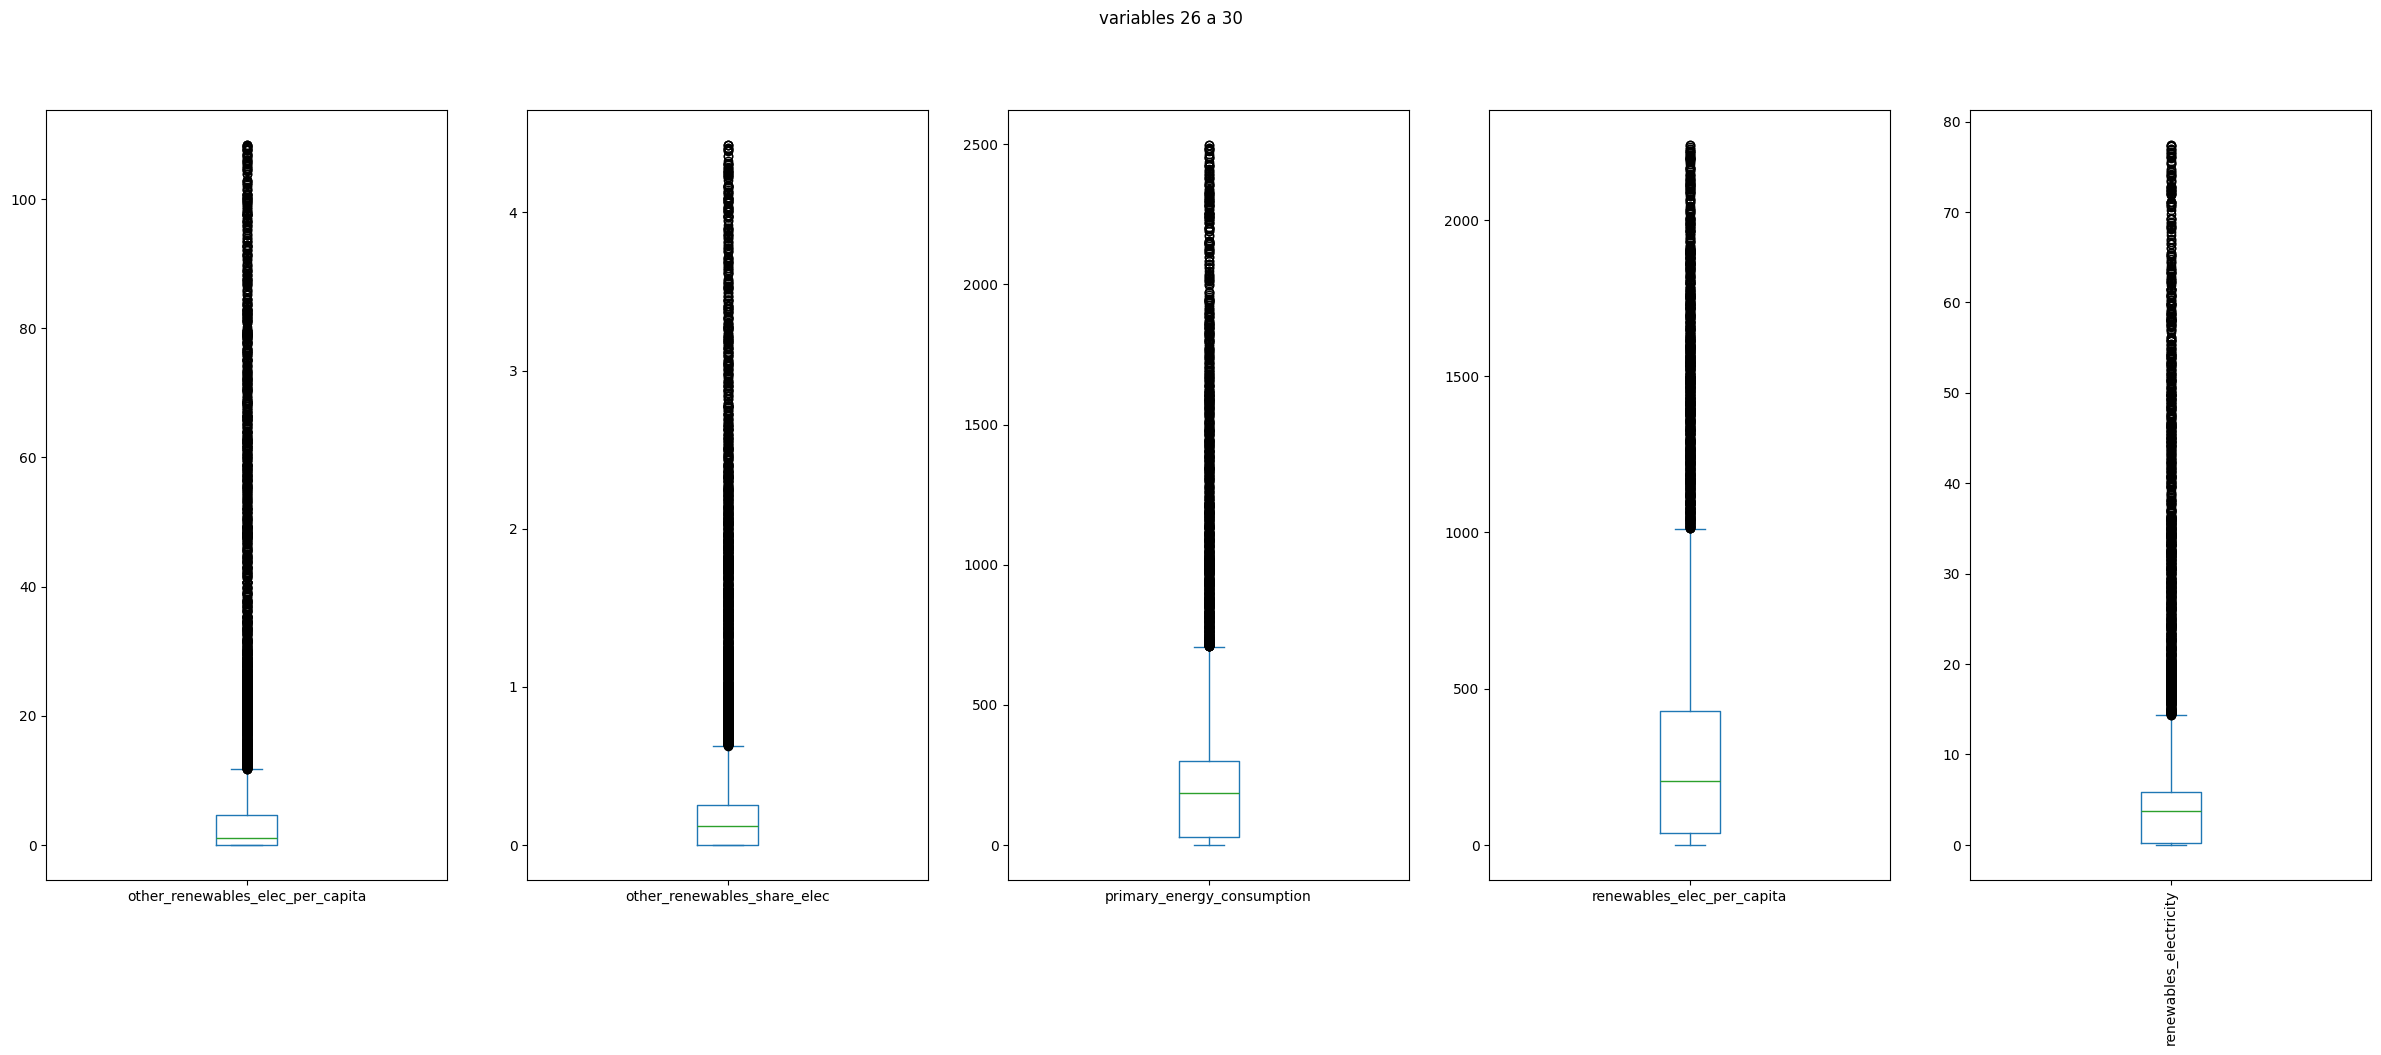

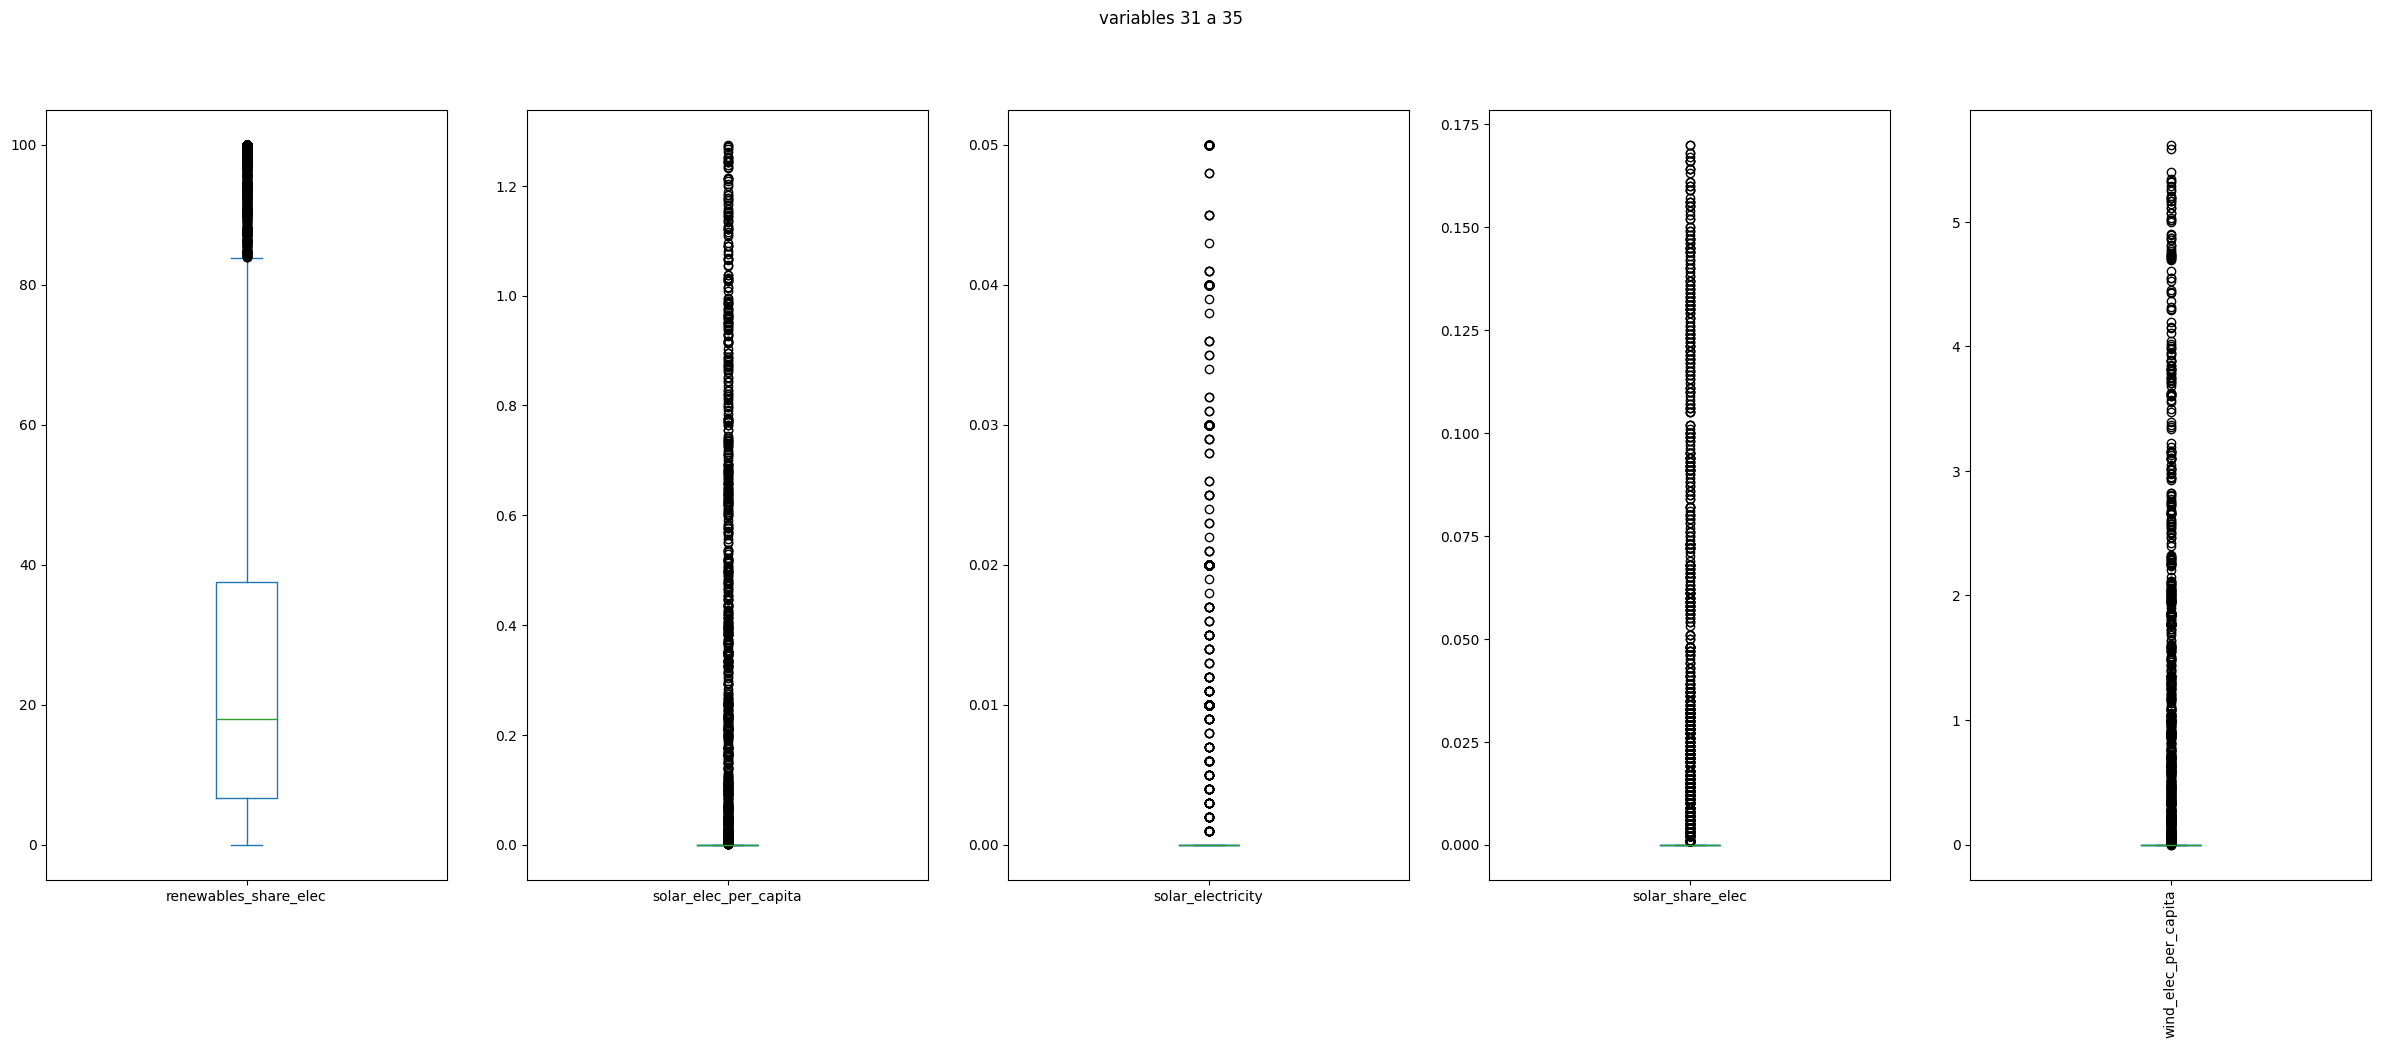

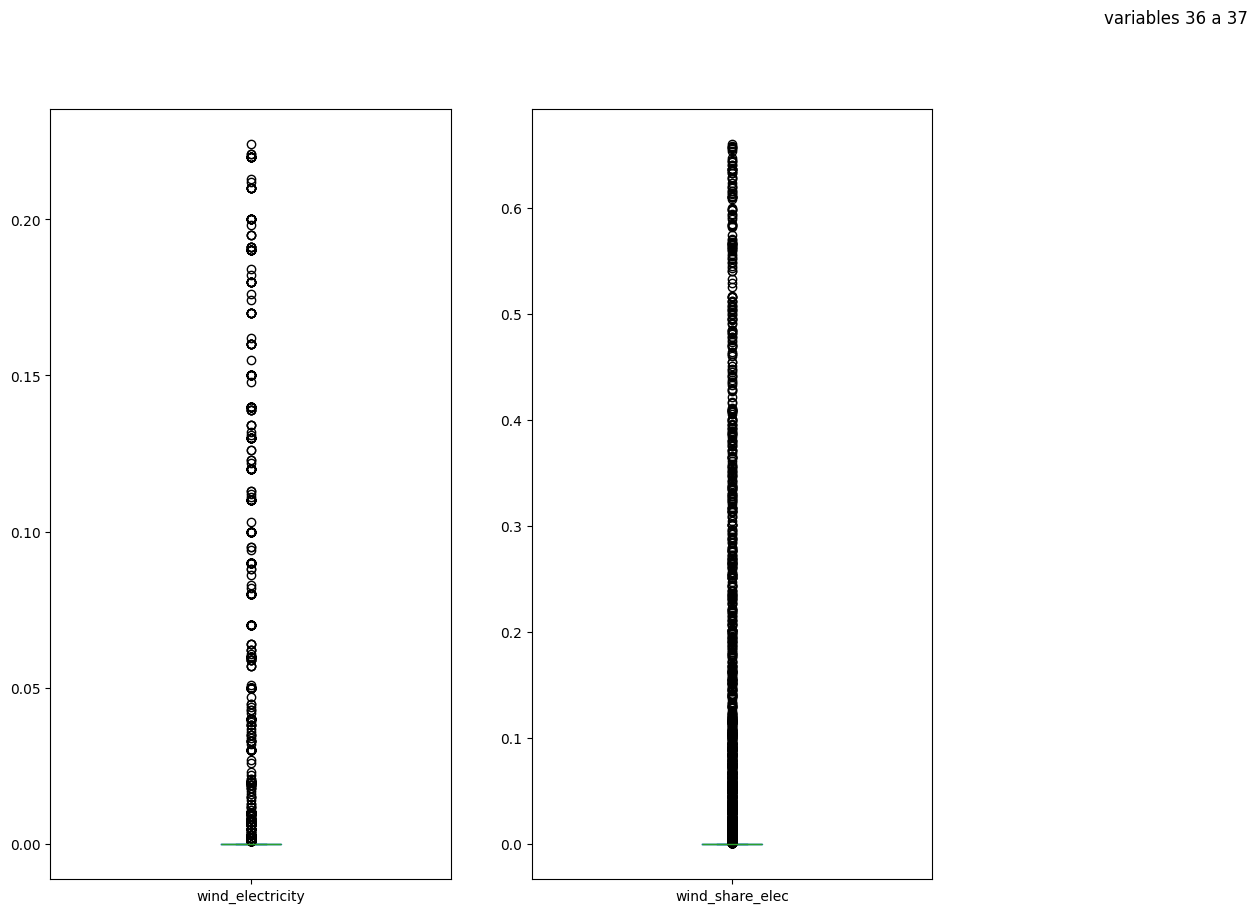

In [111]:
# verificamos las distribuciones de los datos después de tratamiento de outliers

#columnas numéricas
num_cols=df4.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df4[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

In [101]:
df4.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita',
       'coal_production', 'electricity_generation', 'energy_cons_change_pct',
       'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp',
       'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita',
       'gas_production', 'hydro_elec_per_capita', 'hydro_electricity',
       'hydro_share_elec', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'low_carbon_share_elec',
       'nuclear_elec_per_capita', 'nuclear_electricity', 'nuclear_share_elec',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'other_renewable_electricity',
       'other_renewables_elec_per_capita', 'other_renewables_share_elec',
       'primary_energy_consumption', 'renewables_elec_per_capita',
       'renewables_electricity', 'renewables_share_elec',
       'solar_elec_per_capita', 'solar_e

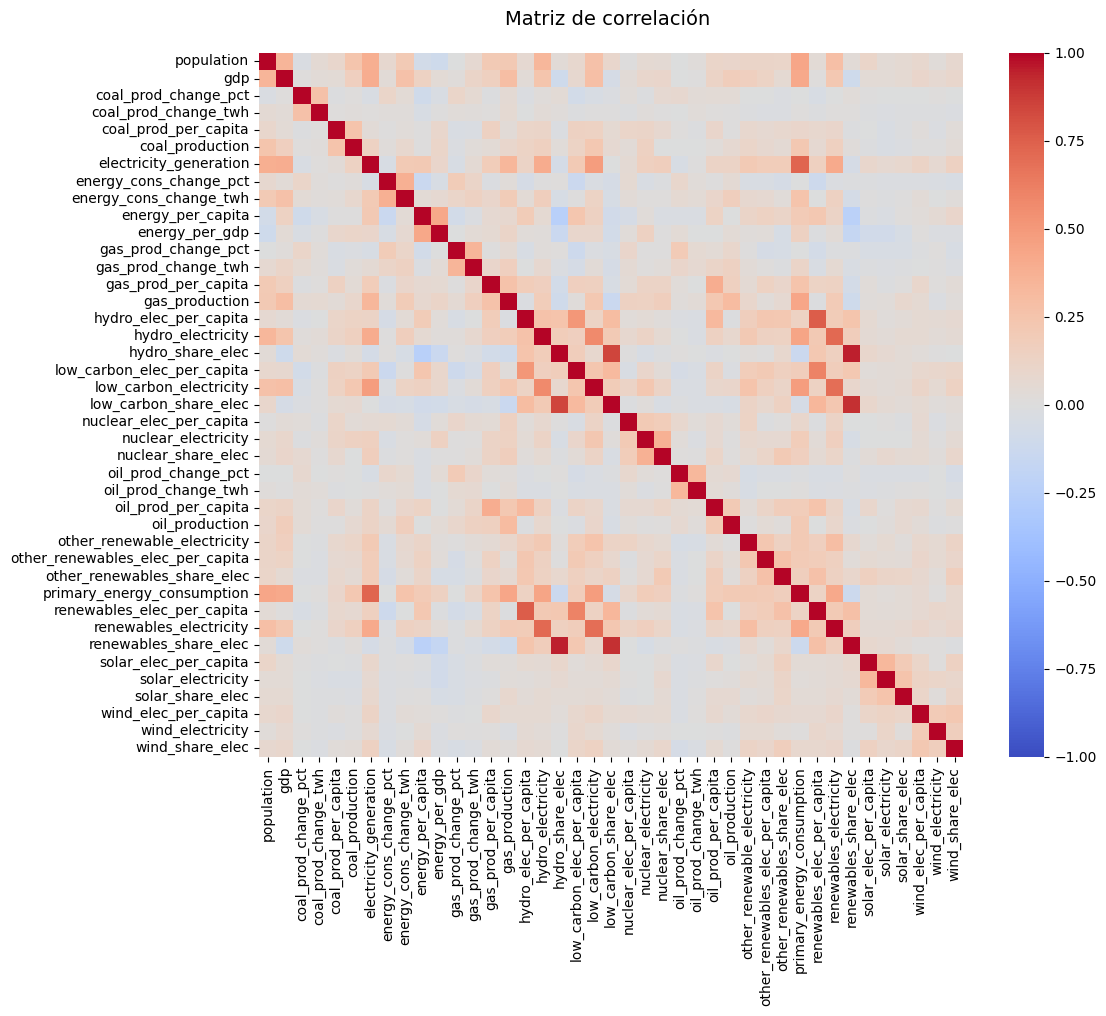

In [102]:
# --- Matriz de correlaciones ---
corr = df4.corr(numeric_only=True)
# --- Plot mejorado ---
plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            annot=False, 
            cbar=True, 
            square=True, 
            )

plt.title("Matriz de correlación ", fontsize=14, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [104]:
high_corr = corr[(corr.abs() > 0.7) & (corr.abs() < 1)]
high_corr

population  gdp  coal_prod_change_pct  \
population                               NaN  NaN                   NaN   
gdp                                      NaN  NaN                   NaN   
coal_prod_change_pct                     NaN  NaN                   NaN   
coal_prod_change_twh                     NaN  NaN                   NaN   
coal_prod_per_capita                     NaN  NaN                   NaN   
coal_production                          NaN  NaN                   NaN   
electricity_generation                   NaN  NaN                   NaN   
energy_cons_change_pct                   NaN  NaN                   NaN   
energy_cons_change_twh                   NaN  NaN                   NaN   
energy_per_capita                        NaN  NaN                   NaN   
energy_per_gdp                           NaN  NaN                   NaN   
gas_prod_change_pct                      NaN  NaN                   NaN   
gas_prod_change_twh                      NaN  NaN                   NaN   
gas_prod_per_capita                      NaN  NaN                   NaN   
gas_production                           NaN  NaN                   NaN   
hydro_elec_per_capita                    NaN  NaN                   NaN   
hydro_electricity                        NaN  NaN                   NaN   
hydro_share_elec                         NaN  NaN                   NaN   
low_carbon_elec_per_capita               NaN  NaN                   NaN   
low_carbon_electricity                   NaN  NaN                   NaN   
low_carbon_share_elec                    NaN  NaN                   NaN   
nuclear_elec_per_capita                  NaN  NaN                   NaN   
nuclear_electricity                      NaN  NaN                   NaN   
nuclear_share_elec                       NaN  NaN                   NaN   
oil_prod_change_pct                      NaN  NaN                   NaN   
oil_prod_change_twh                      NaN  NaN                   NaN   
oil_prod_per_capita                      NaN  NaN                   NaN   
oil_production                           NaN  NaN                   NaN   
other_renewable_electricity              NaN  NaN                   NaN   
other_renewables_elec_per_capita         NaN  NaN                   NaN   
other_renewables_share_elec              NaN  NaN                   NaN   
primary_energy_consumption               NaN  NaN                   NaN   
renewables_elec_per_capita               NaN  NaN                   NaN   
renewables_electricity                   NaN  NaN                   NaN   
renewables_share_elec                    NaN  NaN                   NaN   
solar_elec_per_capita                    NaN  NaN                   NaN   
solar_electricity                        NaN  NaN                   NaN   
solar_share_elec                         NaN  NaN                   NaN   
wind_elec_per_capita                     NaN  NaN                   NaN   
wind_electricity                         NaN  NaN                   NaN   
wind_share_elec                          NaN  NaN                   NaN   

                                  coal_prod_change_twh  coal_prod_per_capita  \
population                                         NaN                   NaN   
gdp                                                NaN                   NaN   
coal_prod_change_pct                               NaN                   NaN   
coal_prod_change_twh                               NaN                   NaN   
coal_prod_per_capita                               NaN                   NaN   
coal_production                                    NaN                   NaN   
electricity_generation                             NaN                   NaN   
energy_cons_change_pct                             NaN                   NaN   
energy_cons_change_twh                             NaN                   NaN   
energy_per_capita                                  NaN                   NaN   
ene

In [105]:
# --- Convertir matriz a pares ---
pairs = (
    high_corr.stack()  # Desapila a Series con MultiIndex
    .reset_index()     # Convierte índices en columnas
    .rename(columns={0: "correlation", "level_0": "var1", "level_1": "var2"})
)

# Eliminar duplicados (var1-var2 y var2-var1 son lo mismo)
pairs = pairs[pairs["var1"] < pairs["var2"]].sort_values(by="correlation", ascending=False)

display(pairs)

var1                        var2  correlation
4        hydro_share_elec       renewables_share_elec         0.95
6   low_carbon_share_elec       renewables_share_elec         0.91
3        hydro_share_elec       low_carbon_share_elec         0.85
1   hydro_elec_per_capita  renewables_elec_per_capita         0.76
0  electricity_generation  primary_energy_consumption         0.73
2       hydro_electricity      renewables_electricity         0.71

In [ ]:
#dada la multicolinealidad entre:  hydro_share_elec, renewables_share_elec, low_carbon_share_elec y dado que tanto hydro y low_carbon son energías que hacen referencia a la renovabilidad,
# nos quedaremos con la variable: renewables_share_elec
df4.drop(columns=['hydro_share_elec','low_carbon_share_elec'], axis=1, inplace=True)

#Posteriormente dado las variables parcialmente redundantes de aproximadamente 0.8
#tendemos la correlación de hydro_elec_per_capita y renewables_elec_per_capita 
# dado que hydro_elec conforma parte de las energías renovables nos quedamos con renewables_elec_per_capita
df4.drop(columns=['hydro_elec_per_capita'], axis=1, inplace=True)
df4.drop(columns=['hydro_electricity'], axis=1, inplace=True)

#las variables correlacionadas que vamos a mantener son electricity_generation y primary_energy_consumption, ya que en este caso un fenomeno provoca el otro.


In [107]:
df4.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita',
       'coal_production', 'electricity_generation', 'energy_cons_change_pct',
       'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp',
       'gas_prod_change_pct', 'gas_prod_change_twh', 'gas_prod_per_capita',
       'gas_production', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'nuclear_elec_per_capita',
       'nuclear_electricity', 'nuclear_share_elec', 'oil_prod_change_pct',
       'oil_prod_change_twh', 'oil_prod_per_capita', 'oil_production',
       'other_renewable_electricity', 'other_renewables_elec_per_capita',
       'other_renewables_share_elec', 'primary_energy_consumption',
       'renewables_elec_per_capita', 'renewables_electricity',
       'renewables_share_elec', 'solar_elec_per_capita', 'solar_electricity',
       'solar_share_elec', 'wind_elec_per_capita', 'wind_electricity',
       'wind_share_el

In [112]:
def escalado (data):
    for col in data.select_dtypes(include=np.number).columns:
        skew_value=data[col].skew()
        if abs(skew_value)<=0.85:
            scaler=StandardScaler()
            data[col]=scaler.fit_transform(data[[col]])
        else:
            scaler=MinMaxScaler()
            data[col]=scaler.fit_transform(data[[col]])
    return data

In [113]:
# Seleccionar columnas numéricas
num_cols = df4.select_dtypes(include=['number']).columns

# Escalar solo las columnas numéricas y devolver un DataFrame
df5 = df4.copy()
df5= escalado(df4)
# Convertir de nuevo a DataFrame para conservar nombres de columnas si se desea
df_final = pd.DataFrame(df5, columns=df5.columns)
df_final.head()

country  year iso_code  population  gdp  coal_prod_change_pct  \
123  Afghanistan  2000      AFG        0.19 0.01                 -0.15   
124  Afghanistan  2001      AFG        0.19 0.01                  0.02   
125  Afghanistan  2002      AFG        0.20 0.02                 -3.68   
126  Afghanistan  2003      AFG        0.22 0.03                  0.02   
127  Afghanistan  2004      AFG        0.23 0.03                 -0.68   

     coal_prod_change_twh  coal_prod_per_capita  coal_production  \
123                  0.38                  0.00             0.00   
124                  0.45                  0.00             0.00   
125                  0.37                  0.00             0.00   
126                  0.42                  0.00             0.00   
127                  0.38                  0.00             0.00   

     electricity_generation  ...  primary_energy_consumption  \
123                    0.00  ...                        0.00   
124                    0.00  ...                        0.00   
125                    0.00  ...                        0.00   
126                    0.00  ...                        0.00   
127                    0.00  ...                        0.00   

     renewables_elec_per_capita  renewables_electricity  \
123                        0.01                    0.00   
124                        0.01                    0.01   
125                        0.01                    0.01   
126                        0.01                    0.01   
127                        0.01                    0.01   

     renewables_share_elec  solar_elec_per_capita  solar_electricity  \
123                   0.66                   0.00               0.00   
124                   0.85                   0.00               0.00   
125                   0.81                   0.00               0.00   
126                   0.67                   0.00               0.00   
127                   0.63                   0.00               0.00   

     solar_share_elec  wind_elec_per_capita  wind_electricity  wind_share_elec  
123              0.00                  0.00              0.00             0.00  
124              0.00                  0.00              0.00             0.00  
125              0.00                  0.00              0.00             0.00  
126              0.00                  0.00              0.00             0.00  
127              0.00                  0.00              0.00             0.00  

[5 rows x 40 columns]

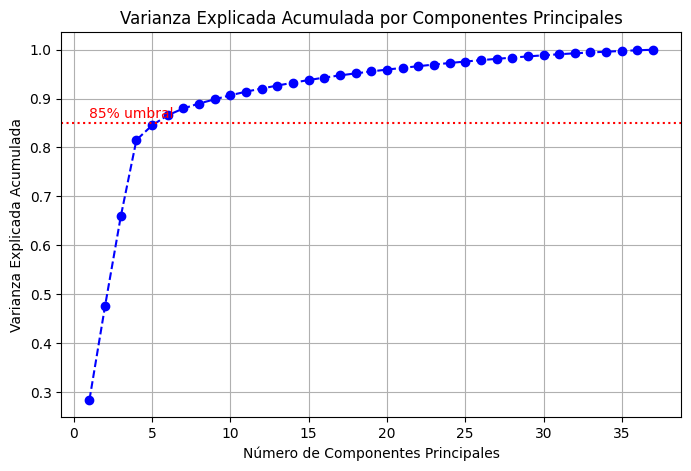

In [115]:
# Seleccionar solo columnas numéricas
num_cols = df_final.select_dtypes(include=['number']).columns
df_num = df_final[num_cols]

# Crear PCA sin limitar el número de componentes (usará todos)
pca = PCA()

# Ajustar PCA a tus datos
pca.fit(df_num)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle=':')  # Línea de referencia al 85%
plt.text(1, 0.86, '85% umbral', color = 'r')
# Limitar ejes
plt.show()

In [117]:

# Seleccionar solo columnas numéricas
num_cols = df_final.select_dtypes(include=['number']).columns
df_num = df_final[num_cols]

# aplica transformacion PCA
pca = PCA(n_components=5) # define el transformador PCA con n_componentes
fit_pca = pca.fit(df_num)
df_post_pca = fit_pca.transform(df_num) # ajusta el transformador PCA con los dato

In [122]:

fit_pca.explained_variance_ratio_


array([0.28405992, 0.19239245, 0.1824436 , 0.15656137, 0.02985219])

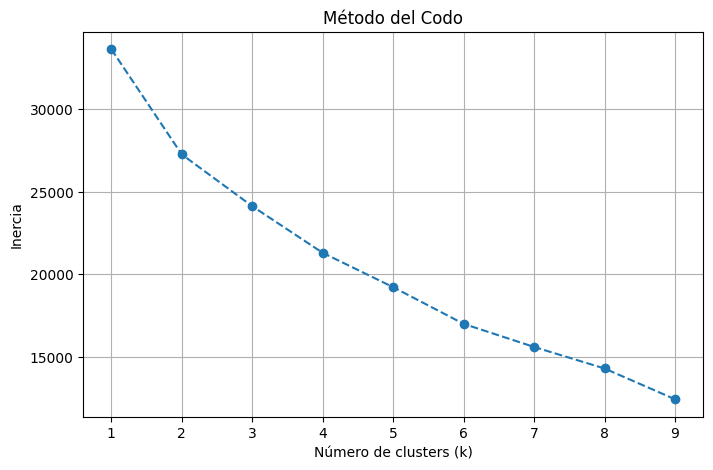

In [124]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_post_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [126]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_post_pca)
inertias.append(kmeans.inertia_)

In [128]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 1, 1, 2], shape=(8089,), dtype=int32)

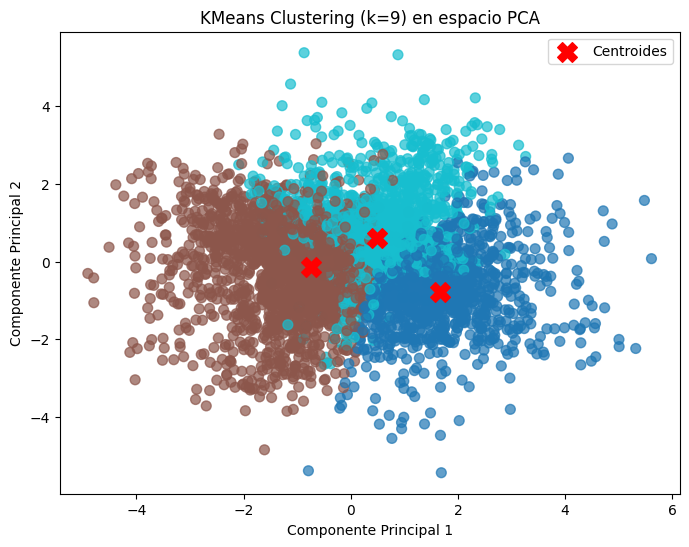

In [130]:
# Predecir clusters
labels = kmeans.predict(df_post_pca)

# Gráfico 2D
plt.figure(figsize=(8,6))
plt.scatter(df_post_pca[:, 0], df_post_pca[:, 1], 
            c=labels, cmap="tab10", s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"KMeans Clustering (k={k}) en espacio PCA")
plt.legend()
plt.show()
